# Notebook du projet Entrepôt des Données :

###                       Préparé par : Mohamed Ben Yassine

##             Analyse en cube : Fond documentaire des bibliothèques parisienne

In [128]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [129]:
set_nb_theme('grade3')

Aujourd'hui, dans ce notebook, nous allons essayer de résoudre `le problème du Fond documentaire des bibliothèques parisienne`. 

Nous allons d'abord nettoyer les données, puis nous utiliserons des Analyses en cube sur la base de 59 caractéristiques.


Chargeons les modules nécessaires :

In [131]:
import pandas as pnd
import sqlite3
import csv
import numpy as np
import matplotlib.pyplot as plot
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%time df = pnd.read_csv("fond_documentaire.csv", delimiter=";",nrows=300000)

<string>:2: DtypeWarning: Columns (6,36,42) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3.16 s, sys: 228 ms, total: 3.39 s
Wall time: 3.55 s


In [3]:
!free -h

              total       utilisé      libre     partagé tamp/cache   disponible
Mem:           7,7G        2,1G        1,9G        536M        3,8G        4,8G
Partition d'échange:        2,0G          0B        2,0G


Utilisons également l'attribut pandas `.shape` pour visualiser le nombre d'échantillons et les colonnes que nous traitons à ce stade:

In [5]:
df.shape

(300000, 59)

#### Prenant note des questions relatives aux ensembles de données :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 59 columns):
identifiant unique                                   300000 non-null int64
Identifiant                                          299103 non-null object
Lien_permament-portail                               300000 non-null object
ISBN                                                 71150 non-null object
EAN                                                  34828 non-null object
Langue du document                                   293064 non-null object
Langue du texte intermédiaire                        59 non-null object
Langue de l'oeuvre originale                         15200 non-null object
Date de publication                                  294788 non-null object
Langue des sous-titres                               2831 non-null object
Titre                                                299926 non-null object
Type de document                                     224776 non

#### Types de colonnes :

Pour explorer leurs formes

In [7]:
df.dtypes

identifiant unique                                     int64
Identifiant                                           object
Lien_permament-portail                                object
ISBN                                                  object
EAN                                                   object
Langue du document                                    object
Langue du texte intermédiaire                         object
Langue de l'oeuvre originale                          object
Date de publication                                   object
Langue des sous-titres                                object
Titre                                                 object
Type de document                                      object
Titre d'un auteur différent                           object
Titre parallèle                                       object
Complément du titre                                   object
Première mention de responsabilité                    object
Mention de responsabilit

# Étape 1 : Exploration des données  :

## Renommer les colonnes:

L'étape suivante c'est de renommer toutes les colonnes, ce qui facilite l'appellation des variables.

In [8]:
df.columns

Index(['identifiant unique', 'Identifiant', 'Lien_permament-portail', 'ISBN',
       'EAN', 'Langue du document', 'Langue du texte intermédiaire',
       'Langue de l'oeuvre originale', 'Date de publication',
       'Langue des sous-titres', 'Titre', 'Type de document',
       'Titre d'un auteur différent', 'Titre parallèle', 'Complément du titre',
       'Première mention de responsabilité',
       'Mention de responsabilité suivante', 'Numéro de partie',
       'Titre de partie', 'Lieu de publication', 'Nom de l'éditeur',
       'Indication spécifique du type de document',
       'Autres caractéristiques matérielles', 'Format',
       'Matériel d'accompagnement', 'Collection', 'Est publié avec',
       'Est une traduction de', 'Niveau de l'ensemble', 'Unité matérielle',
       'Partie composante', 'Dates auteur', 'Dates co-auteur',
       'Dates auteur secondaire', 'Auteur collectivité - élément d'entrée',
       'Auteur collectivité - subdivision', 'Auteur collectivité - date',
    

In [9]:
df_cols=['identifiant unique',
         'Identifiant', 
         'Lien_permament-portail', 
         'ISBN',
         'EAN', 
         'Langue du document', 
         'Langue du texte intermédiaire',
       """Langue de l'oeuvre originale""", 
         'Date de publication',
         'Langue des sous-titres', 
         'Titre', 'Type de document',
       """Titre d'un auteur différent""", 
         'Titre parallèle', 
         'Complément du titre',
         'Première mention de responsabilité',
         'Mention de responsabilité suivante', 
         'Numéro de partie',
         'Titre de partie', 
         'Lieu de publication',
       """Nom de l'éditeur""",
         'Indication spécifique du type de document',
         'Autres caractéristiques matérielles', 'Format',
       """Matériel d'accompagnement""", 
         'Collection', 
         'Est publié avec',
         'Est une traduction de', 
       """Niveau de l'ensemble""", 
         'Unité matérielle',
         'Partie composante', 
         'Dates auteur', 
         'Dates co-auteur',
         'Dates auteur secondaire', 
       """Auteur collectivité - élément d'entrée""",
         'Auteur collectivité - subdivision', 
         'Auteur collectivité - date',
       """Co-auteur collectivité - élément d'entrée""",
         'Co-auteur collectivité - subdivision', 
         'Co-auteur collectivité - date',
       """Auteur secondaire collectivité - élément d'entrée""",
         'Auteur secondaire collectivité - subdivision',
         'Auteur secondaire collectivité - date', 'Localisation',
         'Sous-localisation',
       """Nombre d'objets""", 
         'Code-barre', 
         'Cote',
         'Tomaison', 
         'Catégorie documentaire', 
         'Collection_', 
         'Fonds', 
         'Note',
         'Conservation', 
         'Etat physique', 
         'Etat de collection', 
         'Auteur',
         'co_auteur', 
         'auteur_secondaire']

In [10]:
df.columns=df_cols

In [11]:
df1 = pnd.read_csv("fond_documentaire.csv", delimiter=";",nrows=300000, names=df_cols, header=0)

/home/benassine/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (6,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df1.head()

identifiant unique       Identifiant  \
0             2103341  RBSVDP0002103341   
1             1140153  RBSVDP0001140153   
2             1797721  RBSVDP0001797721   
3             1827493  RBSVDP0001827493   
4             1083713  RBSVDP0001083713   

                              Lien_permament-portail               ISBN  \
0  http://bibliotheques-specialisees.paris.fr/ark...                NaN   
1  http://bibliotheques-specialisees.paris.fr/ark...  978-3-0343-0416-0   
2  http://bibliotheques-specialisees.paris.fr/ark...                NaN   
3  http://bibliotheques-specialisees.paris.fr/ark...                NaN   
4  http://bibliotheques-specialisees.paris.fr/ark...                NaN   

             EAN Langue du document Langue du texte intermédiaire  \
0            NaN                fre                           NaN   
1  9783034304160                fre                           NaN   
2            NaN                fre                           NaN   
3            NaN                fre                           NaN   
4            NaN                und                           NaN   

  Langue de l'oeuvre originale             Date de publication  \
0                          NaN                            1964   
1                          NaN                       cop. 2010   
2                          NaN                        Mai 1957   
3                          NaN  [date de publication inconnue]   
4                          NaN                           P1974   

  Langue des sous-titres  ... Catégorie documentaire Collection_ Fonds  \
0                    NaN  ...                    NaN         NaN   NaN   
1                    NaN  ...                     LI         NaN   NaN   
2                    NaN  ...                     PH         NaN   NaN   
3                    NaN  ...                     PH         NaN   NaN   
4                    NaN  ...                     MI         NaN  MUSE   

                  Note Conservation Etat physique Etat de collection  \
0                  NaN          NaN           NaN                NaN   
1                  NaN          NaN           NaN                NaN   
2                  NaN          NaN           NaN                NaN   
3  Dédicace autographe          NaN           NaN                NaN   
4                  NaN          NaN           NaN                NaN   

                  Auteur co_auteur  \
0                    NaN       NaN   
1  Lapparent, Olivier de       NaN   
2                    NaN       NaN   
3              Van Bosch       NaN   
4           Conniff, Ray       NaN   

                                   auteur_secondaire  
0                                                NaN  
1                                      Frank, Robert  
2                                                NaN  
3                                                NaN  
4  Babadjanian ; Pahmutova ; Tariverdiev ; ÏSains...  

[5 rows x 59 columns]

In [13]:
df1.columns =df.columns.str.replace(' ' ,'_')

In [14]:
df1.columns

Index(['identifiant_unique', 'Identifiant', 'Lien_permament-portail', 'ISBN',
       'EAN', 'Langue_du_document', 'Langue_du_texte_intermédiaire',
       'Langue_de_l'oeuvre_originale', 'Date_de_publication',
       'Langue_des_sous-titres', 'Titre', 'Type_de_document',
       'Titre_d'un_auteur_différent', 'Titre_parallèle', 'Complément_du_titre',
       'Première_mention_de_responsabilité',
       'Mention_de_responsabilité_suivante', 'Numéro_de_partie',
       'Titre_de_partie', 'Lieu_de_publication', 'Nom_de_l'éditeur',
       'Indication_spécifique_du_type_de_document',
       'Autres_caractéristiques_matérielles', 'Format',
       'Matériel_d'accompagnement', 'Collection', 'Est_publié_avec',
       'Est_une_traduction_de', 'Niveau_de_l'ensemble', 'Unité_matérielle',
       'Partie_composante', 'Dates_auteur', 'Dates_co-auteur',
       'Dates_auteur_secondaire', 'Auteur_collectivité_-_élément_d'entrée',
       'Auteur_collectivité_-_subdivision', 'Auteur_collectivité_-_date',
    

# Données Manquantes

On consulte quelques lignes du fichier `df1`.

Je peux déjà voir une poignée de données manquantes ...

In [15]:
df1.sample(5)

identifiant_unique       Identifiant  \
287838              405116  RBSVDP0000405116   
230061             1818074  RBSVDP0001818074   
25994               596114  RBSVDP0000596114   
104042               60244  RBSVDP0000060244   
21761               494628  RBSVDP0000494628   

                                   Lien_permament-portail           ISBN  EAN  \
287838  http://bibliotheques-specialisees.paris.fr/ark...  2-258-00443-8  NaN   
230061  http://bibliotheques-specialisees.paris.fr/ark...            NaN  NaN   
25994   http://bibliotheques-specialisees.paris.fr/ark...            NaN  NaN   
104042  http://bibliotheques-specialisees.paris.fr/ark...            NaN  NaN   
21761   http://bibliotheques-specialisees.paris.fr/ark...  2-09-201300-9  NaN   

       Langue_du_document Langue_du_texte_intermédiaire  \
287838                fre                           NaN   
230061                fre                           NaN   
25994                 fre                           NaN   
104042                swe                           NaN   
21761                 fre                           NaN   

       Langue_de_l'oeuvre_originale             Date_de_publication  \
287838                          NaN                            1977   
230061                          NaN  [date de publication inconnue]   
25994                           NaN  [date de publication inconnue]   
104042                          NaN                            1949   
21761                           NaN                            1989   

       Langue_des_sous-titres  ... Catégorie_documentaire Collection_ Fonds  \
287838                    NaN  ...                     LI         FIA   NaN   
230061                    NaN  ...                     PH         NaN   NaN   
25994                     NaN  ...                     LI         NaN   TCF   
104042                    NaN  ...                     CE        CODI   NaN   
21761                     NaN  ...                     LI         NaN   NaN   

                                                     Note Conservation  \
287838                                            1996 01          NaN   
230061                                                NaN          NaN   
25994                                                 NaN          NaN   
104042                               Photocopie interdite          NaN   
21761   nbre de prêts GEAC : 1 ; Don Bib. St Fargeau ;...          NaN   

       Etat_physique Etat_de_collection              Auteur        co_auteur  \
287838           NaN                NaN      Bruce, Josette              NaN   
230061           NaN                NaN                 NaN              NaN   
25994            NaN                NaN  Rocherand, Charles              NaN   
104042           NaN                NaN                 NaN              NaN   
21761            NaN                NaN     Wyllie, Stephen  Roffey, Maureen   

       auteur_secondaire  
287838               NaN  
230061               NaN  
25994                NaN  
104042               NaN  
21761                NaN  

[5 rows x 59 columns]

### Visualisation de combien de points de données manquants nous avons :

In [16]:
# pour obtenir le nombre de points de données manquants par colonne
compte_valeurs_manquantes_df1 = df1.isnull().sum()
# pour examiner le nombre de points manquants s
print(compte_valeurs_manquantes_df1)

identifiant_unique                                        0
Identifiant                                             897
Lien_permament-portail                                    0
ISBN                                                 228850
EAN                                                  265172
Langue_du_document                                     6936
Langue_du_texte_intermédiaire                        299941
Langue_de_l'oeuvre_originale                         284800
Date_de_publication                                    5212
Langue_des_sous-titres                               297169
Titre                                                    74
Type_de_document                                      75224
Titre_d'un_auteur_différent                          298896
Titre_parallèle                                      294423
Complément_du_titre                                  199865
Première_mention_de_responsabilité                    70338
Mention_de_responsabilité_suivante      

Cela semble beaucoup ! Il pourrait être utile de voir quel pourcentage des valeurs de notre ensemble de données manquait pour nous donner une meilleure idée de l'ampleur de ce problème :

Combien de valeurs totales manquantes avons-nous ?

In [17]:
cellules_totales_df1 = np.product(df1.shape)
total_manquant_df1 = compte_valeurs_manquantes_df1.sum()

# Pourcentage de données manquantes

val_manquantes_pourcentage_df1 = (total_manquant_df1/cellules_totales_df1) * 100
print(val_manquantes_pourcentage_df1)

63.572790960451975


Plus de la moitié des cellules de cette bases de données sont vides ! 

Dans la prochaine étape, nous allons examiner de plus près certaines des colonnes comportant des valeurs manquantes et essayer de comprendre ce qui pourrait leur arriver.

## Comprendre pourquoi les données sont manquantes


C'est le moment où nous examinons vraiment les données et essayer de comprendre pourquoi elles sont comme elles sont et comment cela affectera notre analyse. 

Pour traiter les valeurs manquantes, j'ai essayé de comprendre pourquoi la valeur est manquante. 

Cette valeur est-elle manquante parce qu'elle n'a pas été enregistrée ou parce qu'elle n'existe pas ?

il n'est pas logique d'essayer de deviner ce qu'elle pourrait être. Ces valeurs que vous voulez probablement garder comme Nan. 

D'autre part, si une valeur manque parce qu'elle n'a pas été enregistrée, vous pouvez essayer de deviner ce qu'elle aurait pu être en vous basant sur les autres valeurs de cette colonne et de cette ligne.

Voyons un exemple. En regardant le nombre de valeurs manquantes, je remarque que la colonne `Langue Des Sous-titres`  contient beaucoup de valeurs manquantes :

In [19]:
compte_valeurs_manquantes_df1

identifiant_unique                                        0
Identifiant                                             897
Lien_permament-portail                                    0
ISBN                                                 228850
EAN                                                  265172
Langue_du_document                                     6936
Langue_du_texte_intermédiaire                        299941
Langue_de_l'oeuvre_originale                         284800
Date_de_publication                                    5212
Langue_des_sous-titres                               297169
Titre                                                    74
Type_de_document                                      75224
Titre_d'un_auteur_différent                          298896
Titre_parallèle                                      294423
Complément_du_titre                                  199865
Première_mention_de_responsabilité                    70338
Mention_de_responsabilité_suivante      

Maintenant on va tester de supprimer toutes les colonnes comportant au moins une valeur manquante :

In [18]:
colonnes_avec_nan_dropped = df.dropna(axis=1)
colonnes_avec_nan_dropped

identifiant unique                             Lien_permament-portail
0                  2103341  http://bibliotheques-specialisees.paris.fr/ark...
1                  1140153  http://bibliotheques-specialisees.paris.fr/ark...
2                  1797721  http://bibliotheques-specialisees.paris.fr/ark...
3                  1827493  http://bibliotheques-specialisees.paris.fr/ark...
4                  1083713  http://bibliotheques-specialisees.paris.fr/ark...
...                    ...                                                ...
299995             2063953  http://bibliotheques-specialisees.paris.fr/ark...
299996              611524  https://bibliotheques-specialisees.paris.fr/ar...
299997              791827  http://bibliotheques-specialisees.paris.fr/ark...
299998               68952  http://bibliotheques-specialisees.paris.fr/ark...
299999             2066058  http://bibliotheques-specialisees.paris.fr/ark...

[300000 rows x 2 columns]

Malheureusement toutes les colonnes contient des valeurs manquantes. il reste que 2 colonnes.

Deuxièmement je propose qu'on retire les colonnes qui ont plus que 70 % de valeurs manquantes car il a un manque de l'information et c'est difficile pour les remplacer et pour avoir une analyse significative

In [19]:
df1.isnull().mean().round(2)

identifiant_unique                                   0.00
Identifiant                                          0.00
Lien_permament-portail                               0.00
ISBN                                                 0.76
EAN                                                  0.88
Langue_du_document                                   0.02
Langue_du_texte_intermédiaire                        1.00
Langue_de_l'oeuvre_originale                         0.95
Date_de_publication                                  0.02
Langue_des_sous-titres                               0.99
Titre                                                0.00
Type_de_document                                     0.25
Titre_d'un_auteur_différent                          1.00
Titre_parallèle                                      0.98
Complément_du_titre                                  0.67
Première_mention_de_responsabilité                   0.23
Mention_de_responsabilité_suivante                   0.75
Numéro_de_part

In [20]:
df1.columns[df1.isnull().mean() < 0.7]

Index(['identifiant_unique', 'Identifiant', 'Lien_permament-portail',
       'Langue_du_document', 'Date_de_publication', 'Titre',
       'Type_de_document', 'Complément_du_titre',
       'Première_mention_de_responsabilité', 'Lieu_de_publication',
       'Nom_de_l'éditeur', 'Indication_spécifique_du_type_de_document',
       'Autres_caractéristiques_matérielles', 'Format', 'Localisation',
       'Sous-localisation', 'Nombre_d'objets', 'Code-barre', 'Cote',
       'Catégorie_documentaire', 'Collection_', 'Note', 'Auteur'],
      dtype='object')

In [21]:
df1=df1[df1.columns[df1.isnull().mean() < 0.7]]

On trouve :

Colonnes dans le jeu de données original : 59

Colonnes avec des nan suprimée : 23

Nous avons perdu pas mal de données, mais à ce stade, nous avons réussi à supprimer tous les colonnes qui ont plus que 80 % de NaN de nos données.

Alors on visualise à nouveau non jeu de données...

### Visualisation de valeurs manquantes


On utilisant le code suivant on peut avoir une idée sur le nombre de valeur manquante et leur pourcentage total.

lien : https://github.com/WillKoehrsen/machine-learning-project-walkthrough

In [22]:
def tableau_des_valeurs_manquantes(d):
        val_manq = d.isnull().sum()
        prct_val_manq = 100 * df1.isnull().sum() / len(d)
        val_manq_tab = pnd.concat([val_manq, prct_val_manq], axis=1)
        val_manq_tab_col = val_manq_tab.rename(
        columns = {0 : 'Valeurs manquantes', 1 : 'Pourcentage des valeurs totales'})
        val_manq_tab_col = val_manq_tab_col[
            val_manq_tab_col.iloc[:,1] != 0].sort_values(
        'Pourcentage des valeurs totales', ascending=False).round(1)
        print ("La base de données que vous avez sélectionnée " + str(d.shape[1]) + " columns.\n"      
            "Il y a " + str(val_manq_tab_col.shape[0]) +
              " les colonnes qui ont des valeurs manquantes.")
        return val_manq_tab_col

In [23]:
tableau_des_valeurs_manquantes(df1)

La base de données que vous avez sélectionnée 23 columns.
Il y a 21 les colonnes qui ont des valeurs manquantes.


Valeurs manquantes  \
Note                                                   208601   
Collection_                                            205340   
Complément_du_titre                                    199865   
Autres_caractéristiques_matérielles                    123834   
Auteur                                                 104899   
Type_de_document                                        75224   
Première_mention_de_responsabilité                      70338   
Code-barre                                              55289   
Lieu_de_publication                                     45684   
Nombre_d'objets                                         37856   
Format                                                  32940   
Nom_de_l'éditeur                                        27561   
Indication_spécifique_du_type_de_document               23179   
Langue_du_document                                       6936   
Catégorie_documentaire                                   5320   
Date_de_publication                                      5212   
Cote                                                     5086   
Sous-localisation                                        4307   
Localisation                                             4164   
Identifiant                                               897   
Titre                                                      74   

                                           Pourcentage des valeurs totales  
Note                                                                  69.5  
Collection_                                                           68.4  
Complément_du_titre                                                   66.6  
Autres_caractéristiques_matérielles                                   41.3  
Auteur                                                                35.0  
Type_de_document                                                      25.1  
Première_mention_de_responsabilité                                    23.4  
Code-barre                                                            18.4  
Lieu_de_publication                                                   15.2  
Nombre_d'objets                                                       12.6  
Format                                                                11.0  
Nom_de_l'éditeur                                                       9.2  
Indication_spécifique_du_type_de_document                              7.7  
Langue_du_document                                                     2.3  
Catégorie_documentaire                                                 1.8  
Date_de_publication                                                    1.7  
Cote                                                                   1.7  
Sous-localisation                                                      1.4  
Localisation                                                           1.4  
Identifiant                                                            0.3  
Titre                                                                  0.0

Avec de l'aide du package `missingno` on peut avoir des visualisations graphiques 

Installation du package `missingno`, Pour mieux visualiser :

In [23]:
!pip install missingno

In [24]:
import missingno as msno

Visualiser les valeurs manquantes sous forme de matrice :

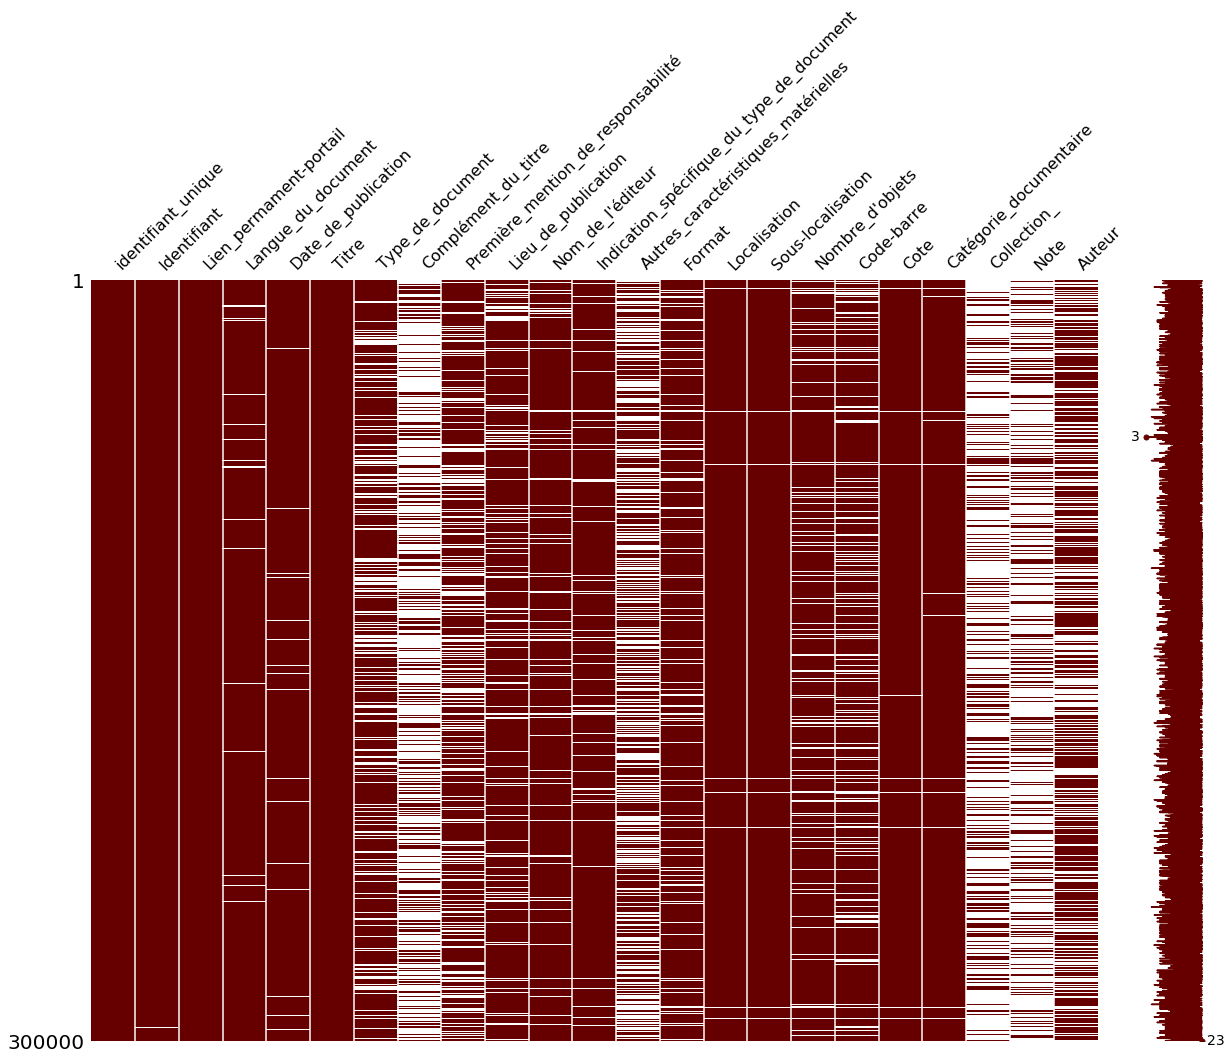

In [25]:
msno.matrix(df1,figsize=(20,14), color=(0.4,0,0)) 

Visualisation de la corrélation de nombres de valeur manquantes pour les colonnes avec heatmap :

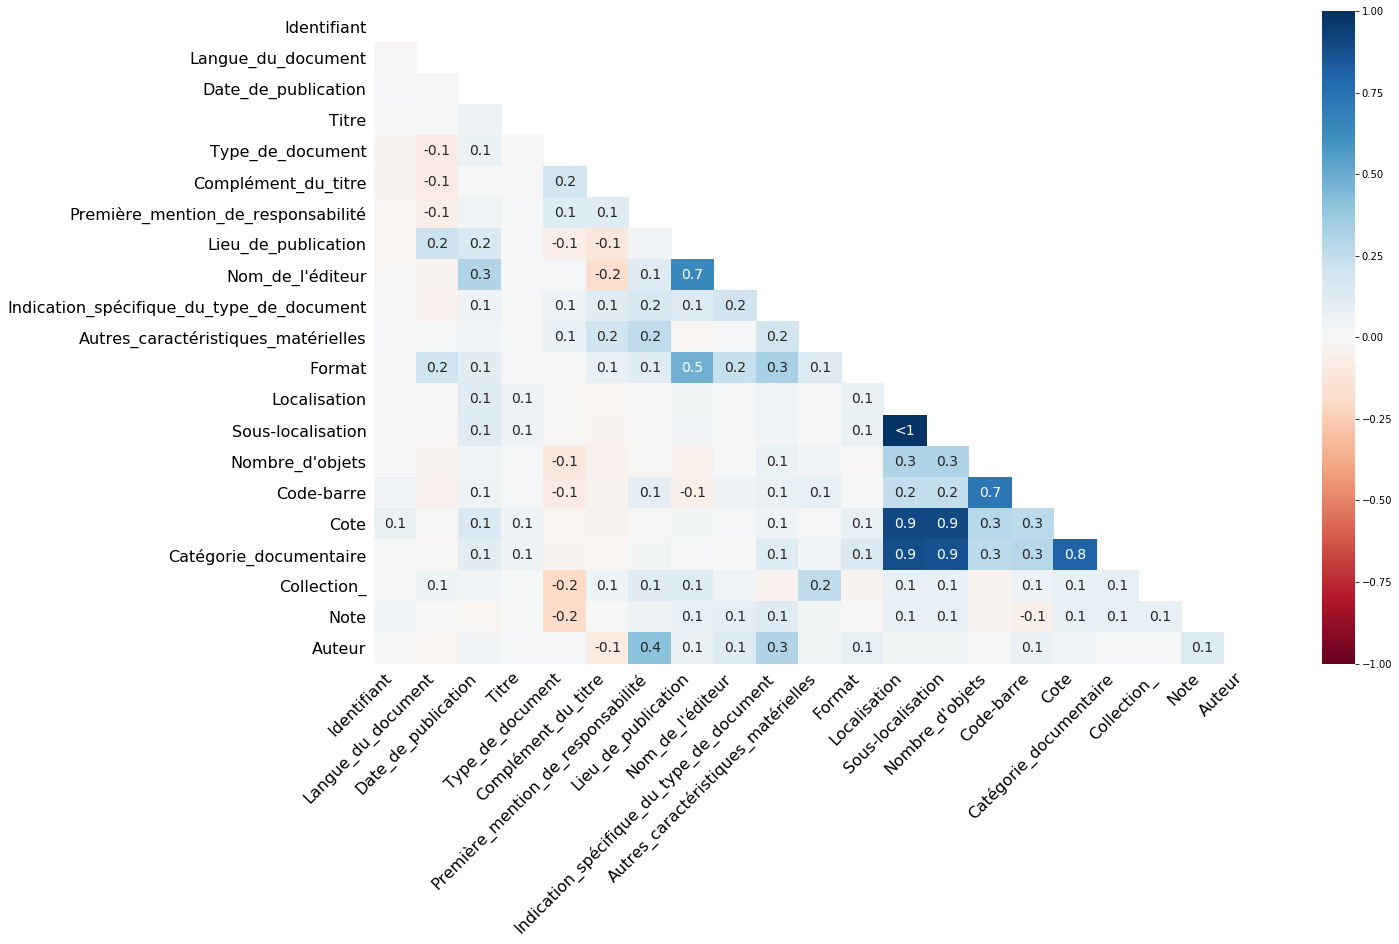

In [31]:
msno.heatmap(df1)

On obtient la matrice de corrélation des variables,
Ce coefficient de corrélation nous donne deux informations que l’on doit interpréter : 


Le sens de la relation entre ces  variables : le coefficient est positif,  évoluent dans le même sens.

La force de la relation : en examinant la valeur de coefficient on peut dire que l’effet de la relation entre les  variables est de grande taille et que l’association est très forte.

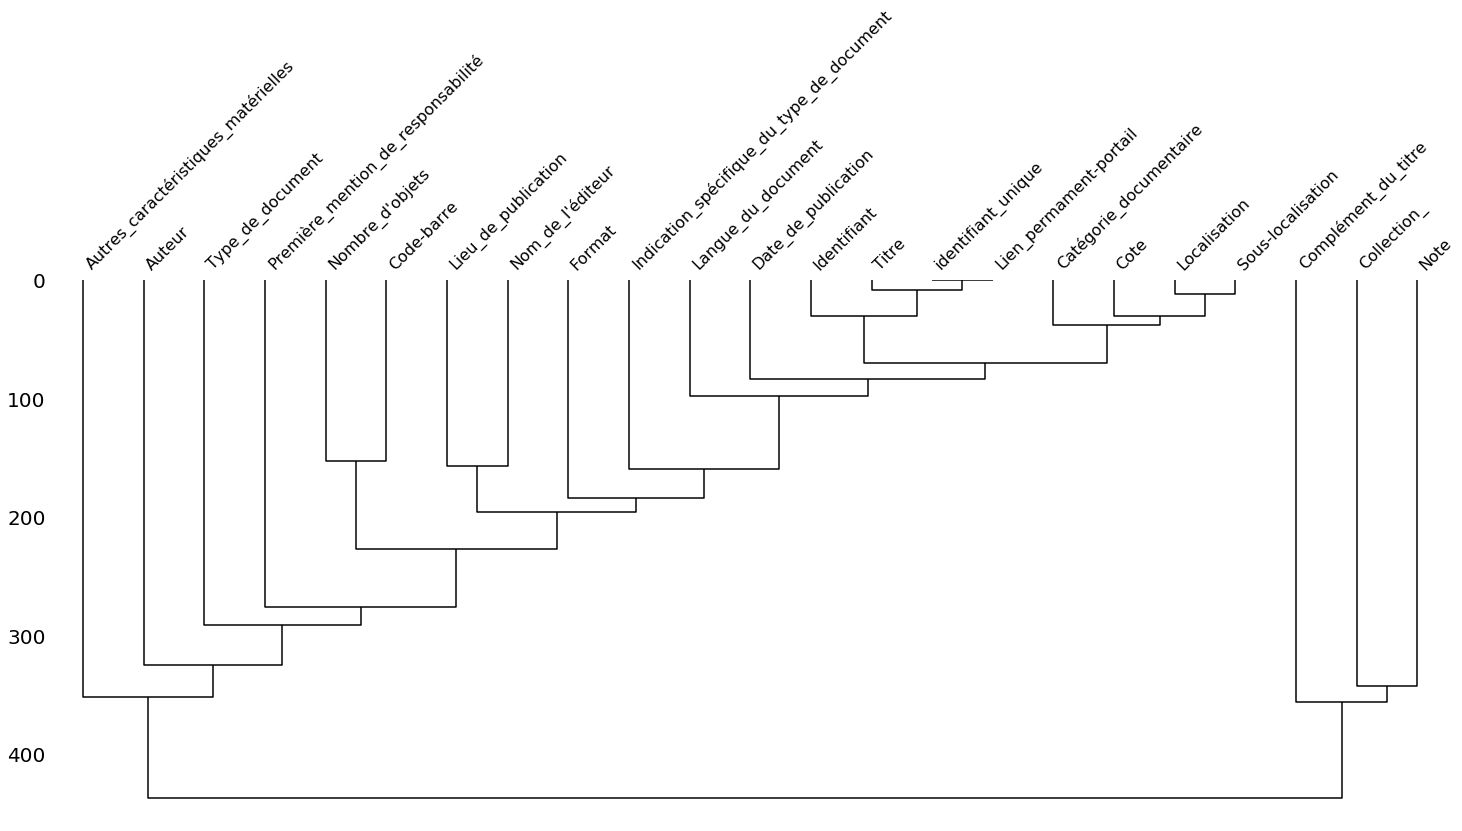

In [28]:
msno.dendrogram(df1)

## Filtrage des données manquantes

le lien : https://www.kaggle.com/ezzaldin6/from-zero-to-hero-in-data-cleaning

1- Premièrement nous avons supprimé les colonnes qui contiennent plus que 70 % car c'est difficiles de les remplacer et ce n'était pas une erreur dans l'entre des données donc on a laissé tomber, et nous pouvons utiliser cette technique si une colonne n'a pas assez de données comme 70% de valeurs manquantes.

Après la suppression des colonnes qui contient plus que 70 % de valeurs manquantes, on trouve toujours des valeurs manquantes.

Dans les ensembles de données comportant un grand nombre de colonnes, il est encore mieux de voir combien de colonnes contiennent des valeurs nulles et combien n'en contiennent pas.

Du coup j'ai voulu appliquer `df1.dropna(thresh=2)` qui garde seulement les lignes avec au moins 2 valeurs NaN, mais dans notre base de données on a des lignes qui contient plus que 2 valeurs manquantes.

Voici les colonnes intéressantes que j'ai sélectionnées après une étude sur toutes les colonnes :

In [28]:
#df1=df1[df1.Date_de_publication.notnull()]

In [29]:
#df1=df1[df1["Langue_du_document"].notnull()]

In [30]:
#df1=df1[df1["Type_de_document"].notnull()]

In [31]:
#df1=df1[df1["Localisation"].notnull()]

In [32]:
#df1=df1[df1["Lieu_de_publication"].notnull()]

In [32]:
#df1=df1[df1["Code-barre"].notnull()]

In [33]:
#df1=df1[df1["""Nom_de_l'éditeur"""].notnull()]

In [32]:
df1.isnull().sum()

identifiant_unique                                0
Identifiant                                     897
Lien_permament-portail                            0
Langue_du_document                             6936
Date_de_publication                            5212
Titre                                            74
Type_de_document                              75224
Complément_du_titre                          199865
Première_mention_de_responsabilité            70338
Lieu_de_publication                           45684
Nom_de_l'éditeur                              27561
Indication_spécifique_du_type_de_document     23179
Autres_caractéristiques_matérielles          123834
Format                                        32940
Localisation                                   4164
Sous-localisation                              4307
Nombre_d'objets                               37856
Code-barre                                    55289
Cote                                           5086
Catégorie_do

Cette technique pour se débarrasser des valeurs manquantes est de supprimer toutes les lignes qui ont des valeurs manquantes en utilisant `dropna()`.

Ce n'est pas `LA MEILLEURE` technique pour supprimer les valeurs manquantes.

2 - Plutôt que de filtrer les données manquantes, nous pouvons vouloir remplir les valeurs manquantes avec n'importe quelle valeur que nous choisissons, et c'est la meilleure technique pour supprimer les valeurs manquantes de notre ensemble de données

In [33]:
df1.columns

Index(['identifiant_unique', 'Identifiant', 'Lien_permament-portail',
       'Langue_du_document', 'Date_de_publication', 'Titre',
       'Type_de_document', 'Complément_du_titre',
       'Première_mention_de_responsabilité', 'Lieu_de_publication',
       'Nom_de_l'éditeur', 'Indication_spécifique_du_type_de_document',
       'Autres_caractéristiques_matérielles', 'Format', 'Localisation',
       'Sous-localisation', 'Nombre_d'objets', 'Code-barre', 'Cote',
       'Catégorie_documentaire', 'Collection_', 'Note', 'Auteur'],
      dtype='object')

In [26]:
for i in df1.drop(['Langue_du_document', 'Date_de_publication', 'Titre',
       'Type_de_document', 'Complément_du_titre',
       'Première_mention_de_responsabilité', 'Lieu_de_publication',
       """Nom_de_l'éditeur""", 'Indication_spécifique_du_type_de_document',
       'Autres_caractéristiques_matérielles', 'Format', 'Localisation',
       'Sous-localisation', 'Code-barre', 'Cote',
       'Catégorie_documentaire', 'Collection_', 'Note', 'Auteur'],axis=1).columns:
    if df1[i].dtype=='float':
        df1[i]=df1[i].fillna(df1[i].mean())
    if df1[i].dtype=='object':
        df1[i]=df1[i].fillna(df1[i].mode()[0])
        
        
df1['Date_de_publication']=df1['Date_de_publication'].fillna('9999')
df1['Langue_du_document']=df1['Langue_du_document'].fillna('inconnu')
df1['Type_de_document']=df1['Type_de_document'].fillna('inconnu')
df1['Lieu_de_publication']=df1['Lieu_de_publication'].fillna('inconnu')
df1["""Nom_de_l'éditeur"""]=df1["""Nom_de_l'éditeur"""].fillna('éditeur inconnu')
df1['Localisation']=df1['Localisation'].fillna('inconnu')
df1['Code-barre']=df1['Code-barre'].fillna('0')
df1['Catégorie_documentaire']=df1['Catégorie_documentaire'].fillna('inconnu')
df1['Auteur']=df1['Auteur'].fillna('inconnu')

## Suppression des colonnes inutiles

Dans notre cas, il doit y avoir des données supplémentaires dans notre jeu de données. 

Après une exploitation de toutes les colonnes de notre bases de données, on remarque qu'il y'a des variables inutiles
et on peut pas extraire de l'information de ces variables. 
On décide de supprimer ces données car on auras pas une information pertinante dans notre analyse.

In [27]:
to_drop = [ 'Identifiant', 'Complément_du_titre',
        'Première_mention_de_responsabilité',
        'Autres_caractéristiques_matérielles', 
        'Format', 'Collection_','Note','Sous-localisation', "Cote" , "Indication_spécifique_du_type_de_document"]

`Identifiant` : Il y a deux colonnes d'Identifiant dans cette bases de données, nous abandonnons cette colonne parce que il manque des valeurs dans cette colonne. 

`Complément_du_titre` : Il y a deux colonnes de titre dans cet ensemble de données, nous abandonnons cette colonne parce que les valeurs dans cette colonne sont dans des formats différents.


`Première_mention_de_responsabilité` : Comme il ne s'agit que d'un texte et qu'il n'est pas important pour l'analyse.


`Autres_caractéristiques_matérielles` : Comme plus de 50% des données sont manquantes.


`Collection`: Comme plus de 69% des données sont manquantes.

`Note` : Comme plus de 69% des données sont manquantes.

In [28]:
df1.drop(to_drop, inplace = True, axis = 1)
df1.head()

identifiant_unique                             Lien_permament-portail  \
0             2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1             1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2             1797721  http://bibliotheques-specialisees.paris.fr/ark...   
3             1827493  http://bibliotheques-specialisees.paris.fr/ark...   
4             1083713  http://bibliotheques-specialisees.paris.fr/ark...   

  Langue_du_document             Date_de_publication  \
0                fre                            1964   
1                fre                       cop. 2010   
2                fre                        Mai 1957   
3                fre  [date de publication inconnue]   
4                und                           P1974   

                          Titre         Type_de_document  \
0                   Raymond Gid          [Texte imprimé]   
1      Raymond Aron et l'Europe          [Texte imprimé]   
2  Raymond Aron. Plan rapproché             [Image fixe]   
3               Raymond. Acteur             [Image fixe]   
4         Ray Conniff in Moscow  [Enregistrement sonore]   

                   Lieu_de_publication Nom_de_l'éditeur Localisation  \
0                                Paris  Deberny-Peignot        ESAIG   
1  Berne ; Berlin ; Bruxelles [et al.]          P. Lang         BAVP   
2                              inconnu  éditeur inconnu         BHVP   
3                              inconnu  éditeur inconnu         BHVP   
4                                 USSR         Melodija          MMP   

   Nombre_d'objets   Code-barre Catégorie_documentaire                 Auteur  
0              1.0            0                inconnu                inconnu  
1              1.0  3.22729e+13                     LI  Lapparent, Olivier de  
2              1.0  3.22729e+13                     PH                inconnu  
3              1.0  3.22729e+13                     PH              Van Bosch  
4              1.0  3.22729e+13                     MI           Conniff, Ray

Maintenant notre base de données ne comporte plus aucune valeur manquante.


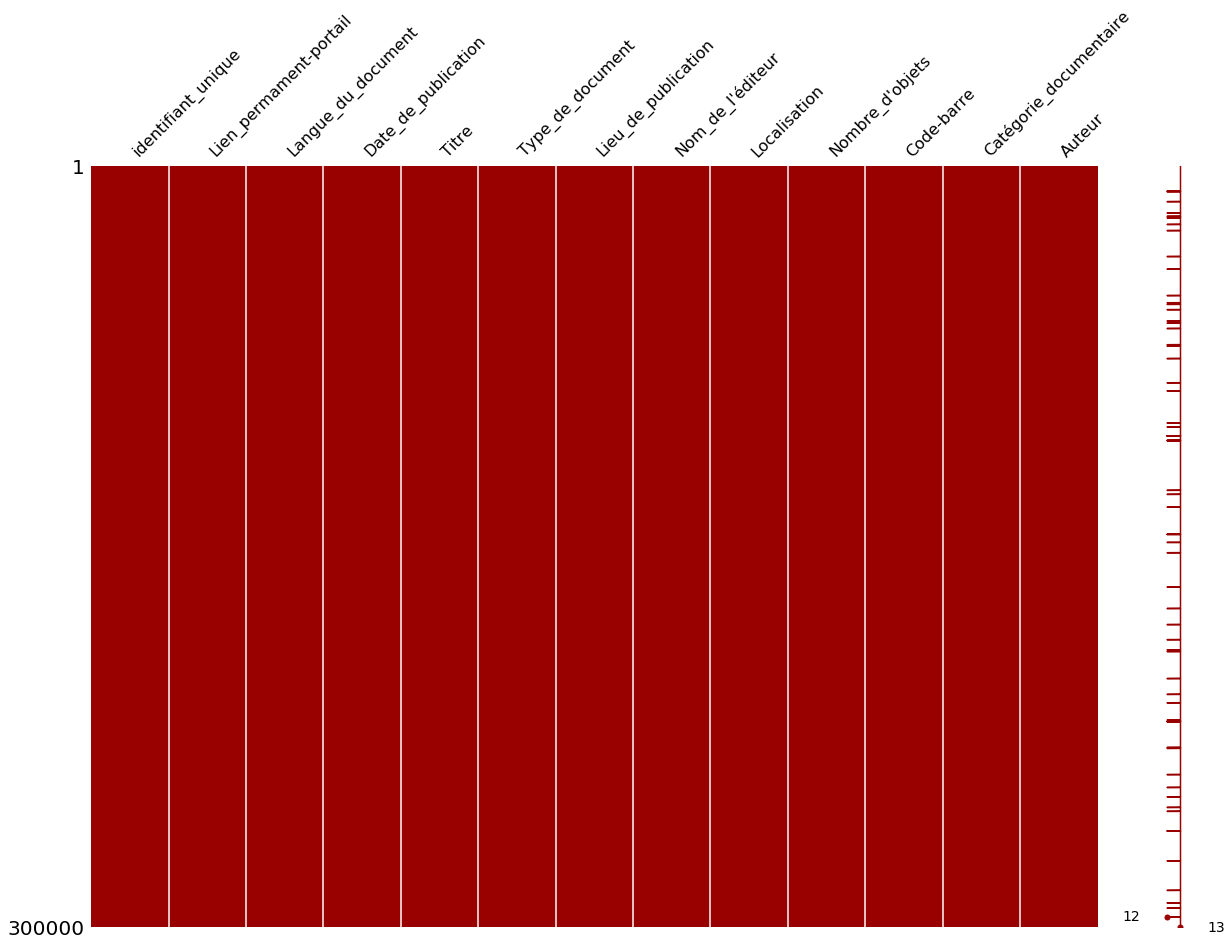

In [29]:
import missingno as msno
msno.matrix(df1,figsize=(20,14), color=(0.6,0,0)) 

## Obtenir les colonnes catégoriques et numériques

In [29]:
cat_colonnes = list(df1.select_dtypes(include=['object']).columns)
num_colonnes = list(df1.select_dtypes(exclude=['object']).columns)

In [30]:
print('\n Colonnes Numerique  : \n' , num_colonnes)
print('\n Colonnes catégorielles : \n\n ' , cat_colonnes)


 Colonnes Numerique  : 
 ['identifiant_unique', "Nombre_d'objets"]

 Colonnes catégorielles : 

  ['Lien_permament-portail', 'Langue_du_document', 'Date_de_publication', 'Titre', 'Type_de_document', 'Lieu_de_publication', "Nom_de_l'éditeur", 'Localisation', 'Code-barre', 'Catégorie_documentaire', 'Auteur']


Pour la manipulation des Colonnes catégorielles :

on voit que la 'Date_de_publication' et 'Identifiant' est de types catégorielles ce qui est pas normal dans la suite de notre analse 
on vas changer le type de ces 2 colonnes.

#### Identifiant unique :

In [31]:
df1.identifiant_unique

0         2103341
1         1140153
2         1797721
3         1827493
4         1083713
           ...   
299995    2063953
299996     611524
299997     791827
299998      68952
299999    2066058
Name: identifiant_unique, Length: 300000, dtype: int64

In [32]:
df1['identifiant_unique'].isnull().sum()

0

In [33]:
DF=df1

In [29]:
#définir la colonne "identifiant_unique" comme l'index de la Dataframe
#DF = df1.set_index('identifiant_unique')
#print('Dataframe Modifié :')
#DF

Dataframe Modifié :


Lien_permament-portail  \
identifiant_unique                                                      
2103341             http://bibliotheques-specialisees.paris.fr/ark...   
1140153             http://bibliotheques-specialisees.paris.fr/ark...   
1797721             http://bibliotheques-specialisees.paris.fr/ark...   
1827493             http://bibliotheques-specialisees.paris.fr/ark...   
1083713             http://bibliotheques-specialisees.paris.fr/ark...   
...                                                               ...   
2063953             http://bibliotheques-specialisees.paris.fr/ark...   
611524              https://bibliotheques-specialisees.paris.fr/ar...   
791827              http://bibliotheques-specialisees.paris.fr/ark...   
68952               http://bibliotheques-specialisees.paris.fr/ark...   
2066058             http://bibliotheques-specialisees.paris.fr/ark...   

                   Langue_du_document             Date_de_publication  \
identifiant_unique                                                      
2103341                           fre                            1964   
1140153                           fre                       cop. 2010   
1797721                           fre                        Mai 1957   
1827493                           fre  [date de publication inconnue]   
1083713                           und                           P1974   
...                               ...                             ...   
2063953                     fre ; ger                         DL 2016   
611524                        inconnu                       cop. 2003   
791827                            fre                            1920   
68952                             fre                            1937   
2066058                           fre                         DL 2016   

                                           Titre         Type_de_document  \
identifiant_unique                                                          
2103341                              Raymond Gid          [Texte imprimé]   
1140153                 Raymond Aron et l'Europe          [Texte imprimé]   
1797721             Raymond Aron. Plan rapproché             [Image fixe]   
1827493                          Raymond. Acteur             [Image fixe]   
1083713                    Ray Conniff in Moscow  [Enregistrement sonore]   
...                                          ...                      ...   
2063953                  Passionnément céramique          [Texte imprimé]   
611524                           Arthur Grumiaux         [Images animées]   
791827                   Récréations littéraires          [Texte imprimé]   
68952                         Primitifs français          [Texte imprimé]   
2066058                    La passion du mariage          [Texte imprimé]   

                                    Lieu_de_publication  \
identifiant_unique                                        
2103341                                           Paris   
1140153             Berne ; Berlin ; Bruxelles [et al.]   
1797721                                         inconnu   
1827493                                         inconnu   
1083713                                            USSR   
...                                                 ...   
2063953                                       Stuttgart   
611524                                            Paris   
791827                                            Paris   
68952                                             Paris   
2066058                                           Paris   

                                       Nom_de_l'éditeur Localisation  \
identifiant_unique                                                     
2103341                                 Deberny-Peignot        ESAIG   
1140153                                         P. Lang         BAVP   
1797721                                         inconnu         BHVP   
1827493          

Renommer l'index 

In [30]:
#DF.index.name

'identifiant_unique'

In [31]:
#DF.index.name = 'ID'

In [32]:
#DF

#### Lien permament portail:

Affichage des liens :

In [34]:
l =[ link for link in DF["Lien_permament-portail"]]

In [35]:
for i in range(10):
    print(l[i])

http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0002103341
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001140153
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001797721
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001827493
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001083713
https://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001093682
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0002154891
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001140977
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001893448
http://bibliotheques-specialisees.paris.fr/ark:/73873/pf0001715276


### Langue du document :

In [36]:
print("les langues des documents :\n \n", DF['Langue_du_document'])

les langues des documents :
 
 0               fre
1               fre
2               fre
3               fre
4               und
            ...    
299995    fre ; ger
299996      inconnu
299997          fre
299998          fre
299999          fre
Name: Langue_du_document, Length: 300000, dtype: object


Le problème auquel j'ai été confronte et qui est rencontré dans la base de données c'est que je devrais nettoyer certaines données et les données n'étaient pas normalisées. Dans des colonnes, on trouvent des cellules qui avaient plusieurs valeurs séparées par des points-virgules. Je ne pouvais pas connaître la distribution de la fréquence d'apparition de la valeur sans diviser ces cellules en cellules individuelles; créer de nouvelles lignes.

par exemple : `fre ; ger`

### SOLUTION :
#### Méthode 1 :

Il n'y a pas de moyen simple de nettoyer cela dans Pandas,

Dans la correction des TDS en classe, on a rencontre le même problème pour nettoyer la liste des pays.
je peux vous proposer une solution pour traiter ce problème.

In [37]:
DF1 = \
(DF.set_index(DF.columns.drop('Langue_du_document',1).tolist())
   .Langue_du_document.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Langue_du_document'})
   .loc[:, DF.columns]
)

DF1

identifiant_unique                             Lien_permament-portail  \
0                  2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2                  1797721  http://bibliotheques-specialisees.paris.fr/ark...   
3                  1827493  http://bibliotheques-specialisees.paris.fr/ark...   
4                  1083713  http://bibliotheques-specialisees.paris.fr/ark...   
...                    ...                                                ...   
308824             2063953  http://bibliotheques-specialisees.paris.fr/ark...   
308825              611524  https://bibliotheques-specialisees.paris.fr/ar...   
308826              791827  http://bibliotheques-specialisees.paris.fr/ark...   
308827               68952  http://bibliotheques-specialisees.paris.fr/ark...   
308828             2066058  http://bibliotheques-specialisees.paris.fr/ark...   

       Langue_du_document             Date_de_publication  \
0                     fre                            1964   
1                     fre                       cop. 2010   
2                     fre                        Mai 1957   
3                     fre  [date de publication inconnue]   
4                     und                           P1974   
...                   ...                             ...   
308824                ger                         DL 2016   
308825            inconnu                       cop. 2003   
308826                fre                            1920   
308827                fre                            1937   
308828                fre                         DL 2016   

                               Titre         Type_de_document  \
0                        Raymond Gid          [Texte imprimé]   
1           Raymond Aron et l'Europe          [Texte imprimé]   
2       Raymond Aron. Plan rapproché             [Image fixe]   
3                    Raymond. Acteur             [Image fixe]   
4              Ray Conniff in Moscow  [Enregistrement sonore]   
...                              ...                      ...   
308824       Passionnément céramique          [Texte imprimé]   
308825               Arthur Grumiaux         [Images animées]   
308826       Récréations littéraires          [Texte imprimé]   
308827            Primitifs français          [Texte imprimé]   
308828         La passion du mariage          [Texte imprimé]   

                        Lieu_de_publication  \
0                                     Paris   
1       Berne ; Berlin ; Bruxelles [et al.]   
2                                   inconnu   
3                                   inconnu   
4                                      USSR   
...                                     ...   
308824                            Stuttgart   
308825                                Paris   
308826                                Paris   
308827                                Paris   
308828                                Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                           éditeur inconnu         BHVP         1.000000   
3                           éditeur inconnu         BHVP         1.000000   
4                                  Melodija          MMP         1.000000   
...                                     ...          ...              ...   
308824            Arnoldsche Art Publishers          FOR         1.000000   
308825  Idéale Audience International [éd.]          MMP         1.000000   
308826                             Hachette         BALZ         1.000000   
308827                               Alpina          FOR         1.000000   
308828                                  PUF   BMD ; BAVP         0.998425   

         Code-barre Catégorie_d

In [38]:
DF1.Langue_du_document.unique()

array(['fre', 'und', 'ger', 'eng', 'zxx', 'inconnu', 'lat', 'ita', 'rus ',
       ' fre', 'fre ', ' eng', 'eng ', ' ger', 'gre', 'chi ', ' fre ',
       ' spa', 'spa', 'frm', ' eng ', ' ita', 'ger ', 'rus', 'ita ',
       'mul', 'zul', ' dut', ' und', 'nic', 'pol', 'lat ', ' ara', 'por',
       'mul ', ' ita ', 'per', ' lat', '', 'rum', 'zxx ', 'jpn', 'dut ',
       ' ger ', 'cze', 'dut', 'cze ', ' mos', ' jpn', 'swe', 'heb ',
       ' oci', ' rus', 'jpn ', 'kor', ' spa ', 'dan', ' tur', 'cos',
       'spa ', ' hun', 'fin', 'pol ', 'bel', 'heb', 'oci', 'paa', 'tur',
       'nor', ' dut ', ' cze', ' lat ', 'hun', ' pol', 'ara', ' por',
       'chi', ' cpe', 'ara ', ' heb', ' swe', ' dan', ' chi', 'hrv ',
       ' srp ', ' cze ', ' dan ', ' baq ', ' fin ', ' glg ', ' hun ',
       ' gle ', ' lit ', ' ltz ', ' nor ', ' pol ', ' por ', ' rom ',
       ' swe ', ' tur ', ' wel', 'hun ', 'por ', 'geo', ' epo', 'vie ',
       'srp', ' bre', 'bre', ' amh', 'cat ', ' kor', 'frm ', ' mul',
      

On voit que sur certains valeurs nous avons des espaces comme : `'lat ' ...`

In [39]:
notreliste=DF1.Langue_du_document

In [40]:
L = [x.replace(' ', '') for x in notreliste]

In [41]:
DF1.Langue_du_document=L

In [42]:
DF1.Langue_du_document.unique()

array(['fre', 'und', 'ger', 'eng', 'zxx', 'inconnu', 'lat', 'ita', 'rus',
       'gre', 'chi', 'spa', 'frm', 'mul', 'zul', 'dut', 'nic', 'pol',
       'ara', 'por', 'per', '', 'rum', 'jpn', 'cze', 'mos', 'swe', 'heb',
       'oci', 'kor', 'dan', 'tur', 'cos', 'hun', 'fin', 'bel', 'paa',
       'nor', 'cpe', 'hrv', 'srp', 'baq', 'glg', 'gle', 'lit', 'ltz',
       'rom', 'wel', 'geo', 'epo', 'vie', 'bre', 'amh', 'cat', 'tam',
       'cpf', 'may', 'bos', 'ukr', 'aze', 'lap', 'ful', 'bul', 'inc',
       'bnt', 'tha', 'bil', 'iku', 'ben', 'uig', 'slo', 'chu', 'pro',
       'crp', 'afa', 'hin', 'bam', 'est', 'ind', 'tib', 'kaz', 'arm',
       'afr', 'tai', 'man', 'alb', 'slv', 'yid', 'snd', 'uzb', 'fro',
       'mlg', 'gla', 'lav', 'swa', 'tgl', 'son', 'grc', 'wol', 'mas',
       'yor', 'mao', 'ang', 'roa', 'mac', 'sag', 'kur', 'kab', 'ira',
       'art', 'akk', 'enm', 'esp', 'sit', 'ssa', 'sla', 'tat', 'chn',
       'kin', 'gem', 'myn', 'kro', 'que', 'mol', 'mai', 'mar', 'mon',
       'ice'

On remplace les `' '` par `nan` :

In [40]:
DF1.Langue_du_document = DF1.Langue_du_document.replace(r'^\s*$', np.NaN, regex=True)

In [41]:
DF1.Langue_du_document.unique()

array(['fre', 'und', 'ger', 'eng', 'zxx', 'inconnu', 'lat', 'ita', 'rus',
       'gre', 'chi', 'spa', 'frm', 'mul', 'zul', 'dut', 'nic', 'pol',
       'ara', 'por', 'per', nan, 'rum', 'jpn', 'cze', 'mos', 'swe', 'heb',
       'oci', 'kor', 'dan', 'tur', 'cos', 'hun', 'fin', 'bel', 'paa',
       'nor', 'cpe', 'hrv', 'srp', 'baq', 'glg', 'gle', 'lit', 'ltz',
       'rom', 'wel', 'geo', 'epo', 'vie', 'bre', 'amh', 'cat', 'tam',
       'cpf', 'may', 'bos', 'ukr', 'aze', 'lap', 'ful', 'bul', 'inc',
       'bnt', 'tha', 'bil', 'iku', 'ben', 'uig', 'slo', 'chu', 'pro',
       'crp', 'afa', 'hin', 'bam', 'est', 'ind', 'tib', 'kaz', 'arm',
       'afr', 'tai', 'man', 'alb', 'slv', 'yid', 'snd', 'uzb', 'fro',
       'mlg', 'gla', 'lav', 'swa', 'tgl', 'son', 'grc', 'wol', 'mas',
       'yor', 'mao', 'ang', 'roa', 'mac', 'sag', 'kur', 'kab', 'ira',
       'art', 'akk', 'enm', 'esp', 'sit', 'ssa', 'sla', 'tat', 'chn',
       'kin', 'gem', 'myn', 'kro', 'que', 'mol', 'mai', 'mar', 'mon',
       'ice

In [43]:
DF1.Langue_du_document.fillna(value="inconnu",inplace=True)

In [44]:
DF1.Langue_du_document.unique()

array(['fre', 'und', 'ger', 'eng', 'zxx', 'inconnu', 'lat', 'ita', 'rus',
       'gre', 'chi', 'spa', 'frm', 'mul', 'zul', 'dut', 'nic', 'pol',
       'ara', 'por', 'per', '', 'rum', 'jpn', 'cze', 'mos', 'swe', 'heb',
       'oci', 'kor', 'dan', 'tur', 'cos', 'hun', 'fin', 'bel', 'paa',
       'nor', 'cpe', 'hrv', 'srp', 'baq', 'glg', 'gle', 'lit', 'ltz',
       'rom', 'wel', 'geo', 'epo', 'vie', 'bre', 'amh', 'cat', 'tam',
       'cpf', 'may', 'bos', 'ukr', 'aze', 'lap', 'ful', 'bul', 'inc',
       'bnt', 'tha', 'bil', 'iku', 'ben', 'uig', 'slo', 'chu', 'pro',
       'crp', 'afa', 'hin', 'bam', 'est', 'ind', 'tib', 'kaz', 'arm',
       'afr', 'tai', 'man', 'alb', 'slv', 'yid', 'snd', 'uzb', 'fro',
       'mlg', 'gla', 'lav', 'swa', 'tgl', 'son', 'grc', 'wol', 'mas',
       'yor', 'mao', 'ang', 'roa', 'mac', 'sag', 'kur', 'kab', 'ira',
       'art', 'akk', 'enm', 'esp', 'sit', 'ssa', 'sla', 'tat', 'chn',
       'kin', 'gem', 'myn', 'kro', 'que', 'mol', 'mai', 'mar', 'mon',
       'ice'

#### Renommer les valeurs : 

On crée `un dictionnaire` de langue qui va nous permettre de bien lire la langue de document.

In [45]:
Languecol={
"abk":"abkhaze" ,
"ace":"aceh",
"ach":"acoli",
"ada":"adangme",
"ady":"adyghé",
"aar":"afar",
"afh":"afrihili",
"afr":"afrikaans",
"afa":"afro-asiatiques",
"ain":"aïnou",
"aka":"akan",
"akk":"akkadien",
"alb":"albanais",
"gsw":"alémanique",
"ale":"aléoute",
"ale":"algonquines",
"ger":"allemand",
"nds":"allemand",
"gmh":"allemand",
"goh":"allemand",
"gsw":"alsacien",
"alt":"altai du Sud",
"tut":"altaïques",
"zgh":"amazighe standard marocain",
"cai":"amérindiennes de l'Amérique centrale",
"amh":"amharique",
"anp":"angika",
"eng":"anglais",
"enm":"anglais moyen",
"ang":"anglo-saxon",
"apa":"apaches",
"ara":"arabe",
"arg":"aragonais",
"arc":"araméen d'empire",
"arp":"arapaho",
"arw":"arawak",
"arm":"arménien",
"rup":"aroumain",
"asm":"assamai s",
"ast":"asturien",
"ast":"asturoléonais",
"ath":"athapascanes",
"aus":"australiennes",
"map":"austronésiennes",
"ava":"avar",
"ave":"avestique",
"awa":"awadhi",
"aym":"aymara",
"aze":"azéri",
"ast":"bable",
"bak":"bachkir",
"ban":"balinais",
"bal":"baloutchi",
"bat":"baltes",
"bam":"bambara",
"bai":"bamiléké",
"bad":"banda",
"bnt":"bantou",
"nds":"bas allemand",
"nds":"bas saxon",
"dsb":"bas-sorabe",
"bas":"basa",
"baq":"basque",
"btk":"batak",
"bej":"bedja",
"bem":"bemba",
"ben":"bengali",
"ber":"berbères",
"bho":"bhojpuri",
"bis":"bichlamar",
"bel":"biélorusse",
"bih":"biharis",
"bik":"bikol",
"byn":"bilen",
"bin":"bini",
"bur":"birman",
"bla":"blackfoot",
"byn":"blin",
"zbl":"Bliss",
"nob":"bokmål",
"bos":"bosniaque",
"bua":"bouriate",
"bra":"braj",
"bre":"breton",
"bug":"bugi",
"bul":"bulgare",
"cad":"caddo",
"krl":"carélien",
"car":"carib",
"spa":"castillan",
"cat":"catalan",
"cau":"caucasiennes",
"ceb":"cebuano",
"cel":"celtes",
"cel":"celtiques",
"cmc":"chames",
"cha":"chamorro",
"shn":"chan",
"chr":"cherokee",
"nya":"chewa",
"chy":"cheyenne",
"chb":"chibcha",
"nya":"chichewa",
"chi":"chinois",
"chn":"chinook",
"chp":"chipewyan",
"cho":"choctaw",
"zha":"chuang",
"chk":"chuuk",
"cop":"copte",
"kor":"coréen",
"cor":"cornique",
"cos":"corse",
"cus":"couchitiques",
"cre":"cree",
"hat":"créole haïtien",
"crp":"créoles et pidgins",
"cpe":"créoles et pidgins basés sur l'anglais",
"cpf":"créoles et pidgins basés sur le français",
"cpp":"créoles et pidgins basés sur le portugais",
"hrv":"croate",
"dak":"dakota",
"dan":"danois",
"dar":"dargwa",
"day":"dayak",
"del":"delaware",
"zza":"dimili",
"zza":"dimli",
"din":"dinka",
"dyu":"dioula",
"chg":"djaghataï",
"doi":"dogri",
"dgr":"dogrib",
"dua":"douala",
"dra":"dravidiennes",
"dzo":"dzongkha",
"sco":"écossais",
"bin":"edo",
"efi":"efik:",
"egy":"égyptien",
"eka":"ekajuk",
"elx":"élamite",
"myv":"erza",
"den":"esclave",
"spa":"espagnol",
"epo":"espéranto",
"est":"estonien",
"ewe":"éwé",
"ewo":"éwondo",
"fan":"fang",
"fat":"fanti",
"fao":"féroïen",
"fij":"fidjien",
"fil":"filipino",
"fiu":"finno-ougriennes",
"fin":"finnois",
"dut":"flamand",
"fon":"fon",
"fre":"français",
"fro":"français ancien",
"frm":"français moyen",
"fur":"frioulan",
"fry":"frison occidental",
"frs":"frison oriental",
"frr":"frison septentrional",
"gaa":"ga",
"gla":"gaélique",
"gla":"gaélique écossais",
"car":"galibi",
"glg":"galicien",
"orm":"galla",
"wel":"gallois",
"lug":"ganda",
"gay":"gayo",
"gba":"gbaya",
"geo":"géorgien",
"gem":"germaniques",
"gon":"gond",
"gor":"gorontalo",
"got":"gothique",
"guj":"goudjrati",
"grb":"grebo",
"grc":"grec ancien",
"gre":"grec moderne",
"kal":"groenlandais",
"grn":"guarani",
"gez":"guèze",
"gwi":"gwichin",
"hai":"haida",
"hat":"haïtien",
"hau":"haoussa",
"hsb":"haut-sorabe",
"haw":"hawaïen",
"heb":"hébreu",
"her":"herero",
"hil":"hiligaynon",
"him":"himachalis",
"hin":"hindi",
"hmo":"hiri motu",
"hit":"hittite",
"hmn":"hmong",
"hun":"hongrois",
"hup":"hupa",
"sah":"iakoute",
"iba":"iban",
"ido":"ido",
"ibo":"igbo",
"ijo":"ijo",
"ilo":"ilocano",
"inc":"indo-aryennes",
"ine":"indo-européennes"  ,
"ind":"indonésien",
"inh":"ingouche",
"ina":"interlingua" ,
"ile":"interlingue",
"iku":"inuktitut",
"ipk":"inupiaq",
"ira":"iraniennes",
"gle":"irlandais",
"sga":"irlandais ancien",
"mga":"irlandais moyen",
"iro":"iroquoises",
"ice":"islandais",
"ita":"italien",
"jpn":"japonais",
"jav":"javanais",
"jrb":"judéo-arabe",
"lad":"judéo-espagnol",
"jpr":"judéo-persan",
"kbd":"kabardien",
"kab":"kabyle",
"kac":"kachin",
"csb":"kachoube",
"xal":"kalmouk",
"kam":"kamba",
"kan":"kannada",
"kau":"kanouri",
"kaa":"karakalpak",
"krc":"karatchai balkar",
"kar":"karen",
"car":"karib",
"kas":"kashmiri",
"kaw":"kawi",
"kaz":"kazakh",
"kha":"khasi",
"khm":"khmer central",
"khi":"khoïsan",
"kho":"khotanais",
"kik":"kikuyu",
"kmb":"kimbundu",
"zza":"kirdki",
"kir":"kirghiz",
"gil":"kiribati",
"zza":"kirmanjki",
"tlh":"klingon",
"kom":"kom",
"kon":"kongo",
"kok":"konkani",
"kos":"kosrae",
"kum":"koumyk",
"kpe":"kpellé",
"kro":"krou",
"kua":"kuanyama",
"kur":"kurde",
"kru":"kurukh",
"kut":"kutenai",
"kua":"kwanyama",
"lah":"lahnda",
"lam":"lamba",
"und":"langue indéterminée",
"art":"langues artificielles",
"sgn":"langues des signes",
"lao":"lao",
"lat":"latin",
"ast":"léonais",
"lav":"letton",
"lez":"lezghien",
"lim":"limbourgeois",
"lin":"lingala",
"lit":"lituanien",
"jbo":"lojban",
"loz":"lozi",
"lub":"luba-katanga",
"lua":"luba-lulua",
"lui":"luiseno",
"lun":"lunda",
"luo":"luo",
"lus":"Lushai",
"ltz":"luxembourgeois",
"rup":"macédo-roumain",
"mac":"macédonien",
"mad":"madourais",
"mag":"magahi",
"mai":"maithili",
"mak":"makassar",
"may":"malais",
"mal":"malayalam",
"div":"maldivien",
"mlg":"malgache",
"mlt":"maltais",
"mdr":"mandar",
"mnc":"mandchou",
"man":"mandingue",
"mni":"manipuri",
"glv":"mannois",
"mno":"manobo",
"glv":"manx",
"mao":"maori",
"rar":"maori des îles Cook",
"arn":"mapuche",
"arn":"mapudungun",
"arn":"mapuce",
"mar":"marathe",
"chm":"mari",
"mah":"marshall",
"mwr":"marvari",
"mas":"massaï",
"myn":"maya",
"men":"mendé",
"mic":"mi kma:q",
"mic":"micmac:",
"min":"minang:kabau",
"mwl":"mirand:ais",
"moh":"mohawk:",
"mdf":"moksa",
"rum":"moldave",
"mkh":"môn-khmer",
"lol":"mongo",
"mon":"mongol",
"mos":"moré",
"mun":"mounda",
"mul":"multilingue",
"mus":"muskogee",
"nqo":"n ko",
"nah":"nahuatl",
"nap":"napolitain",
"nau":"nauruan",
"nav":"navaho",
"nde":"ndébélé du Nord",
"nbl":"ndébélé du Sud",
"ndo":"ndonga",
"dut":"néerlandais",
"dum":"néerlandais moyen",
"new":"nepal bhasa",
"nep":"népalais",
"new":"newari",
"nwc":"newari classique",
"nia":"nias",
"nic":"nigéro-kordofaniennes",
"ssa":"nilo-sahariennes",
"niu":"niué",
"nog":"nogaï",
"nog":"nogay",
"nai":"nord-amérindiennes",
"non":"norrois",
"nor":"norvégien",
"nob":"norvégien bokmål",
"nno":"norvégien nynorsk",
"nub":"nubiennes",
"nym":"nyamwezi",
"nya":"nyanja",
"nyn":"nyankolé",
"nno":"nynorsk",
"nyo":"nyoro",
"nzi":"nzema",
"oci":"occitan",
"pro":"occitan ancien",
"xal":"oïrat",
"oji":"ojibwa",
"ori":"oriya",
"osa":"osage",
"oss":"ossète",
"oto":"otomi",
"udm":"oudmourte",
"uga":"ougaritique",
"uig":"ouïgour",
"urd":"ourdou",
"uzb":"ouszbek",
"pus":"pachto",
"him":"paharis occidentales",
"pal":"pahlavi",
"pau":"palau",
"pli":"pali",
"pam":"pampangan",
"pag":"pangasinan",
"pap":"papiamento",
"paa":"papoues",
"zxx":"pas de contenu linguistique",
"nso":"pedi",
"pan":"pendjabi",
"per":"persan",
"peo":"perse",
"ful":"peul",
"phn":"phénicien",
"phi":"philippines",
"fil":"pilipino",
"pon":"pohnpei",
"pol":"polonais",
"por":"portugais",
"pra":"prâkrit",
"pro":"provençal ancien",
"que":"quechua",
"raj":"rajasthani",
"rap":"rapanui",
"rar":"rarotonga",
"roh":"romanche",
"roa":"romanes",
"rum":"roumain",
"run":"rundi",
"rus":"russe",
"kin":"rwanda",
"kho":"sakan",
"sal":"salishennes",
"sam":"samaritain",
"smi":"sames",
"smn":"sami d'Inari",
"smj":"sami de Lule",
"sme":"sami du Nord",
"sma":"sami du Sud",
"sms":"sami skolt",
"smo":"samoan",
"sad":"sandawe",
"sag":"sango",
"san":"sanskrit",
"sat":"santal",
"srd":"sarde",
"sas":"sasak",
"nds":"saxon",
"sel":"selkoupe",
"sem":"sémitiques",
"nso":"sepedi",
"srp":"serbe",
"srr":"sérère",
"sna":"shona",
"scn":"sicilien",
"sid":"sidamo",
"snd":"sindhi",
"sin":"singhalais",
"sit":"sino-tibétaines",
"sio":"sioux",
"sla":"slaves",
"chu":"slavon d'église",
"slo":"slovaque",
"slv":"slovène",
"sog":"sogdien",
"som":"somali",
"son":"songhai",
"snk":"soninké",
"dsb":"sorabe",
"hsb":"sorabe",
"wen":"sorabes",
"nso":"sotho du Nord",
"sot":"sotho du Sud",
"sun":"soundanais",
"sus":"soussou",
"srn":"sranan tongo",
"sai":"sud-amérindiennes",
"swe":"suédois",
"gsw":"suisse alémanique",
"suk":"sukuma",
"sux":"sumérien",
"swa":"swahili",
"ssw":"swati",
"zbl":"symboles Bliss",
"syr":"syriaque",
"syc":"syriaque classique",
"tgk":"tadjik",
"tgl":"tagalog",
"tah":"tahitien",
"tai":"tai",
"tmh":"tamacheq",
"tam":"tamoul",
"tat":"tatar",
"crh":"tatar de Crimé",
"cze":"tchèque",
"che":"tchétchène",
"chv":"tchouvache",
"tel":"télougou",
"tem":"temne",
"ter":"tereno",
"tet":"tetum",
"tha":"thaï",
"tib":"tibétain",
"tig":"tigré",
"tir":"tigrigna",
"tiv":"tiv",
"tli":"tlingit",
"tpi":"tok pisin",
"tkl":"tokelau",
"tog":"tonga" ,
"ton":"tongan",
"tyv":"touva",
"rom":"tsigane",
"tsi":"tsimshian",
"tso":"tsonga",
"tsn":"tswana",
"tum":"tumbuka",
"tup":"tupi",
"tur":"turc",
"ota":"turc ottoman",
"tuk":"turkmène",
"tvl":"tuvalu",
"twi":"twi",
"ukr":"ukrainien",
"umb":"umbundu",
"vai":"vaï",
"cat":"valencien",
"ven":"venda",
"vie":"vietnamien",
"chu":"vieux bulgare",
"chu":"vieux slave",
"vol":"volapük",
"vot":"vote",
"wak":"wakashanes",
"wln":"wallon",
"war":"waray",
"was":"washo",
"wal":"wolaitta",
"wal":"wolaytta",
"wol":"wolof",
"xho":"xhosa",
"yao":"yao",
"yap":"yapois",
"iii":"yi de Sichuan",
"yid":"yiddish",
"yor":"yoruba",
"ypk":"yupik",
"znd":"zandé",
"zap":"zapotèque",
"zza":"zaza",
"zen":"zenaga",
"zha":"zhuang",
"zul":"zoulou",
"zun":"zuni",
"inconnu":"inconnu"
}

In [46]:
DF1['Langue_du_document']= DF1['Langue_du_document'].map(Languecol) 

valeurs manquantes : 

In [47]:
DF1['Langue_du_document'].isnull().sum()

250

In [48]:
DF1['Langue_du_document'].unique()

array(['français', 'langue indéterminée', 'allemand', 'anglais',
       'pas de contenu linguistique', 'inconnu', 'latin', 'italien',
       'russe', 'grec moderne', 'chinois', 'espagnol', 'français moyen',
       'multilingue', 'zoulou', 'néerlandais', 'nigéro-kordofaniennes',
       'polonais', 'arabe', 'portugais', 'persan', nan, 'roumain',
       'japonais', 'tchèque', 'moré', 'suédois', 'hébreu', 'occitan',
       'coréen', 'danois', 'turc', 'corse', 'hongrois', 'finnois',
       'biélorusse', 'papoues', 'norvégien',
       "créoles et pidgins basés sur l'anglais", 'croate', 'serbe',
       'basque', 'galicien', 'irlandais', 'lituanien', 'luxembourgeois',
       'tsigane', 'gallois', 'géorgien', 'espéranto', 'vietnamien',
       'breton', 'amharique', 'valencien', 'tamoul',
       'créoles et pidgins basés sur le français', 'malais', 'bosniaque',
       'ukrainien', 'azéri', 'peul', 'bulgare', 'indo-aryennes', 'bantou',
       'thaï', 'inuktitut', 'bengali', 'ouïgour', 'slovaque',

In [49]:
DF1['Langue_du_document'].fillna(value="inconnu",inplace=True)

In [50]:
DF1['Langue_du_document'].isnull().sum()

0

Inspirée de l'article suivante :

le lien : https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e

In [50]:
#new_df = pnd.DataFrame(df1['Langue'].str.split(';').tolist()
 #                      , index=df1['identifiant_unique']).stack()

In [61]:
#new_df = new_df.reset_index([0, 'identifiant_unique'])

In [62]:
#new_df.columns = ['identifiant_unique', 'Langue']

In [93]:
#new_df.tail()

In [91]:
#new_df.Langue.unique()

In [51]:
DF1['Langue_du_document'].value_counts()

français               245368
anglais                 23445
inconnu                  7186
langue indéterminée      7101
allemand                 6732
                        ...  
nord-amérindiennes          1
mongo                       1
krou                        1
sorabes                     1
tahitien                    1
Name: Langue_du_document, Length: 146, dtype: int64

#### Methode 2 :

Cette méthode n'est pas efficace car elle consiste juste à faire split et mettre la valeur dans une nouvelle colonne.

In [52]:
df1['Langue'] = df1['Langue_du_document'].apply(lambda x: ';'.join(sorted(set(x.split(';')))))

In [53]:
df1['Langue']

0               fre
1               fre
2               fre
3               fre
4               und
            ...    
299995     ger;fre 
299996      inconnu
299997          fre
299998          fre
299999          fre
Name: Langue, Length: 300000, dtype: object

In [54]:
vsplit=df1["Langue"].str.split(';')

On remaque que la variable de Langue_du_document contient des champs avec plusieurs langues, Par exemple : `fre ; ger`, 
pour le traitement de cette variable on vas commencer par rennomer les langues en francais. 

On propose de predre juste la premiere case :

In [55]:
df1["Langue_doc_1"]=vsplit.str[0]
df1["Langue_doc_2"]=vsplit.str[1]
df1["Langue_doc_3"]=vsplit.str[2]

In [56]:
df1.drop('Langue' , axis='columns')

identifiant_unique                             Lien_permament-portail  \
0                  2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2                  1797721  http://bibliotheques-specialisees.paris.fr/ark...   
3                  1827493  http://bibliotheques-specialisees.paris.fr/ark...   
4                  1083713  http://bibliotheques-specialisees.paris.fr/ark...   
...                    ...                                                ...   
299995             2063953  http://bibliotheques-specialisees.paris.fr/ark...   
299996              611524  https://bibliotheques-specialisees.paris.fr/ar...   
299997              791827  http://bibliotheques-specialisees.paris.fr/ark...   
299998               68952  http://bibliotheques-specialisees.paris.fr/ark...   
299999             2066058  http://bibliotheques-specialisees.paris.fr/ark...   

       Langue_du_document             Date_de_publication  \
0                     fre                            1964   
1                     fre                       cop. 2010   
2                     fre                        Mai 1957   
3                     fre  [date de publication inconnue]   
4                     und                           P1974   
...                   ...                             ...   
299995          fre ; ger                         DL 2016   
299996            inconnu                       cop. 2003   
299997                fre                            1920   
299998                fre                            1937   
299999                fre                         DL 2016   

                               Titre         Type_de_document  \
0                        Raymond Gid          [Texte imprimé]   
1           Raymond Aron et l'Europe          [Texte imprimé]   
2       Raymond Aron. Plan rapproché             [Image fixe]   
3                    Raymond. Acteur             [Image fixe]   
4              Ray Conniff in Moscow  [Enregistrement sonore]   
...                              ...                      ...   
299995       Passionnément céramique          [Texte imprimé]   
299996               Arthur Grumiaux         [Images animées]   
299997       Récréations littéraires          [Texte imprimé]   
299998            Primitifs français          [Texte imprimé]   
299999         La passion du mariage          [Texte imprimé]   

                        Lieu_de_publication  \
0                                     Paris   
1       Berne ; Berlin ; Bruxelles [et al.]   
2                                   inconnu   
3                                   inconnu   
4                                      USSR   
...                                     ...   
299995                            Stuttgart   
299996                                Paris   
299997                                Paris   
299998                                Paris   
299999                                Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                           éditeur inconnu         BHVP         1.000000   
3                           éditeur inconnu         BHVP         1.000000   
4                                  Melodija          MMP         1.000000   
...                                     ...          ...              ...   
299995            Arnoldsche Art Publishers          FOR         1.000000   
299996  Idéale Audience International [éd.]          MMP         1.000000   
299997                             Hachette         BALZ         1.000000   
299998                               Alpina          FOR         1.000000   
299999                                  PUF   BMD ; BAVP         0.998425   

         Code-barre Catégorie_d

In [57]:
df1.isnull().sum()

identifiant_unique             0
Lien_permament-portail         0
Langue_du_document             0
Date_de_publication            0
Titre                         74
Type_de_document               0
Lieu_de_publication            0
Nom_de_l'éditeur               0
Localisation                   0
Nombre_d'objets                0
Code-barre                     0
Catégorie_documentaire         0
Auteur                         0
Langue                         0
Langue_doc_1                   0
Langue_doc_2              293262
Langue_doc_3              298605
dtype: int64

In [58]:
df1.Langue_doc_2.fillna(value="SansLangue",inplace=True)

In [59]:
df1.Langue_doc_3.fillna(value="SansLangue",inplace=True)

In [60]:
df1.head()

identifiant_unique                             Lien_permament-portail  \
0             2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1             1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2             1797721  http://bibliotheques-specialisees.paris.fr/ark...   
3             1827493  http://bibliotheques-specialisees.paris.fr/ark...   
4             1083713  http://bibliotheques-specialisees.paris.fr/ark...   

  Langue_du_document             Date_de_publication  \
0                fre                            1964   
1                fre                       cop. 2010   
2                fre                        Mai 1957   
3                fre  [date de publication inconnue]   
4                und                           P1974   

                          Titre         Type_de_document  \
0                   Raymond Gid          [Texte imprimé]   
1      Raymond Aron et l'Europe          [Texte imprimé]   
2  Raymond Aron. Plan rapproché             [Image fixe]   
3               Raymond. Acteur             [Image fixe]   
4         Ray Conniff in Moscow  [Enregistrement sonore]   

                   Lieu_de_publication Nom_de_l'éditeur Localisation  \
0                                Paris  Deberny-Peignot        ESAIG   
1  Berne ; Berlin ; Bruxelles [et al.]          P. Lang         BAVP   
2                              inconnu  éditeur inconnu         BHVP   
3                              inconnu  éditeur inconnu         BHVP   
4                                 USSR         Melodija          MMP   

   Nombre_d'objets   Code-barre Catégorie_documentaire                 Auteur  \
0              1.0            0                inconnu                inconnu   
1              1.0  3.22729e+13                     LI  Lapparent, Olivier de   
2              1.0  3.22729e+13                     PH                inconnu   
3              1.0  3.22729e+13                     PH              Van Bosch   
4              1.0  3.22729e+13                     MI           Conniff, Ray   

  Langue Langue_doc_1 Langue_doc_2 Langue_doc_3  
0    fre          fre   SansLangue   SansLangue  
1    fre          fre   SansLangue   SansLangue  
2    fre          fre   SansLangue   SansLangue  
3    fre          fre   SansLangue   SansLangue  
4    und          und   SansLangue   SansLangue

In [61]:
df1.Langue_doc_1.value_counts(dropna=False)

fre        239963
eng         18704
und          7067
inconnu      6936
ger          5211
            ...  
 bel            1
myn             1
mai             1
glg             1
ice             1
Name: Langue_doc_1, Length: 236, dtype: int64

In [62]:
df1.Langue_doc_2.value_counts(dropna=False)

SansLangue    293262
fre             2928
eng              992
ger              330
 ger             303
               ...  
 dut               1
mas                1
 pro               1
 dut               1
 vie               1
Name: Langue_doc_2, Length: 124, dtype: int64

In [63]:
df1.Langue_doc_3.value_counts(dropna=False)

SansLangue    298605
fre              432
eng              258
ger              100
 ita              98
               ...  
swe                1
 lat               1
 grc               1
ara                1
 glg               1
Name: Langue_doc_3, Length: 70, dtype: int64

In [64]:
df1['Langue_doc_1']= df1['Langue_doc_1'].map(Languecol) 

In [65]:
df1['Langue_doc_2']= df1['Langue_doc_2'].map(Languecol) 

In [66]:
df1['Langue_doc_3']= df1['Langue_doc_3'].map(Languecol) 

Vérification :

In [67]:
df1.head()

identifiant_unique                             Lien_permament-portail  \
0             2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1             1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2             1797721  http://bibliotheques-specialisees.paris.fr/ark...   
3             1827493  http://bibliotheques-specialisees.paris.fr/ark...   
4             1083713  http://bibliotheques-specialisees.paris.fr/ark...   

  Langue_du_document             Date_de_publication  \
0                fre                            1964   
1                fre                       cop. 2010   
2                fre                        Mai 1957   
3                fre  [date de publication inconnue]   
4                und                           P1974   

                          Titre         Type_de_document  \
0                   Raymond Gid          [Texte imprimé]   
1      Raymond Aron et l'Europe          [Texte imprimé]   
2  Raymond Aron. Plan rapproché             [Image fixe]   
3               Raymond. Acteur             [Image fixe]   
4         Ray Conniff in Moscow  [Enregistrement sonore]   

                   Lieu_de_publication Nom_de_l'éditeur Localisation  \
0                                Paris  Deberny-Peignot        ESAIG   
1  Berne ; Berlin ; Bruxelles [et al.]          P. Lang         BAVP   
2                              inconnu  éditeur inconnu         BHVP   
3                              inconnu  éditeur inconnu         BHVP   
4                                 USSR         Melodija          MMP   

   Nombre_d'objets   Code-barre Catégorie_documentaire                 Auteur  \
0              1.0            0                inconnu                inconnu   
1              1.0  3.22729e+13                     LI  Lapparent, Olivier de   
2              1.0  3.22729e+13                     PH                inconnu   
3              1.0  3.22729e+13                     PH              Van Bosch   
4              1.0  3.22729e+13                     MI           Conniff, Ray   

  Langue         Langue_doc_1 Langue_doc_2 Langue_doc_3  
0    fre             français          NaN          NaN  
1    fre             français          NaN          NaN  
2    fre             français          NaN          NaN  
3    fre             français          NaN          NaN  
4    und  langue indéterminée          NaN          NaN

#### Méthode utilisé dans les TDs :

Extraire la liste des types de document :

In [68]:
df1['Langue_doc_1'].isnull().sum()

6963

In [69]:
df1.Langue_doc_1.fillna(value="SansLangue",inplace=True)

In [70]:
langue = set() 
for l in df1['Langue_doc_1'].unique():
    langue.update(l.split(";"))   
langue

{'SansLangue',
 'afrikaans',
 'afro-asiatiques',
 'akkadien',
 'albanais',
 'allemand',
 "amérindiennes de l'Amérique centrale",
 'anglais',
 'anglo-saxon',
 'arabe',
 'arménien',
 'austronésiennes',
 'azéri',
 'bambara',
 'bantou',
 'basa',
 'basque',
 'bengali',
 'berbères',
 'birman',
 'biélorusse',
 'bosniaque',
 'breton',
 'bulgare',
 'chinois',
 'chinook',
 'cornique',
 'corse',
 'coréen',
 'croate',
 'créoles et pidgins',
 'créoles et pidgins basés sur le français',
 'créoles et pidgins basés sur le portugais',
 'danois',
 'dioula',
 'espagnol',
 'estonien',
 'finnois',
 'français',
 'français ancien',
 'français moyen',
 'galicien',
 'gallois',
 'gaélique écossais',
 'germaniques',
 'grec ancien',
 'grec moderne',
 'géorgien',
 'haoussa',
 'hindi',
 'hongrois',
 'hébreu',
 'inconnu',
 'indo-aryennes',
 'indonésien',
 'inuktitut',
 'iraniennes',
 'irlandais',
 'islandais',
 'italien',
 'japonais',
 'kabyle',
 'karib',
 'kazakh',
 'khmer central',
 'kirghiz',
 'kongo',
 'krou',
 

In [71]:
liste_langues = list(langue)

In [72]:
%time compte_langue = [df1['Langue_doc_1'].str.contains(lang,  na=False).value_counts()[True] for lang in liste_langues]

CPU times: user 12.5 s, sys: 8.4 ms, total: 12.5 s
Wall time: 12.6 s


In [73]:
compte_langue_df = pnd.DataFrame(data=compte_langue, index=liste_langues)

In [74]:
percent = int(compte_langue_df.sum()/100)

In [75]:
compte_langue_filtre = compte_langue_df[compte_langue_df[0]>percent].sort_values(0)
compte_langue_filtre

0
italien                        3123
pas de contenu linguistique    4572
allemand                       5212
inconnu                        6936
SansLangue                     6963
langue indéterminée            7067
anglais                       18704
français                     240283

Si on veut juste compter le nombre de fois ou `francais` apparaît comme langues, on peut utiliser: 

In [76]:
print("Nombre d'occurrence du Francais:",df1.Langue_doc_1.str.contains("français", na=False).value_counts()[True])

Nombre d'occurrence du Francais: 240283


### Date de publication :

In [51]:
DF1['Date_de_publication'].head(50)

0                               1964
1                          cop. 2010
2                           Mai 1957
3     [date de publication inconnue]
4                              P1974
5     [date de publication inconnue]
6                               9999
7                               2009
8                               2013
9                               2000
10                        impr. 2012
11                              1914
12                              1884
13                           DL 2013
14                              1931
15                              1776
16                       2 juin 1979
17                              2011
18                         cop. 2010
19    [date de publication inconnue]
20                              1989
21                              1988
22    [date de publication inconnue]
23                             P1983
24                         cop. 1966
25                        [ca. 1977]
26    [date de publication inconnue]
2

#### Méthode 1 : Un moyen de nettoyage de la Date de publication :

le lien: https://realpython.com/python-data-cleaning-numpy-pandas/ , Fonction qui permettre d'extraire les `Date`. 

In [52]:
import re 
DF2 = pnd.DataFrame(DF1)
DF2.insert(0, 'Année_de_publication', DF1.Date_de_publication.str.extract(r'(\d{4})', expand=False))
DF2

Année_de_publication  identifiant_unique  \
0                      1964             2103341   
1                      2010             1140153   
2                      1957             1797721   
3                       NaN             1827493   
4                      1974             1083713   
...                     ...                 ...   
308824                 2016             2063953   
308825                 2003              611524   
308826                 1920              791827   
308827                 1937               68952   
308828                 2016             2066058   

                                   Lien_permament-portail  \
0       http://bibliotheques-specialisees.paris.fr/ark...   
1       http://bibliotheques-specialisees.paris.fr/ark...   
2       http://bibliotheques-specialisees.paris.fr/ark...   
3       http://bibliotheques-specialisees.paris.fr/ark...   
4       http://bibliotheques-specialisees.paris.fr/ark...   
...                                                   ...   
308824  http://bibliotheques-specialisees.paris.fr/ark...   
308825  https://bibliotheques-specialisees.paris.fr/ar...   
308826  http://bibliotheques-specialisees.paris.fr/ark...   
308827  http://bibliotheques-specialisees.paris.fr/ark...   
308828  http://bibliotheques-specialisees.paris.fr/ark...   

         Langue_du_document             Date_de_publication  \
0                  français                            1964   
1                  français                       cop. 2010   
2                  français                        Mai 1957   
3                  français  [date de publication inconnue]   
4       langue indéterminée                           P1974   
...                     ...                             ...   
308824             allemand                         DL 2016   
308825              inconnu                       cop. 2003   
308826             français                            1920   
308827             français                            1937   
308828             français                         DL 2016   

                               Titre         Type_de_document  \
0                        Raymond Gid          [Texte imprimé]   
1           Raymond Aron et l'Europe          [Texte imprimé]   
2       Raymond Aron. Plan rapproché             [Image fixe]   
3                    Raymond. Acteur             [Image fixe]   
4              Ray Conniff in Moscow  [Enregistrement sonore]   
...                              ...                      ...   
308824       Passionnément céramique          [Texte imprimé]   
308825               Arthur Grumiaux         [Images animées]   
308826       Récréations littéraires          [Texte imprimé]   
308827            Primitifs français          [Texte imprimé]   
308828         La passion du mariage          [Texte imprimé]   

                        Lieu_de_publication  \
0                                     Paris   
1       Berne ; Berlin ; Bruxelles [et al.]   
2                                   inconnu   
3                                   inconnu   
4                                      USSR   
...                                     ...   
308824                            Stuttgart   
308825                                Paris   
308826                                Paris   
308827                                Paris   
308828                                Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                           éditeur inconnu         BHVP         1.000000   
3                           éditeur inconnu         BHVP         1.000000   
4                                  Melodija          MMP         1.000000   
...                                     ...          ...              ...   
308824            A

Les Valeurs manquantes :

In [53]:
DF2.Année_de_publication.isnull().sum()

30347

les 35628 valeurs manquantes c'est de types string sous forme de `[date de pub incunnu]`

In [54]:
DF2.Année_de_publication.fillna(value="9999",inplace=True)

In [55]:
DF2.Année_de_publication.value_counts(dropna=False)

9999    35628
2004     4091
2005     3919
2006     3879
2008     3863
        ...  
1010        1
1520        1
1484        1
7773        1
1485        1
Name: Année_de_publication, Length: 531, dtype: int64

In [56]:
DF2.Année_de_publication.isnull().sum()

0

In [57]:
DF2=DF2.drop(["Date_de_publication"], axis=1)

#### Méthode 2 : Un moyen alternative de nettoyage Date de publication :

lien : https://github.com/realpython/python-data-cleaning/blob/master/Data%20Cleaning%20Tutorial%20-%20Real%20Python.ipynb

In [58]:
caractères_non_désirés = ['[', ',', '-','?','$',';']

def clean_dates(dop):
    dop = str(dop)
    if dop.startswith('[') or dop == 'nan':
        return 'NaN'
    for caractères in caractères_non_désirés:
        if caractères in dop:
            caractères_index = dop.find(caractères)
            dop = dop[:caractères_index]
    return dop

df1['Date_de_publication'] = df1['Date_de_publication'].apply(clean_dates)

In [59]:
df1['Date_de_publication'].to_list()

['1964',
 'cop. 2010',
 'Mai 1957',
 'NaN',
 'P1974',
 'NaN',
 '9999',
 '2009',
 '2013',
 '2000',
 'impr. 2012',
 '1914',
 '1884',
 'DL 2013',
 '1931',
 '1776',
 '2 juin 1979',
 '2011',
 'cop. 2010',
 'NaN',
 '1989',
 '1988',
 'NaN',
 'P1983',
 'cop. 1966',
 'NaN',
 'NaN',
 '1886',
 '1999',
 'DL 2013',
 '1984',
 '9999',
 'NaN',
 'DL 1964',
 '1894',
 'Mai 1956',
 '9999',
 '9999',
 '9999',
 '2012',
 '1920',
 'DL 2015',
 '1857',
 '1897',
 '1915',
 '2002',
 '1995',
 '1891',
 '1851',
 '1852',
 '1882',
 '1880',
 '1978',
 '1988',
 '2013',
 '2012',
 '9999',
 '1892',
 '2011',
 '1909',
 '1904',
 '1909',
 '1880',
 '2000',
 'NaN',
 'NaN',
 'cop. 2007',
 '9999',
 '1907',
 '1894',
 'NaN',
 'NaN',
 'NaN',
 '1969',
 '9999',
 'cop. 2013',
 'NaN',
 'DL 2004',
 '2015',
 'NaN',
 'cop. 1949',
 '2006',
 'cop. 2014',
 '9999',
 '1955 et 1948',
 'DL 2011',
 '2001',
 'NaN',
 'DL 2010',
 'impr. 2013',
 'cop. 2003',
 'dl 2014',
 'cop. 1918',
 '1934',
 'NaN',
 'cop. 1992',
 'NaN',
 'P2005',
 '1979',
 'impr. 2014',

In [60]:
df1.Date_de_publication.replace(r'^\s*$', np.nan, regex=True)

0              1964
1         cop. 2010
2          Mai 1957
3               NaN
4             P1974
            ...    
299995      DL 2016
299996    cop. 2003
299997         1920
299998         1937
299999      DL 2016
Name: Date_de_publication, Length: 300000, dtype: object

In [61]:
df1.Date_de_publication.value_counts()

NaN             51301
9999             5212
1998             2806
1999             2794
2000             2682
                ...  
i2006               1
imp. 1987           1
janvier 1977        1
M. DCC. LXI         1
Février 1946        1
Name: Date_de_publication, Length: 5691, dtype: int64

### Titre : 

In [62]:
DF2["Titre"].to_list()

['Raymond Gid',
 "Raymond Aron et l'Europe",
 'Raymond Aron. Plan rapproché',
 'Raymond. Acteur',
 'Ray Conniff in Moscow',
 'Ravi Shankar in New York',
 "Ravenstein's Radfahrerkarte von Starkenburg (Rheinebene, Odenwald & Spessart)",
 'Les rapports public/privé dans la culture',
 "Ravageurs des végétaux d'ornement",
 'Les ravageurs de la vigne',
 'Ravages',
 'Rapports au Conseil de gouvernement',
 '[Rattachement du Laboratoire municipal à la Préfecture de la Seine]',
 'Ratman',
 'Die rationelle Verwertung der Stadtabwässer in der Landwirtschaft. Als Beispiel',
 "Ratification de la convention entre le Roi et la République de Venise pour l'exemption réciproque du droit d'aubaine. Du 30 mars 1774",
 "Rassemblement du RPR au Bois de Boulogne le 2 juin 1979 : la tribune surmontée d'une immense croix de Lorraine, l'assistance écoutant les discours les coulisses et l'envers du décor. Alsacienne en costume courant derrière les tribunes",
 "Rassemblement à l'occasion de l'ouverture de L'Assemb

On remarque qu'il y'a `des caracteres speciaux`,

Une fonction pour garder le texte sans les caracteres speciaux :

In [63]:
DF2["Titre"].str.replace(r"[^a-zA-ZÀ-ÿ-.]+", " ").str.strip()

0                          Raymond Gid
1             Raymond Aron et l Europe
2         Raymond Aron. Plan rapproché
3                      Raymond. Acteur
4                Ray Conniff in Moscow
                      ...             
308824         Passionnément céramique
308825                 Arthur Grumiaux
308826         Récréations littéraires
308827              Primitifs français
308828           La passion du mariage
Name: Titre, Length: 308829, dtype: object

In [64]:
DF2["Titre"].to_list()

['Raymond Gid',
 "Raymond Aron et l'Europe",
 'Raymond Aron. Plan rapproché',
 'Raymond. Acteur',
 'Ray Conniff in Moscow',
 'Ravi Shankar in New York',
 "Ravenstein's Radfahrerkarte von Starkenburg (Rheinebene, Odenwald & Spessart)",
 'Les rapports public/privé dans la culture',
 "Ravageurs des végétaux d'ornement",
 'Les ravageurs de la vigne',
 'Ravages',
 'Rapports au Conseil de gouvernement',
 '[Rattachement du Laboratoire municipal à la Préfecture de la Seine]',
 'Ratman',
 'Die rationelle Verwertung der Stadtabwässer in der Landwirtschaft. Als Beispiel',
 "Ratification de la convention entre le Roi et la République de Venise pour l'exemption réciproque du droit d'aubaine. Du 30 mars 1774",
 "Rassemblement du RPR au Bois de Boulogne le 2 juin 1979 : la tribune surmontée d'une immense croix de Lorraine, l'assistance écoutant les discours les coulisses et l'envers du décor. Alsacienne en costume courant derrière les tribunes",
 "Rassemblement à l'occasion de l'ouverture de L'Assemb

In [65]:
t=[ titre for titre in DF2["Titre"]]

In [66]:
for i in range(100):
    print (t[i])

Raymond Gid
Raymond Aron et l'Europe
Raymond Aron. Plan rapproché
Raymond. Acteur
Ray Conniff in Moscow
Ravi Shankar in New York
Ravenstein's Radfahrerkarte von Starkenburg (Rheinebene, Odenwald & Spessart)
Les rapports public/privé dans la culture
Ravageurs des végétaux d'ornement
Les ravageurs de la vigne
Ravages
Rapports au Conseil de gouvernement
[Rattachement du Laboratoire municipal à la Préfecture de la Seine]
Ratman
Die rationelle Verwertung der Stadtabwässer in der Landwirtschaft. Als Beispiel
Ratification de la convention entre le Roi et la République de Venise pour l'exemption réciproque du droit d'aubaine. Du 30 mars 1774
Rassemblement du RPR au Bois de Boulogne le 2 juin 1979 : la tribune surmontée d'une immense croix de Lorraine, l'assistance écoutant les discours les coulisses et l'envers du décor. Alsacienne en costume courant derrière les tribunes
Rassemblement à l'occasion de l'ouverture de L'Assemblée constituante tunisienne
Rare posters
The Rare live performance, 19

In [67]:
DF2["Titre"]=t[i]

### Type de document : 

In [68]:
DF2["Type_de_document"].to_list()

['[Texte imprimé]',
 '[Texte imprimé]',
 '[Image fixe]',
 '[Image fixe]',
 '[Enregistrement sonore]',
 '[Enregistrement sonore]',
 '[Document cartographique]',
 '[Texte imprimé]',
 'Texte imprimé',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 'inconnu',
 '[Image fixe]',
 '[Image fixe]',
 '[Texte imprimé]',
 '[Enregistrement sonore]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Enregistrement sonore]',
 '[Enregistrement sonore]',
 '[Musique imprimée]',
 '[Enregistrement sonore]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Image fixe]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 'Texte imprimé',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Texte imprimé]',
 '[Tex

In [69]:
DF2["Type_de_document"].unique()

array(['[Texte imprimé]', '[Image fixe]', '[Enregistrement sonore]',
       '[Document cartographique]', 'Texte imprimé', 'inconnu',
       '[Musique imprimée]', '[Texte imprimé] ; [Texte imprimé]',
       '[Images animées]', 'Musique imprimée', '[Texte imprimé ]/',
       '[Musique imprimée] pour piano et cordes',
       '[Musique imprimée] pour 2 violons, 2 altos et violoncelle',
       '[Enregistrement sonore ]', '[Ressource électronique]',
       '[Musique imprimée]:',
       '[Musique imprimée], Viola, Violine, Violoncello und Gitarre',
       '[Texte imprimé]Thérèse Schmid Bénech',
       '[Document cartographique manuscrit]',
       '[Musique imprimée] ; gréée par Léon Elain, Belmon, Catalo...[et al]',
       '[Multimédia multisupport]', '[Texte imprimé ]', '[Objet]',
       '[Texte manuscrit]', '[Microforme]', '[texte imprimé]',
       '[Texte imprimé ]:', '[ Texte imprimé]', 'Enregistrement sonore',
       "[Document d'archives]",
       '[Texte imprimé]$[recueillies par Anton

On remarque qu'il y a des valeurs dans les `[crochets]` la meilleure solution pour nettoyer cette colonne, c'est d'extraire l'information dans les `[]`.

In [70]:
DF2['TYPE_document'] = DF2['Type_de_document'].str.extract(r"\[(.*?)\]")
print (DF2['TYPE_document'])

0                 Texte imprimé
1                 Texte imprimé
2                    Image fixe
3                    Image fixe
4         Enregistrement sonore
                  ...          
308824            Texte imprimé
308825           Images animées
308826            Texte imprimé
308827            Texte imprimé
308828            Texte imprimé
Name: TYPE_document, Length: 308829, dtype: object


In [71]:
DF2['TYPE_document'].unique()

array(['Texte imprimé', 'Image fixe', 'Enregistrement sonore',
       'Document cartographique', nan, 'Musique imprimée',
       'Images animées', 'Texte imprimé ', 'Enregistrement sonore ',
       'Ressource électronique', 'Document cartographique manuscrit',
       'Multimédia multisupport', 'Objet', 'Texte manuscrit',
       'Microforme', 'texte imprimé', ' Texte imprimé',
       "Document d'archives", 'Texte tapuscrit',
       'Multimedia multisupport', 'Images animées ', ' Texte imprimé ',
       'Musique imprimée ', 'Texte imprim', 'enregistrement sonore',
       'Tapuscrit', "Manuscrit moderne et document d'archives",
       'Texte imprime', ' Document cartographique',
       'document cartographique ',
       'Document cartographique et texte imprimé', 'Texte imrpimé',
       'image fixe', 'Texte imrimé',
       "Manuscrit moderne et document d'archive", 'Texte imprimé}',
       'Texte imprimè', 'Document cartographique ', 'textre imprimé',
       'Teste imprimé', 'et', 'microf

Mettre en miniscule la colonne type de document pour enlever les duplicates value :

In [72]:
DF2['TYPE_document'] = DF2['TYPE_document'].str.lower() 

In [74]:
DF2['TYPE_document'].unique()

array(['texte imprimé', 'image fixe', 'enregistrement sonore',
       'document cartographique', nan, 'musique imprimée',
       'images animées', 'texte imprimé ', 'enregistrement sonore ',
       'ressource électronique', 'document cartographique manuscrit',
       'multimédia multisupport', 'objet', 'texte manuscrit',
       'microforme', ' texte imprimé', "document d'archives",
       'texte tapuscrit', 'multimedia multisupport', 'images animées ',
       ' texte imprimé ', 'musique imprimée ', 'texte imprim',
       'tapuscrit', "manuscrit moderne et document d'archives",
       'texte imprime', ' document cartographique',
       'document cartographique ',
       'document cartographique et texte imprimé', 'texte imrpimé',
       'texte imrimé', "manuscrit moderne et document d'archive",
       'texte imprimé}', 'texte imprimè', 'textre imprimé',
       'teste imprimé', 'et', 'image animée', 'text imprimé',
       'exte imprimé', 'texte immrimé', 'texte imptimé', 'texte impimé',


Enlever les caractères spéciaux :


Traitement des caractères spéciaux 

*le lien* ; https://stackoverflow.com/questions/49105080/how-to-remove-special-characters-from-list-in-python

In [75]:
DF2['TYPE_document'] = DF2['TYPE_document'].str.replace(r"[^a-zA-Zàâçéèêëîïôûùüÿñæœ0-9]", " ").str.strip()
DF2['TYPE_document'].to_list()

['texte imprimé',
 'texte imprimé',
 'image fixe',
 'image fixe',
 'enregistrement sonore',
 'enregistrement sonore',
 'document cartographique',
 'texte imprimé',
 nan,
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 nan,
 'image fixe',
 'image fixe',
 'texte imprimé',
 'enregistrement sonore',
 'texte imprimé',
 'texte imprimé',
 'enregistrement sonore',
 'enregistrement sonore',
 'musique imprimée',
 'enregistrement sonore',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'image fixe',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 nan,
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',
 'texte imprimé',


In [76]:
DF2['TYPE_document'].unique()

array(['texte imprimé', 'image fixe', 'enregistrement sonore',
       'document cartographique', nan, 'musique imprimée',
       'images animées', 'ressource électronique',
       'document cartographique manuscrit', 'multimédia multisupport',
       'objet', 'texte manuscrit', 'microforme', 'document d archives',
       'texte tapuscrit', 'multimedia multisupport', 'texte imprim',
       'tapuscrit', 'manuscrit moderne et document d archives',
       'texte imprime', 'document cartographique et texte imprimé',
       'texte imrpimé', 'texte imrimé',
       'manuscrit moderne et document d archive', 'texte imprimè',
       'textre imprimé', 'teste imprimé', 'et', 'image animée',
       'text imprimé', 'exte imprimé', 'texte immrimé', 'texte imptimé',
       'texte impimé', 'texcte imprimé', 'texte ilmprimé',
       'texte impromé', 'texte umprimé', 'multimédia mutisupport',
       'texte illustré', 'texe imprimé', 'terxte imprimé',
       'texte ilprimé', 'texteb imprimé', '', 'enregis

In [77]:
typedoc={
'texte imprimé':"Texte Imprimé",
'image fixe':"Image Fixe", 
'enregistrement sonore':'Enregistrement Sonore',
'document cartographique':'Document Cartographique', 
'musique imprimée':'Musique Imprimée',
'images animées':'Images Animées',
'ressource électronique':'Ressource électronique',
'document cartographique manuscrit':'Document cartographique manuscrit',
'multimédia multisupport':'Multimédia multisupport',
'objet':'objet', 
'texte manuscrit':'Texte Manuscrit', 
'microforme':'Microforme', 
'document d archives':"""Document D'archives""",
'texte tapuscrit':'Texte Tapuscrit', 
'multimedia multisupport':'Multimédia multisupport', 
'texte imprim':"Texte Imprimé",
'tapuscrit':'Texte Tapuscrit', 
'manuscrit moderne et document d archives':"""Document D'archives""",
'texte imprime':"Texte Imprimé", 
'document cartographique et texte imprimé':'Document Cartographique',
'texte imrpimé':"Texte Imprimé", 
'texte imrimé':"Texte Imprimé",
'manuscrit moderne et document d archive':"""Document D'archives""", 
'texte imprimè':"Texte Imprimé",
'textre imprimé':"Texte Imprimé", 
'teste imprimé':"Texte Imprimé", 
'et':"Sans type", 
'image animée':'Image Animée',
'text imprimé':"Texte Imprimé", 
'exte imprimé':"Texte Imprimé", 
'texte immrimé':"Texte Imprimé", 
'texte imptimé':"Texte Imprimé",
'texte impimé':"Texte Imprimé", 
'texcte imprimé':"Texte Imprimé",
'texte ilmprimé':"Texte Imprimé",
'texte impromé':"Texte Imprimé", 
'texte umprimé':"Texte Imprimé", 
'multimédia mutisupport':'Multimédia multisupport',
'texte illustré':'Texte Illustré', 
'texe imprimé':"Texte Imprimé", 
'terxte imprimé':"Texte Imprimé",
'texte ilprimé':"Texte Imprimé", 
'texteb imprimé':"Texte Imprimé", 
'':"Sans type", 
'enregistrement sonnore':'Enregistrement Sonore',
'texte impirmé':"Texte Imprimé",
'texte manuscrit avec coupures imprimées':'Texte Manuscrit',
'manuscrit moderne et documents d archive':'Texte Manuscrit',
'texte iimprimé':"Texte Imprimé",
'multimédi multisupport':'Multimédia multisupport', 
'texte imprmé':"Texte Imprimé", 
'images fixes':"Image Fixe",
'texte imprimée':"Texte Imprimé", 
'musique imprimé':"Musique Imprimé", 
'texto impreso':"Texte Imprimé",
'textte imprimé':"Texte Imprimé", 
'document électronique':'Document électronique', 
'text e imprimé':"Texte Imprimé",
'manuscrit':'Manuscrit', 
'texte imiprimé':"Texte Imprimé", 
'mage fixe':"Image Fixe", 
'texte gravé':'Texte Gravé',
'texte imprimés':"Texte Imprimé", 
'ttexte imprimé':"Texte Imprimé", 
'texet imprimé':"Texte Imprimé",
'texter imprimé':"Texte Imprimé", 
'images animéees':'Images Animéees', 
'livre d artiste':'Livre dartiste',
'recueil de planches':'Recueil de planches', 
'images fixe':"Image Fixe", 
'microfilm':'Microfilm', 
'et al':"Sans type",
'texte inprimé':"Texte Imprimé", 
'yexye imprimé':"Texte Imprimé", 
'traité imprimé':"Texte Imprimé",
'texrte imprimé':"Texte Imprimé", 
'texte imprilmé':"Texte Imprimé", 
'texte imprimeé':"Texte Imprimé",
'textes imprimées':"Texte Imprimé", 
'yexte imprimé':"Texte Imprimé", 
'enregistrement sonovre':'Enregistrement Sonore',
'livre cd artiste':"Livre", 
'enregistrement sononre':'Enregistrement Sonore', 
'texte imprimlé':"Texte Imprimé",
'enregistrement sonre':'Enregistrement Sonore', 
'te xte imprimé':"Texte Imprimé",
'enregistrements sonores':'Enregistrement Sonore',
'livres d artistes':'Livres',
'paris  exposition internationale des arts et techniques de 1937  le musée d art moderne':'Sans type',
'etxte imprimé':"Texte Imprimé", 
'enregistrement wonore':'Enregistrement Sonore',
'texte impriém':"Texte Imprimé",
'texte imaginal':'Texte Imaginal', 
'taexte imprimé':"Texte Imprimé", 
'texte imprimpé':"Texte Imprimé",
'texte i mprimé':"Texte Imprimé", 
'texte imperimé':"Texte Imprimé", 
'vente à':"Sans type", 
'texte imlprimé':"Texte Imprimé",
'texte iprimé':"Texte Imprimé",
'ilages animées':'Ilages animées',
'document cartographique imprimé':'Document Cartographique', 
'textxe imprimé':"Texte Imprimé", 
'imprimé':"Texte Imprimé",
'texte':"Texte Imprimé", 
'texre imprimé':"Texte Imprimé", 
'texte imprimé    texte imprimé':"Texte Imprimé",
'tyexte imprimé':"Texte Imprimé",
'texte omprimé':"Texte Imprimé",
'texte impripé':"Texte Imprimé",
'mansucrit':"Texte Imprimé",
'imges animées':'Images Animées',
'rexre imprimé':"Texte Imprimé", 
'multi supports':'Multi supports'
}

In [78]:
DF2['document_type']= DF2['TYPE_document'].map(typedoc) 

In [79]:
DF2=DF2.drop(columns=['TYPE_document', 'Type_de_document'])

In [80]:
DF2['document_type'].value_counts()

Texte Imprimé                        155813
Image Fixe                            28415
Enregistrement Sonore                 22904
Musique Imprimée                       7819
Images Animées                         6518
Document Cartographique                2339
Document cartographique manuscrit       497
Texte Manuscrit                         485
Multimédia multisupport                 402
Microforme                              323
Document D'archives                     146
Ressource électronique                   55
objet                                    44
Texte Tapuscrit                          17
Musique Imprimé                           6
Sans type                                 5
Livre dartiste                            3
Microfilm                                 3
Ilages animées                            2
Manuscrit                                 2
Images Animéees                           2
Document électronique                     2
Multi supports                  

In [81]:
DF2['document_type'].isnull().sum()

83019

In [82]:
DF2['document_type'].fillna(value="inconnu",inplace=True)

In [83]:
DF2['document_type'].isnull().sum()

0

In [84]:
DF2['document_type'].value_counts()

Texte Imprimé                        155813
inconnu                               83019
Image Fixe                            28415
Enregistrement Sonore                 22904
Musique Imprimée                       7819
Images Animées                         6518
Document Cartographique                2339
Document cartographique manuscrit       497
Texte Manuscrit                         485
Multimédia multisupport                 402
Microforme                              323
Document D'archives                     146
Ressource électronique                   55
objet                                    44
Texte Tapuscrit                          17
Musique Imprimé                           6
Sans type                                 5
Microfilm                                 3
Livre dartiste                            3
Manuscrit                                 2
Document électronique                     2
Ilages animées                            2
Images Animéees                 

In [85]:
DF2

Année_de_publication  identifiant_unique  \
0                      1964             2103341   
1                      2010             1140153   
2                      1957             1797721   
3                      9999             1827493   
4                      1974             1083713   
...                     ...                 ...   
308824                 2016             2063953   
308825                 2003              611524   
308826                 1920              791827   
308827                 1937               68952   
308828                 2016             2066058   

                                   Lien_permament-portail  \
0       http://bibliotheques-specialisees.paris.fr/ark...   
1       http://bibliotheques-specialisees.paris.fr/ark...   
2       http://bibliotheques-specialisees.paris.fr/ark...   
3       http://bibliotheques-specialisees.paris.fr/ark...   
4       http://bibliotheques-specialisees.paris.fr/ark...   
...                                                   ...   
308824  http://bibliotheques-specialisees.paris.fr/ark...   
308825  https://bibliotheques-specialisees.paris.fr/ar...   
308826  http://bibliotheques-specialisees.paris.fr/ark...   
308827  http://bibliotheques-specialisees.paris.fr/ark...   
308828  http://bibliotheques-specialisees.paris.fr/ark...   

         Langue_du_document                               Titre  \
0                  français  Radio Londres, la guerre en direct   
1                  français  Radio Londres, la guerre en direct   
2                  français  Radio Londres, la guerre en direct   
3                  français  Radio Londres, la guerre en direct   
4       langue indéterminée  Radio Londres, la guerre en direct   
...                     ...                                 ...   
308824             allemand  Radio Londres, la guerre en direct   
308825              inconnu  Radio Londres, la guerre en direct   
308826             français  Radio Londres, la guerre en direct   
308827             français  Radio Londres, la guerre en direct   
308828             français  Radio Londres, la guerre en direct   

                        Lieu_de_publication  \
0                                     Paris   
1       Berne ; Berlin ; Bruxelles [et al.]   
2                                   inconnu   
3                                   inconnu   
4                                      USSR   
...                                     ...   
308824                            Stuttgart   
308825                                Paris   
308826                                Paris   
308827                                Paris   
308828                                Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                           éditeur inconnu         BHVP         1.000000   
3                           éditeur inconnu         BHVP         1.000000   
4                                  Melodija          MMP         1.000000   
...                                     ...          ...              ...   
308824            Arnoldsche Art Publishers          FOR         1.000000   
308825  Idéale Audience International [éd.]          MMP         1.000000   
308826                             Hachette         BALZ         1.000000   
308827                               Alpina          FOR         1.000000   
308828                                  PUF   BMD ; BAVP         0.998425   

         Code-barre Catégorie_documentaire  \
0                 0                inconnu   
1       3.22729e+13                     LI   
2       3.22729e+13                     PH   
3       3.22729e+13                     PH   
4       3.22729e+13                     MI   
...             ...                    ...   
308824  3.22721e+13                     CE  

### Lieu de publication : 

In [86]:
DF2.Lieu_de_publication

0                                       Paris
1         Berne ; Berlin ; Bruxelles [et al.]
2                                     inconnu
3                                     inconnu
4                                        USSR
                         ...                 
308824                              Stuttgart
308825                                  Paris
308826                                  Paris
308827                                  Paris
308828                                  Paris
Name: Lieu_de_publication, Length: 308829, dtype: object

In [87]:
DF2.Lieu_de_publication.to_list()

['Paris',
 'Berne ; Berlin ; Bruxelles [et al.]',
 'inconnu',
 'inconnu',
 'USSR',
 'inconnu',
 'inconnu',
 'Grenoble',
 'Versailles',
 'Bordeaux',
 'Paris',
 'Hanoï-Haïphong',
 'Paris',
 'Bruxelles ; [Paris]',
 'Leipzig',
 'Paris',
 'inconnu',
 'Paris',
 'New York',
 '[Suresnes]',
 'Paris',
 'Paris',
 '[Suresnes]',
 'inconnu',
 'Paris',
 'inconnu',
 '[S.l.]',
 '[Lieux divers',
 'Paris',
 'Paris',
 '[S.l.]',
 'inconnu',
 '[Lieu de publication inconnu]',
 '[Paris]',
 '[Paris]',
 'inconnu',
 'inconnu',
 'inconnu',
 '[Paris]',
 'Bellecombe-en-Bauges (Savoie)',
 'Alger',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 '[Paris]',
 'Paris',
 'Paris',
 'Québec',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 'inconnu',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 'Paris',
 'San Francisco',
 'Paris',
 'Bombay',
 'Paris',
 'Paris',
 'Paris:C.N.A.,2013',
 'Bruxelles',
 'Paris',
 'inconnu',
 'inconnu',
 'inconnu',
 'Dum Dum, India',
 'inconnu',
 'Paris',
 'inconnu',
 '[Paris]',
 'Par

Les valeurs manquantes : 

In [88]:
DF2.Lieu_de_publication.isnull().sum()

0

`A nettoyer : l'idee c'est d'extraire les villes a partir d'un dictionnaire :`

In [111]:
!pip install geonamescache

In [89]:
import geonamescache

gc = geonamescache.GeonamesCache()
cities = gc.get_cities_by_name("Paris")

In [90]:
cities

[{'2988507': {'geonameid': 2988507,
   'name': 'Paris',
   'latitude': 48.85341,
   'longitude': 2.3488,
   'countrycode': 'FR',
   'population': 2138551,
   'timezone': 'Europe/Paris',
   'admin1code': '11'}},
 {'4717560': {'geonameid': 4717560,
   'name': 'Paris',
   'latitude': 33.66094,
   'longitude': -95.55551,
   'countrycode': 'US',
   'population': 24782,
   'timezone': 'America/Chicago',
   'admin1code': 'TX'}}]

In [114]:
DF2.Lieu_de_publication.unique()

array(['Paris', 'Berne ; Berlin ; Bruxelles [et al.]', 'inconnu', ...,
       'Toulouses',
       'A Paris, chez Charles Périer, rue S. Jean de Beauvais, au Bellerophon. 1565',
       'Montsûrs (53)'], dtype=object)

In [91]:
DF2.Lieu_de_publication

0                                       Paris
1         Berne ; Berlin ; Bruxelles [et al.]
2                                     inconnu
3                                     inconnu
4                                        USSR
                         ...                 
308824                              Stuttgart
308825                                  Paris
308826                                  Paris
308827                                  Paris
308828                                  Paris
Name: Lieu_de_publication, Length: 308829, dtype: object

In [93]:
DF3 = \
(DF2.set_index(DF2.columns.drop('Lieu_de_publication',1).tolist())
   .Lieu_de_publication.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Lieu_de_publication'})
   .loc[:, DF2.columns]
)

DF3

Année_de_publication  identifiant_unique  \
0                      1964             2103341   
1                      2010             1140153   
2                      2010             1140153   
3                      2010             1140153   
4                      1957             1797721   
...                     ...                 ...   
323595                 2016             2063953   
323596                 2003              611524   
323597                 1920              791827   
323598                 1937               68952   
323599                 2016             2066058   

                                   Lien_permament-portail Langue_du_document  \
0       http://bibliotheques-specialisees.paris.fr/ark...           français   
1       http://bibliotheques-specialisees.paris.fr/ark...           français   
2       http://bibliotheques-specialisees.paris.fr/ark...           français   
3       http://bibliotheques-specialisees.paris.fr/ark...           français   
4       http://bibliotheques-specialisees.paris.fr/ark...           français   
...                                                   ...                ...   
323595  http://bibliotheques-specialisees.paris.fr/ark...           allemand   
323596  https://bibliotheques-specialisees.paris.fr/ar...            inconnu   
323597  http://bibliotheques-specialisees.paris.fr/ark...           français   
323598  http://bibliotheques-specialisees.paris.fr/ark...           français   
323599  http://bibliotheques-specialisees.paris.fr/ark...           français   

                                     Titre  Lieu_de_publication  \
0       Radio Londres, la guerre en direct                Paris   
1       Radio Londres, la guerre en direct               Berne    
2       Radio Londres, la guerre en direct              Berlin    
3       Radio Londres, la guerre en direct   Bruxelles [et al.]   
4       Radio Londres, la guerre en direct              inconnu   
...                                    ...                  ...   
323595  Radio Londres, la guerre en direct            Stuttgart   
323596  Radio Londres, la guerre en direct                Paris   
323597  Radio Londres, la guerre en direct                Paris   
323598  Radio Londres, la guerre en direct                Paris   
323599  Radio Londres, la guerre en direct                Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                                   P. Lang         BAVP         1.000000   
3                                   P. Lang         BAVP         1.000000   
4                           éditeur inconnu         BHVP         1.000000   
...                                     ...          ...              ...   
323595            Arnoldsche Art Publishers          FOR         1.000000   
323596  Idéale Audience International [éd.]          MMP         1.000000   
323597                             Hachette         BALZ         1.000000   
323598                               Alpina          FOR         1.000000   
323599                                  PUF   BMD ; BAVP         0.998425   

         Code-barre Catégorie_documentaire  \
0                 0                inconnu   
1       3.22729e+13                     LI   
2       3.22729e+13                     LI   
3       3.22729e+13                     LI   
4       3.22729e+13                     PH   
...             ...                    ...   
323595  3.22721e+13                     CE   
323596  3.22721e+13                     DV   
323597            0                     LI   
323598  3.22721e+13                     LI   
323599  3.22721e+13                LI ; LI   

                                      Auteur   document_type  
0                                    inconnu   Texte Imprimé  
1                      L

In [94]:
DF3.Lieu_de_publication.unique()

array(['Paris', 'Berne ', ' Berlin ', ..., 'Toulouses',
       'A Paris, chez Charles Périer, rue S. Jean de Beauvais, au Bellerophon. 1565',
       'Montsûrs (53)'], dtype=object)

Nous allons maintenant écrire notre propre fonction personnalisée pour correspondre à la description dans les noms des villes.

le lien : https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/

In [95]:
# Importation de re package pour l'utilisation d'expressions régulières 

import re 
  
# Fonction de nettoyage des noms 
def Clean_names(City_name): 
    
    # Recherchez la parenthèse ouvrante dans le nom suivi de 
    # tout caractère répété un nombre quelconque de fois 
    
    if re.search('\(.*', City_name): 
  
       # Extraire la position du début du modèle 
        pos = re.search('\(.*', City_name).start() 
  
        # rendre le nom nettoyé 
        return City_name[:pos] 
  
    else: 
        # si un nettoyage est nécessaire, renvoyer le même nom 
        return City_name 

In [96]:
DF3['Lieu_de_publication'] = DF3['Lieu_de_publication'].apply(Clean_names) 
  
DF3.Lieu_de_publication

0                       Paris
1                      Berne 
2                     Berlin 
3          Bruxelles [et al.]
4                     inconnu
                 ...         
323595              Stuttgart
323596                  Paris
323597                  Paris
323598                  Paris
323599                  Paris
Name: Lieu_de_publication, Length: 323600, dtype: object

#### Enlever les parenthèses et les crochets :

In [102]:
DF3['Lieu_de_publication']=DF3['Lieu_de_publication'].str.replace(r"[\(\[].*?[\)\]]", " ").str.strip()
DF3['Lieu_de_publication']

0             Paris
1             Berne
2            Berlin
3         Bruxelles
4           inconnu
            ...    
323595    Stuttgart
323596        Paris
323597        Paris
323598        Paris
323599        Paris
Name: Lieu_de_publication, Length: 323600, dtype: object

In [103]:
DF3['Lieu_de_publication'].unique()

array(['Paris', 'Berne', 'Berlin', ..., 'Toulouses',
       'A Paris, chez Charles Périer, rue S. Jean de Beauvais, au Bellerophon. 1565',
       'Montsûrs'], dtype=object)

In [104]:
pub = DF3["Lieu_de_publication"].unique()
print("\n".join(pub[:20])+"\n...")

Paris
Berne
Berlin
Bruxelles
inconnu
USSR
Grenoble
Versailles
Bordeaux
Hanoï-Haïphong

Leipzig
New York
[Lieux divers
Bellecombe-en-Bauges
Alger
Québec
San Francisco
Bombay
Paris:C.N.A.,2013
...


In [105]:
DF3["Lieu_de_publication"].value_counts()

Paris                                143091
                                      47929
inconnu                               46218
London                                 5751
New York                               3278
                                      ...  
Saint-Briac                               1
Winterthur, Del.                          1
Louvier, imp. Eug. Izambert. 18..         1
Brive-la-gaillarde                        1
United Kingdom                            1
Name: Lieu_de_publication, Length: 8117, dtype: int64

Pour enlever les chaines vides  :

In [106]:
DF3["Lieu_de_publication"] = DF3["Lieu_de_publication"].replace(r'^\s*$', np.NaN, regex=True)

In [107]:
DF3["Lieu_de_publication"].fillna(value="inconnu",inplace=True)

In [108]:
DF3["Lieu_de_publication"].value_counts()

Paris                  143091
inconnu                 94147
London                   5751
New York                 3278
Bruxelles                2804
                        ...  
Châlo St-Mars               1
hambourg                    1
À Amiens                    1
Saint-Rémy-en l'Eau         1
Laxou-les-Nancy             1
Name: Lieu_de_publication, Length: 8116, dtype: int64

### Nom de l'éditeur :

In [109]:
DF3["""Nom_de_l'éditeur"""]

0                             Deberny-Peignot
1                                     P. Lang
2                                     P. Lang
3                                     P. Lang
4                             éditeur inconnu
                         ...                 
323595              Arnoldsche Art Publishers
323596    Idéale Audience International [éd.]
323597                               Hachette
323598                                 Alpina
323599                                    PUF
Name: Nom_de_l'éditeur, Length: 323600, dtype: object

Les valeurs manquantes : 

In [110]:
DF3["""Nom_de_l'éditeur"""].isnull().sum()

0

In [111]:
DF3["""Nom_de_l'éditeur"""].to_list()

['Deberny-Peignot',
 'P. Lang',
 'P. Lang',
 'P. Lang',
 'éditeur inconnu',
 'éditeur inconnu',
 'Melodija',
 '[éditeur inconnu]',
 'éditeur inconnu',
 'Observatoire des politiques culturelles',
 'Quae',
 'Féret',
 'Éd. Payot & Rivages',
 "Impr. d'Extrême-Orient",
 'Imprimerie municipale',
 'Kana',
 'Kana',
 'Robert Noske',
 'Impr. royale',
 'éditeur inconnu',
 'C. Deudon',
 'Poster auctions international',
 'Musidisc',
 '[éditeur inconnu]',
 '[éditeur inconnu]',
 'Musidisc',
 'Calliope',
 'Editions française de musique',
 '[éditeur inconnu]',
 '[éditeur inconnu]',
 'éd. divers]',
 'Direction des Journaux Officiels',
 'SOS homophobie',
 '[éditeur inconnu]',
 'éditeur inconnu',
 '[éditeur inconnu]',
 'Gallimard',
 '[Impr. municipale]',
 'éditeur inconnu',
 'éditeur inconnu',
 'éditeur inconnu',
 'éditeur inconnu',
 'Ed. du Croquant',
 'Typographie J. Carbonel',
 'Éditions du Seuil',
 'Ch. de Mourgues frères',
 '[Impr. municipale]',
 'Impr. de la Bourse du Commerce',
 'la Documentation f

In [112]:
DF3.loc[:, ["""Nom_de_l'éditeur"""]] = DF3[["""Nom_de_l'éditeur"""]].apply(lambda x: x.str.replace(';', '&'))
DF3.loc[:, ["""Nom_de_l'éditeur"""]]

Nom_de_l'éditeur
0                           Deberny-Peignot
1                                   P. Lang
2                                   P. Lang
3                                   P. Lang
4                           éditeur inconnu
...                                     ...
323595            Arnoldsche Art Publishers
323596  Idéale Audience International [éd.]
323597                             Hachette
323598                               Alpina
323599                                  PUF

[323600 rows x 1 columns]

In [113]:
list(DF3["""Nom_de_l'éditeur"""].unique())

['Deberny-Peignot',
 'P. Lang',
 'éditeur inconnu',
 'Melodija',
 '[éditeur inconnu]',
 'Observatoire des politiques culturelles',
 'Quae',
 'Féret',
 'Éd. Payot & Rivages',
 "Impr. d'Extrême-Orient",
 'Imprimerie municipale',
 'Kana',
 'Robert Noske',
 'Impr. royale',
 'C. Deudon',
 'Poster auctions international',
 'Musidisc',
 'Calliope',
 'Editions française de musique',
 'éd. divers]',
 'Direction des Journaux Officiels',
 'SOS homophobie',
 'Gallimard',
 '[Impr. municipale]',
 'Ed. du Croquant',
 'Typographie J. Carbonel',
 'Éditions du Seuil',
 'Ch. de Mourgues frères',
 'Impr. de la Bourse du Commerce',
 'la Documentation française',
 'Imprimerie Municipale, Hôtel de Ville',
 "Impr. de l'Assemblée nationale",
 'Impr. Maulde et Renou',
 'C. F. Langlois',
 'Impr. Charles Mourgues Frères',
 'la Documentation Française',
 'Inspection générale des bibliothèques',
 'Imprimerie nationale',
 'La Documentation française',
 'A. Chaigneau',
 'Didier',
 "Treasure from Solomon's mines",
 '[

In [114]:
DF3["N_Editeur"] = DF3["""Nom_de_l'éditeur"""].str.replace(r"[^a-zA-ZÀ-ÿ-]+", " ").str.strip()
DF3["N_Editeur"].to_list()

['Deberny-Peignot',
 'P Lang',
 'P Lang',
 'P Lang',
 'éditeur inconnu',
 'éditeur inconnu',
 'Melodija',
 'éditeur inconnu',
 'éditeur inconnu',
 'Observatoire des politiques culturelles',
 'Quae',
 'Féret',
 'Éd Payot Rivages',
 'Impr d Extrême-Orient',
 'Imprimerie municipale',
 'Kana',
 'Kana',
 'Robert Noske',
 'Impr royale',
 'éditeur inconnu',
 'C Deudon',
 'Poster auctions international',
 'Musidisc',
 'éditeur inconnu',
 'éditeur inconnu',
 'Musidisc',
 'Calliope',
 'Editions française de musique',
 'éditeur inconnu',
 'éditeur inconnu',
 'éd divers',
 'Direction des Journaux Officiels',
 'SOS homophobie',
 'éditeur inconnu',
 'éditeur inconnu',
 'éditeur inconnu',
 'Gallimard',
 'Impr municipale',
 'éditeur inconnu',
 'éditeur inconnu',
 'éditeur inconnu',
 'éditeur inconnu',
 'Ed du Croquant',
 'Typographie J Carbonel',
 'Éditions du Seuil',
 'Ch de Mourgues frères',
 'Impr municipale',
 'Impr de la Bourse du Commerce',
 'la Documentation française',
 'la Documentation franç

In [115]:
DF3['N_Editeur'].str.lower() 

0                          deberny-peignot
1                                   p lang
2                                   p lang
3                                   p lang
4                          éditeur inconnu
                        ...               
323595           arnoldsche art publishers
323596    idéale audience international éd
323597                            hachette
323598                              alpina
323599                                 puf
Name: N_Editeur, Length: 323600, dtype: object

In [116]:
DF3['N_Editeur'].value_counts()

éditeur inconnu            53382
éd divers                   7330
Gallimard                   3515
Hachette                    3176
Impr royale                 1855
                           ...  
The Spectator Company          1
Dotation Carnegie              1
distrib Sony                   1
Galerie Frédéric Bosser        1
F Greno                        1
Name: N_Editeur, Length: 76886, dtype: int64

`A MODIFIER :`

In [135]:
#dictio={
#"inconnu":"inconnu",                                                     
#"éditeur inconnu":"inconnu"   
#}    

In [136]:
#DF3['N_Editeur']= DF3['N_Editeur'].map(dictio) 

In [117]:
DF3['N_Editeur'].value_counts()

éditeur inconnu            53382
éd divers                   7330
Gallimard                   3515
Hachette                    3176
Impr royale                 1855
                           ...  
The Spectator Company          1
Dotation Carnegie              1
distrib Sony                   1
Galerie Frédéric Bosser        1
F Greno                        1
Name: N_Editeur, Length: 76886, dtype: int64

### Localisation :   

In [118]:
DF3["Localisation"].head(30)

0                                ESAIG
1                                 BAVP
2                                 BAVP
3                                 BAVP
4                                 BHVP
5                                 BHVP
6                                  MMP
7                                  MMP
8                                 BAVP
9                          BAVP ; CDML
10    DVDI ; DVDI ; DVMB ; DVDI ; DVBR
11                                DVDI
12                                BILI
13                             inconnu
14                             inconnu
15                                BILI
16                                BILI
17                                BAVP
18                                BHVP
19                                BHVP
20                                 BMD
21                                 FOR
22                                 MMP
23                                 FOR
24                                 FOR
25                       

In [119]:
DF3["Localisation"].to_list()

['ESAIG',
 'BAVP',
 'BAVP',
 'BAVP',
 'BHVP',
 'BHVP',
 'MMP',
 'MMP',
 'BAVP',
 'BAVP ; CDML',
 'DVDI ; DVDI ; DVMB ; DVDI ; DVBR',
 'DVDI',
 'BILI',
 'inconnu',
 'inconnu',
 'BILI',
 'BILI',
 'BAVP',
 'BHVP',
 'BHVP',
 'BMD',
 'FOR',
 'MMP',
 'FOR',
 'FOR',
 'MMP',
 'MMP',
 'BCVP',
 'MMP',
 'HJH',
 'BAVP',
 'inconnu',
 'BAVP',
 'ADP ; ADP',
 'inconnu',
 'ADP',
 'BHVP',
 'inconnu',
 'BHVP',
 'inconnu',
 'inconnu',
 'inconnu',
 'BAVP',
 'BAVP',
 'BAVP',
 'inconnu',
 'BAVP',
 'BHVP',
 'BAVP',
 'BAVP',
 'inconnu',
 'ADP',
 'ADP',
 'BAVP',
 'ADP ; ADP',
 'BAVP',
 'BAVP',
 'CDML',
 'CDML',
 'inconnu',
 'BAVP',
 'BAVP',
 'inconnu',
 'inconnu',
 'inconnu',
 'BAVP',
 'DVMB',
 'MMP',
 'ADP',
 'BAVP',
 'BAVP',
 'ESAIG',
 'inconnu',
 'MMP',
 'MMP',
 'MMP',
 'MMP',
 'inconnu',
 'CINE ; CINE ; CINE',
 'BMD',
 'BMD',
 'CINE',
 'inconnu',
 'BCVP',
 'DVMB',
 'FOR',
 'BHVP ; BHVP',
 'BHVP ; BHVP',
 'BILI',
 'BILI',
 'FOR',
 'MMP',
 'BAVP',
 'BMD',
 'CINE',
 'CINE',
 'inconnu',
 'BTV ; BTV',
 'BTV',
 '

Valeurs Manquantes :

In [120]:
DF3["Localisation"].isnull().sum()

0

Enlever les duplicates :

Permettre d'enlever les duplicates mots 


*le lien :* https://stackoverflow.com/questions/48088686/remove-duplicates-from-rows-and-columns-cell-in-a-dataframe-python

Avant d'enlever les duplicates, on doit supprimer les espaces de chaque element de notre liste :

In [121]:
liste=DF3.Localisation

In [122]:
A = [x.replace(' ', '') for x in liste]

In [123]:
DF3['Localisation']=A

In [124]:
DF3['Localisation']=DF3['Localisation'].apply(lambda x: ';'.join(sorted(set(x.split(';')))))

In [125]:
DF3['Localisation'].to_list()

['ESAIG',
 'BAVP',
 'BAVP',
 'BAVP',
 'BHVP',
 'BHVP',
 'MMP',
 'MMP',
 'BAVP',
 'BAVP;CDML',
 'DVBR;DVDI;DVMB',
 'DVDI',
 'BILI',
 'inconnu',
 'inconnu',
 'BILI',
 'BILI',
 'BAVP',
 'BHVP',
 'BHVP',
 'BMD',
 'FOR',
 'MMP',
 'FOR',
 'FOR',
 'MMP',
 'MMP',
 'BCVP',
 'MMP',
 'HJH',
 'BAVP',
 'inconnu',
 'BAVP',
 'ADP',
 'inconnu',
 'ADP',
 'BHVP',
 'inconnu',
 'BHVP',
 'inconnu',
 'inconnu',
 'inconnu',
 'BAVP',
 'BAVP',
 'BAVP',
 'inconnu',
 'BAVP',
 'BHVP',
 'BAVP',
 'BAVP',
 'inconnu',
 'ADP',
 'ADP',
 'BAVP',
 'ADP',
 'BAVP',
 'BAVP',
 'CDML',
 'CDML',
 'inconnu',
 'BAVP',
 'BAVP',
 'inconnu',
 'inconnu',
 'inconnu',
 'BAVP',
 'DVMB',
 'MMP',
 'ADP',
 'BAVP',
 'BAVP',
 'ESAIG',
 'inconnu',
 'MMP',
 'MMP',
 'MMP',
 'MMP',
 'inconnu',
 'CINE',
 'BMD',
 'BMD',
 'CINE',
 'inconnu',
 'BCVP',
 'DVMB',
 'FOR',
 'BHVP',
 'BHVP',
 'BILI',
 'BILI',
 'FOR',
 'MMP',
 'BAVP',
 'BMD',
 'CINE',
 'CINE',
 'inconnu',
 'BTV',
 'BTV',
 'BCVP',
 'MMP',
 'MMP',
 'MMP',
 'BAVP',
 'BCVP',
 'BHVP',
 'BILI',

On voit que que certaines lignes contiennent des listes de localisation et non pas des localisations..

In [126]:
DF4 = \
(DF3.set_index(DF3.columns.drop('Localisation',1).tolist())
   .Localisation.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Localisation'})
   .loc[:, DF3.columns]
)

DF4

Année_de_publication  identifiant_unique  \
0                      1964             2103341   
1                      2010             1140153   
2                      2010             1140153   
3                      2010             1140153   
4                      1957             1797721   
...                     ...                 ...   
339554                 2003              611524   
339555                 1920              791827   
339556                 1937               68952   
339557                 2016             2066058   
339558                 2016             2066058   

                                   Lien_permament-portail Langue_du_document  \
0       http://bibliotheques-specialisees.paris.fr/ark...           français   
1       http://bibliotheques-specialisees.paris.fr/ark...           français   
2       http://bibliotheques-specialisees.paris.fr/ark...           français   
3       http://bibliotheques-specialisees.paris.fr/ark...           français   
4       http://bibliotheques-specialisees.paris.fr/ark...           français   
...                                                   ...                ...   
339554  https://bibliotheques-specialisees.paris.fr/ar...            inconnu   
339555  http://bibliotheques-specialisees.paris.fr/ark...           français   
339556  http://bibliotheques-specialisees.paris.fr/ark...           français   
339557  http://bibliotheques-specialisees.paris.fr/ark...           français   
339558  http://bibliotheques-specialisees.paris.fr/ark...           français   

                                     Titre Lieu_de_publication  \
0       Radio Londres, la guerre en direct               Paris   
1       Radio Londres, la guerre en direct               Berne   
2       Radio Londres, la guerre en direct              Berlin   
3       Radio Londres, la guerre en direct           Bruxelles   
4       Radio Londres, la guerre en direct             inconnu   
...                                    ...                 ...   
339554  Radio Londres, la guerre en direct               Paris   
339555  Radio Londres, la guerre en direct               Paris   
339556  Radio Londres, la guerre en direct               Paris   
339557  Radio Londres, la guerre en direct               Paris   
339558  Radio Londres, la guerre en direct               Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                                   P. Lang         BAVP         1.000000   
3                                   P. Lang         BAVP         1.000000   
4                           éditeur inconnu         BHVP         1.000000   
...                                     ...          ...              ...   
339554  Idéale Audience International [éd.]          MMP         1.000000   
339555                             Hachette         BALZ         1.000000   
339556                               Alpina          FOR         1.000000   
339557                                  PUF         BAVP         0.998425   
339558                                  PUF          BMD         0.998425   

         Code-barre Catégorie_documentaire  \
0                 0                inconnu   
1       3.22729e+13                     LI   
2       3.22729e+13                     LI   
3       3.22729e+13                     LI   
4       3.22729e+13                     PH   
...             ...                    ...   
339554  3.22721e+13                     DV   
339555            0                     LI   
339556  3.22721e+13                     LI   
339557  3.22721e+13                LI ; LI   
339558  3.22721e+13                LI ; LI   

                                      Auteur   document_type  \
0                                    inconnu   Texte Imprimé   
1                      Lapparent, 

In [127]:
ensemble_de_loca = DF4["Localisation"].unique()
print("\n".join(ensemble_de_loca[:30])+"\n...")

ESAIG
BAVP
BHVP
MMP
CDML
DVBR
DVDI
DVMB
BILI
inconnu
BMD
FOR
BCVP
HJH
ADP
CINE
BTV
DVMJ
BALZ

64442
DASES
AF196977PF
Br15061
B
...


In [128]:
DF4["Localisation"].unique()

array(['ESAIG', 'BAVP', 'BHVP', 'MMP', 'CDML', 'DVBR', 'DVDI', 'DVMB',
       'BILI', 'inconnu', 'BMD', 'FOR', 'BCVP', 'HJH', 'ADP', 'CINE',
       'BTV', 'DVMJ', 'BALZ', '', '64442', 'DASES', 'AF196977PF',
       'Br15061', 'B'], dtype=object)

Pour enlever les chaines vides  :

In [129]:
DF4.Localisation.unique()

array(['ESAIG', 'BAVP', 'BHVP', 'MMP', 'CDML', 'DVBR', 'DVDI', 'DVMB',
       'BILI', 'inconnu', 'BMD', 'FOR', 'BCVP', 'HJH', 'ADP', 'CINE',
       'BTV', 'DVMJ', 'BALZ', '', '64442', 'DASES', 'AF196977PF',
       'Br15061', 'B'], dtype=object)

In [130]:
DF4.Localisation = DF4.Localisation.replace(r'^\s*$', np.NaN, regex=True)

In [131]:
DF4.Localisation.fillna(value="inconnu",inplace=True)

In [132]:
DF4["Localisation"].value_counts()

BHVP          93899
FOR           64686
BAVP          44969
MMP           30643
BILI          27722
HJH           16254
CINE          14597
BMD           13100
BCVP           8362
BTV            6379
inconnu        4618
ADP            3447
DVBR           2246
BALZ           2241
DVMB           2016
ESAIG          1863
CDML           1463
DVDI            621
DVMJ            427
B                 2
AF196977PF        1
Br15061           1
64442             1
DASES             1
Name: Localisation, dtype: int64

### Code-barre :

In [133]:
DF4['Code-barre']

0                   0
1         3.22729e+13
2         3.22729e+13
3         3.22729e+13
4         3.22729e+13
             ...     
339554    3.22721e+13
339555              0
339556    3.22721e+13
339557    3.22721e+13
339558    3.22721e+13
Name: Code-barre, Length: 339559, dtype: object

Le code barre dans notre jeu de donnees est de type object 
on doit changer le type du code barre :

Les valeurs manquantes : 

In [134]:
DF4['Code-barre'].isnull().sum()

0

On remarque le code barre est de type `float`,
conversion de type 

In [135]:
DF4['Code-barre'].astype(int)

0                      0
1         32272900725750
2         32272900725750
3         32272900725750
4         32272900808000
               ...      
339554    32272074656973
339555                 0
339556    32272078718753
339557    32272132288728
339558    32272132288728
Name: Code-barre, Length: 339559, dtype: int64

OU bien on utilise la fonction suivante :

In [136]:
a= DF4['Code-barre'].to_list()
a

['0',
 32272900725750.0,
 32272900725750.0,
 32272900725750.0,
 32272900808000.0,
 32272900847494.0,
 32272900653765.0,
 32272900663733.0,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 32262000074086.0,
 32272111914484.0,
 '0',
 '0',
 32272113121294.0,
 32272113121294.0,
 '0',
 '0',
 32272900817915.0,
 '0',
 32272093367636.0,
 32272900644555.0,
 32272091204336.0,
 32272090182566.0,
 32272900644554.0,
 32272119397294.0,
 32272119409974.0,
 32272900668814.0,
 32272104309767.0,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 32272900874823.0,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 32272108628659.0,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 32272126058590.0,
 32272105304627.0,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 32262000036218.0,
 32272900648868.0,
 '0',
 '0',
 '0',
 '0',
 '0',
 32272106827451.0,
 32272900659973.0,
 32272900664496.0,
 32272900648337.0,
 '0',
 '0',
 '0',
 32272127127188.0,
 32272122042333.0,
 '0',
 32272119645981.0,
 32262000068849.0,
 32272116411676.0

In [137]:
import math
c_list = []

for item in a:

    x = float(str(item).split('/')[0])

    if not math.isnan(x):
        c_list.append(int(x))
    else:
        c_list.append(0)

In [138]:
DF4['Code-barre']=c_list

In [139]:
DF4['Code-barre']

0                      0
1         32272900725750
2         32272900725750
3         32272900725750
4         32272900808000
               ...      
339554    32272074656973
339555                 0
339556    32272078718753
339557    32272132288728
339558    32272132288728
Name: Code-barre, Length: 339559, dtype: int64

### Catégorie documentaire : 

Extraire les Catégorie documentaire

In [140]:
DF4["Catégorie_documentaire"].to_list()

['inconnu',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'MI',
 'MI',
 'PL',
 'LI ; LI',
 'LI ; LI',
 'LI ; LI ; LI ; LI ; LI',
 'LI ; LI ; LI ; LI ; LI',
 'LI ; LI ; LI ; LI ; LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'CV',
 'MI',
 'CV',
 'CV',
 'MI',
 'MI',
 'PA',
 'MI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI ; LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'PH',
 'inconnu',
 'inconnu',
 'inconnu',
 'LI',
 'PE',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'PE',
 'LI ; LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'inconnu',
 'PE',
 'LI',
 'MI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'MI',
 'MI',
 'MI',
 'MI',
 'inconnu',
 'DV ; DV ; DV',
 'CP',
 'LI',
 'DV',
 'inconnu',
 'PA',
 'LI',
 'DV',
 'PH ; PH',
 'PH ; PH',
 'LI',
 'LI',
 'CE',
 'MI',
 'LI',
 'LI',
 'D6',
 'LI',
 'inconnu',
 'PE ; PE',
 'LI',
 'PA',
 'MI',
 'CD',
 'MI',
 'LI',
 'PA',
 'LI',
 'LI',
 'LI',
 'PA',
 'LI ; LI',

Les valeurs Manquantes :

In [141]:
DF4["Catégorie_documentaire"].isnull().sum()

0

### Enlever les duplicates values :

In [142]:
Liste=DF4.Catégorie_documentaire

In [143]:
C = [ x.replace(' ', '') for x in Liste]

In [144]:
DF4['Catégorie_documentaire']=C

In [145]:
DF4['Catégorie_documentaire'].to_list()

['inconnu',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'MI',
 'MI',
 'PL',
 'LI;LI',
 'LI;LI',
 'LI;LI;LI;LI;LI',
 'LI;LI;LI;LI;LI',
 'LI;LI;LI;LI;LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'CV',
 'MI',
 'CV',
 'CV',
 'MI',
 'MI',
 'PA',
 'MI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI;LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'PH',
 'inconnu',
 'inconnu',
 'inconnu',
 'LI',
 'PE',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'PE',
 'LI;LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'inconnu',
 'PE',
 'LI',
 'MI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'MI',
 'MI',
 'MI',
 'MI',
 'inconnu',
 'DV;DV;DV',
 'CP',
 'LI',
 'DV',
 'inconnu',
 'PA',
 'LI',
 'DV',
 'PH;PH',
 'PH;PH',
 'LI',
 'LI',
 'CE',
 'MI',
 'LI',
 'LI',
 'D6',
 'LI',
 'inconnu',
 'PE;PE',
 'LI',
 'PA',
 'MI',
 'CD',
 'MI',
 'LI',
 'PA',
 'LI',
 'LI',
 'LI',
 'PA',
 'LI;LI',
 'K7',
 'K7',
 'AF',
 'PH',
 'PH',
 'AF',
 

In [146]:
DF4['Catégorie_documentaire']=DF4['Catégorie_documentaire'].apply(lambda x: ';'.join(sorted(set(x.split(';')))))

In [147]:
print("DONE")
DF4['Catégorie_documentaire'].to_list()

DONE


['inconnu',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'MI',
 'MI',
 'PL',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'CV',
 'MI',
 'CV',
 'CV',
 'MI',
 'MI',
 'PA',
 'MI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'PH',
 'inconnu',
 'inconnu',
 'inconnu',
 'LI',
 'PE',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'PE',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'inconnu',
 'PE',
 'LI',
 'MI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'MI',
 'MI',
 'MI',
 'MI',
 'inconnu',
 'DV',
 'CP',
 'LI',
 'DV',
 'inconnu',
 'PA',
 'LI',
 'DV',
 'PH',
 'PH',
 'LI',
 'LI',
 'CE',
 'MI',
 'LI',
 'LI',
 'D6',
 'LI',
 'inconnu',
 'PE',
 'LI',
 'PA',
 'MI',
 'CD',
 'MI',
 'LI',
 'PA',
 'LI',
 'LI',
 'LI',
 'PA',
 'LI',
 'K7',
 'K7',
 'AF',
 'PH',
 'PH',
 'AF',
 'LI',
 'CD',
 'PA',
 'MI',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'PH

In [148]:
DF5 = \
(DF4.set_index(DF4.columns.drop('Catégorie_documentaire',1).tolist())
   .Catégorie_documentaire.str.split(';', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Catégorie_documentaire'})
   .loc[:, DF4.columns]
)
DF5

Année_de_publication  identifiant_unique  \
0                      1964             2103341   
1                      2010             1140153   
2                      2010             1140153   
3                      2010             1140153   
4                      1957             1797721   
...                     ...                 ...   
343913                 2003              611524   
343914                 1920              791827   
343915                 1937               68952   
343916                 2016             2066058   
343917                 2016             2066058   

                                   Lien_permament-portail Langue_du_document  \
0       http://bibliotheques-specialisees.paris.fr/ark...           français   
1       http://bibliotheques-specialisees.paris.fr/ark...           français   
2       http://bibliotheques-specialisees.paris.fr/ark...           français   
3       http://bibliotheques-specialisees.paris.fr/ark...           français   
4       http://bibliotheques-specialisees.paris.fr/ark...           français   
...                                                   ...                ...   
343913  https://bibliotheques-specialisees.paris.fr/ar...            inconnu   
343914  http://bibliotheques-specialisees.paris.fr/ark...           français   
343915  http://bibliotheques-specialisees.paris.fr/ark...           français   
343916  http://bibliotheques-specialisees.paris.fr/ark...           français   
343917  http://bibliotheques-specialisees.paris.fr/ark...           français   

                                     Titre Lieu_de_publication  \
0       Radio Londres, la guerre en direct               Paris   
1       Radio Londres, la guerre en direct               Berne   
2       Radio Londres, la guerre en direct              Berlin   
3       Radio Londres, la guerre en direct           Bruxelles   
4       Radio Londres, la guerre en direct             inconnu   
...                                    ...                 ...   
343913  Radio Londres, la guerre en direct               Paris   
343914  Radio Londres, la guerre en direct               Paris   
343915  Radio Londres, la guerre en direct               Paris   
343916  Radio Londres, la guerre en direct               Paris   
343917  Radio Londres, la guerre en direct               Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG         1.000000   
1                                   P. Lang         BAVP         1.000000   
2                                   P. Lang         BAVP         1.000000   
3                                   P. Lang         BAVP         1.000000   
4                           éditeur inconnu         BHVP         1.000000   
...                                     ...          ...              ...   
343913  Idéale Audience International [éd.]          MMP         1.000000   
343914                             Hachette         BALZ         1.000000   
343915                               Alpina          FOR         1.000000   
343916                                  PUF         BAVP         0.998425   
343917                                  PUF          BMD         0.998425   

            Code-barre Catégorie_documentaire  \
0                    0                inconnu   
1       32272900725750                     LI   
2       32272900725750                     LI   
3       32272900725750                     LI   
4       32272900808000                     PH   
...                ...                    ...   
343913  32272074656973                     DV   
343914               0                     LI   
343915  32272078718753                     LI   
343916  32272132288728                     LI   
343917  32272132288728                     LI   

                                      Auteur   document_type  \
0                                    inconnu   Texte Imprimé  

In [149]:
Liste=DF5.Catégorie_documentaire

In [150]:
C = [ x.replace(' ', '') for x in Liste]

In [151]:
DF5['Catégorie_documentaire']=C

In [152]:
DF5['Catégorie_documentaire'].to_list()

['inconnu',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'MI',
 'MI',
 'PL',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'PH',
 'PH',
 'CV',
 'MI',
 'CV',
 'CV',
 'MI',
 'MI',
 'PA',
 'MI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'PH',
 'inconnu',
 'inconnu',
 'inconnu',
 'LI',
 'PE',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'PE',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'inconnu',
 'PE',
 'LI',
 'MI',
 'LI',
 'LI',
 'LI',
 'inconnu',
 'inconnu',
 'MI',
 'MI',
 'MI',
 'MI',
 'inconnu',
 'DV',
 'CP',
 'LI',
 'DV',
 'inconnu',
 'PA',
 'LI',
 'DV',
 'PH',
 'PH',
 'LI',
 'LI',
 'CE',
 'MI',
 'LI',
 'LI',
 'D6',
 'LI',
 'inconnu',
 'PE',
 'LI',
 'PA',
 'MI',
 'CD',
 'MI',
 'LI',
 'PA',
 'LI',
 'LI',
 'LI',
 'PA',
 'LI',
 'K7',
 'K7',
 'AF',
 'PH',
 'PH',
 'AF',
 'LI',
 'CD',
 'PA',
 'MI',
 'LI',
 'LI',
 'LI',
 'LI',
 'LI',
 'PH

In [153]:
DF5['Catégorie_documentaire'].value_counts()

LI         220658
PH          15823
CE          15259
CD          12466
MI          11032
CV          10216
PA           9644
AF           8311
DO           7478
PE           6253
DV           6155
inconnu      5704
PL           2942
CM           1846
CP           1361
RI           1271
78           1249
CC           1089
IM            817
MA            649
PP            598
MO            485
PS            377
D2            376
CS            353
LA            303
DE            251
PR            164
TI            161
VI            158
D6            151
K7             84
RL             54
XX             53
CR             43
OB             29
ME             25
ND             24
D8              3
NC              2
NL              1
Name: Catégorie_documentaire, dtype: int64

### Auteur :

In [154]:
DF5['Auteur'].to_list()

['inconnu',
 'Lapparent, Olivier de',
 'Lapparent, Olivier de',
 'Lapparent, Olivier de',
 'inconnu',
 'Van Bosch',
 'Conniff, Ray',
 'Shankar, R.',
 'Ravenstein, Hans',
 'inconnu',
 'inconnu',
 'Alford, David V',
 'Alford, David V',
 'Alford, David V',
 'inconnu',
 'Rambach, Anne',
 'inconnu',
 'inconnu',
 'Inui, Sekihiko',
 'Inui, Sekihiko',
 'Schneider, Karl',
 'Louis',
 'Lemarchand, Jean-Bernard',
 'Deudon, Catherine',
 'Rennert, Jack',
 'Hawkins, Coleman',
 'inconnu',
 'inconnu',
 'Hawkins, Coleman',
 'Liszt, Franz',
 'Wal-Berg',
 'Cavalieri, Emilio de',
 'Fortuit, Noëlle',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'Breitbach, Joseph',
 'inconnu',
 'Doisneau, Robert',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'HruÃsëv, Nikita SergeeviÏc',
 'inconnu',
 'inconnu',
 'Griffiths, Thomas',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inco

Les valeurs Manquantes :

In [155]:
DF5['Auteur'].isnull().sum()

0

Pour nettoyer cette colonne je propose `d'inverser le nom et prénom` :

In [156]:
varsplit=DF5["Auteur"].str.split(', ')

In [157]:
list(varsplit)

[['inconnu'],
 ['Lapparent', 'Olivier de'],
 ['Lapparent', 'Olivier de'],
 ['Lapparent', 'Olivier de'],
 ['inconnu'],
 ['Van Bosch'],
 ['Conniff', 'Ray'],
 ['Shankar', 'R.'],
 ['Ravenstein', 'Hans'],
 ['inconnu'],
 ['inconnu'],
 ['Alford', 'David V'],
 ['Alford', 'David V'],
 ['Alford', 'David V'],
 ['inconnu'],
 ['Rambach', 'Anne'],
 ['inconnu'],
 ['inconnu'],
 ['Inui', 'Sekihiko'],
 ['Inui', 'Sekihiko'],
 ['Schneider', 'Karl'],
 ['Louis'],
 ['Lemarchand', 'Jean-Bernard'],
 ['Deudon', 'Catherine'],
 ['Rennert', 'Jack'],
 ['Hawkins', 'Coleman'],
 ['inconnu'],
 ['inconnu'],
 ['Hawkins', 'Coleman'],
 ['Liszt', 'Franz'],
 ['Wal-Berg'],
 ['Cavalieri', 'Emilio de'],
 ['Fortuit', 'Noëlle'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['Breitbach', 'Joseph'],
 ['inconnu'],
 ['Doisneau', 'Robert'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['inconnu'],
 ['HruÃsëv', 'Nikita SergeeviÏc'],
 ['inconnu'],
 ['inconnu'],
 ['Griffiths', 'Thomas']

In [158]:
DF5["NOM_AUTEUR"]=varsplit.str[0]
DF5["PRE_AUTEUR"]=varsplit.str[1]

In [159]:
DF5["Auteur"]=DF5["PRE_AUTEUR"] +' '+ DF5["NOM_AUTEUR"]

In [160]:
DF5=DF5.drop(columns=['PRE_AUTEUR', 'NOM_AUTEUR'])

In [161]:
DF5["Auteur"].isnull().sum()

134213

In [162]:
DF5["Auteur"].fillna(value="inconnu",inplace=True)

In [163]:
list(DF5["Auteur"])

['inconnu',
 'Olivier de Lapparent',
 'Olivier de Lapparent',
 'Olivier de Lapparent',
 'inconnu',
 'inconnu',
 'Ray Conniff',
 'R. Shankar',
 'Hans Ravenstein',
 'inconnu',
 'inconnu',
 'David V Alford',
 'David V Alford',
 'David V Alford',
 'inconnu',
 'Anne Rambach',
 'inconnu',
 'inconnu',
 'Sekihiko Inui',
 'Sekihiko Inui',
 'Karl Schneider',
 'inconnu',
 'Jean-Bernard Lemarchand',
 'Catherine Deudon',
 'Jack Rennert',
 'Coleman Hawkins',
 'inconnu',
 'inconnu',
 'Coleman Hawkins',
 'Franz Liszt',
 'inconnu',
 'Emilio de Cavalieri',
 'Noëlle Fortuit',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'Joseph Breitbach',
 'inconnu',
 'Robert Doisneau',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'Nikita SergeeviÏc HruÃsëv',
 'inconnu',
 'inconnu',
 'Thomas Griffiths',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'inconnu',
 'George

In [164]:
DF5["Auteur"].value_counts()

inconnu                     134213
Eugène Atget                   811
Wolfgang Amadeus Mozart        675
Honoré de Balzac               670
Johann Sebastian Bach          629
                             ...  
Hadjila Kemoum                   1
Joseph Georg Rosengarten         1
F Dussaud                        1
Sylviane Saincy                  1
Marcel Tardy                     1
Name: Auteur, Length: 93354, dtype: int64

### Nombre d'objets

In [165]:
DF5["""Nombre_d'objets"""]

0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         1.000000
            ...   
343913    1.000000
343914    1.000000
343915    1.000000
343916    0.998425
343917    0.998425
Name: Nombre_d'objets, Length: 343918, dtype: float64

In [166]:
DF5["""Nombre_d'objets"""].unique()

array([1.        , 0.99842453, 0.        ])

Gestion des valeurs manquantes :

In [167]:
DF5["""Nombre_d'objets"""].isnull().sum()

0

Je pense que le roulement pourrait résoudre ce problème qui prendra le maximum dans une marge de 2 :
lien : https://stackoverflow.com/questions/43542821/handling-missing-data-in-column-with-boolean-values1-0-in-python

In [168]:
DF5["""Nombre_d'objets"""].fillna(0).rolling(window=2,min_periods=1).max()

0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         1.000000
            ...   
343913    1.000000
343914    1.000000
343915    1.000000
343916    1.000000
343917    0.998425
Name: Nombre_d'objets, Length: 343918, dtype: float64

On remarque le Nombre d'objets est de type float,
conversion de type 

In [169]:
DF5["""Nombre_d'objets"""].isnull().sum()

0

In [175]:
DF5["""Nombre_d'objets"""] = DF5["""Nombre_d'objets"""].replace(np.nan, 0)

In [176]:
DF5["""Nombre_d'objets"""].isnull().sum()

0

In [177]:
DF5["""Nombre_d'objets"""].dtype

dtype('float64')

In [178]:
DF5["""Nombre_d'objets"""].unique()

array([1.        , 0.99842453, 0.        ])

In [179]:
O= DF5["""Nombre_d'objets"""].to_list()
O

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 0.9984245300292969,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 0.9984245300292969,
 0.9984245300292969,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

In [180]:
import math
c_list = []

for item in O:

    x = float(str(item).split('/')[0])

    if not math.isnan(x):
        c_list.append(int(x))
    else:
        c_list.append(0)

In [181]:
DF5["""Nombre_d'objets"""]=c_list

In [182]:
DF5["""Nombre_d'objets"""]

0         1
1         1
2         1
3         1
4         1
         ..
343913    1
343914    1
343915    1
343916    0
343917    0
Name: Nombre_d'objets, Length: 343918, dtype: int64

In [197]:
DF5["""Nombre_d'objets"""].unique()

array([1, 0])

In [183]:
DF5

Année_de_publication  identifiant_unique  \
0                      1964             2103341   
1                      2010             1140153   
2                      2010             1140153   
3                      2010             1140153   
4                      1957             1797721   
...                     ...                 ...   
343913                 2003              611524   
343914                 1920              791827   
343915                 1937               68952   
343916                 2016             2066058   
343917                 2016             2066058   

                                   Lien_permament-portail Langue_du_document  \
0       http://bibliotheques-specialisees.paris.fr/ark...           français   
1       http://bibliotheques-specialisees.paris.fr/ark...           français   
2       http://bibliotheques-specialisees.paris.fr/ark...           français   
3       http://bibliotheques-specialisees.paris.fr/ark...           français   
4       http://bibliotheques-specialisees.paris.fr/ark...           français   
...                                                   ...                ...   
343913  https://bibliotheques-specialisees.paris.fr/ar...            inconnu   
343914  http://bibliotheques-specialisees.paris.fr/ark...           français   
343915  http://bibliotheques-specialisees.paris.fr/ark...           français   
343916  http://bibliotheques-specialisees.paris.fr/ark...           français   
343917  http://bibliotheques-specialisees.paris.fr/ark...           français   

                                     Titre Lieu_de_publication  \
0       Radio Londres, la guerre en direct               Paris   
1       Radio Londres, la guerre en direct               Berne   
2       Radio Londres, la guerre en direct              Berlin   
3       Radio Londres, la guerre en direct           Bruxelles   
4       Radio Londres, la guerre en direct             inconnu   
...                                    ...                 ...   
343913  Radio Londres, la guerre en direct               Paris   
343914  Radio Londres, la guerre en direct               Paris   
343915  Radio Londres, la guerre en direct               Paris   
343916  Radio Londres, la guerre en direct               Paris   
343917  Radio Londres, la guerre en direct               Paris   

                           Nom_de_l'éditeur Localisation  Nombre_d'objets  \
0                           Deberny-Peignot        ESAIG                1   
1                                   P. Lang         BAVP                1   
2                                   P. Lang         BAVP                1   
3                                   P. Lang         BAVP                1   
4                           éditeur inconnu         BHVP                1   
...                                     ...          ...              ...   
343913  Idéale Audience International [éd.]          MMP                1   
343914                             Hachette         BALZ                1   
343915                               Alpina          FOR                1   
343916                                  PUF         BAVP                0   
343917                                  PUF          BMD                0   

            Code-barre Catégorie_documentaire                          Auteur  \
0                    0                inconnu                         inconnu   
1       32272900725750                     LI            Olivier de Lapparent   
2       32272900725750                     LI            Olivier de Lapparent   
3       32272900725750                     LI            Olivier de Lapparent   
4       32272900808000                     PH                         inconnu   
...                ...                    ...                             ...   
343913  32272074656973                     DV                         inconnu   
343914               0                     LI  Albert-Antoine Cimoc

In [184]:
DF5=DF5.drop(["""Nom_de_l'éditeur"""], axis=1)

In [185]:
DF5.columns

Index(['Année_de_publication', 'identifiant_unique', 'Lien_permament-portail',
       'Langue_du_document', 'Titre', 'Lieu_de_publication', 'Localisation',
       'Nombre_d'objets', 'Code-barre', 'Catégorie_documentaire', 'Auteur',
       'document_type', 'N_Editeur'],
      dtype='object')

# Étape 2 : Analyse des données  :

## 1-  Statistique descriptive bivariée :

In [1]:
data=DF5[['identifiant_unique','Lien_permament-portail','Année_de_publication',"""Nombre_d'objets""", 'Langue_du_document',
       'Titre', 'Lieu_de_publication', 'Localisation', 'document_type','Catégorie_documentaire', 'Code-barre','Titre', "N_Editeur", 'Auteur']].copy()

NameError: name 'DF5' is not defined

In [187]:
data

identifiant_unique                             Lien_permament-portail  \
0                  2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
3                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
4                  1797721  http://bibliotheques-specialisees.paris.fr/ark...   
...                    ...                                                ...   
343913              611524  https://bibliotheques-specialisees.paris.fr/ar...   
343914              791827  http://bibliotheques-specialisees.paris.fr/ark...   
343915               68952  http://bibliotheques-specialisees.paris.fr/ark...   
343916             2066058  http://bibliotheques-specialisees.paris.fr/ark...   
343917             2066058  http://bibliotheques-specialisees.paris.fr/ark...   

       Année_de_publication  Nombre_d'objets Langue_du_document  \
0                      1964                1           français   
1                      2010                1           français   
2                      2010                1           français   
3                      2010                1           français   
4                      1957                1           français   
...                     ...              ...                ...   
343913                 2003                1            inconnu   
343914                 1920                1           français   
343915                 1937                1           français   
343916                 2016                0           français   
343917                 2016                0           français   

                                     Titre Lieu_de_publication Localisation  \
0       Radio Londres, la guerre en direct               Paris        ESAIG   
1       Radio Londres, la guerre en direct               Berne         BAVP   
2       Radio Londres, la guerre en direct              Berlin         BAVP   
3       Radio Londres, la guerre en direct           Bruxelles         BAVP   
4       Radio Londres, la guerre en direct             inconnu         BHVP   
...                                    ...                 ...          ...   
343913  Radio Londres, la guerre en direct               Paris          MMP   
343914  Radio Londres, la guerre en direct               Paris         BALZ   
343915  Radio Londres, la guerre en direct               Paris          FOR   
343916  Radio Londres, la guerre en direct               Paris         BAVP   
343917  Radio Londres, la guerre en direct               Paris          BMD   

         document_type Catégorie_documentaire      Code-barre  \
0        Texte Imprimé                inconnu               0   
1        Texte Imprimé                     LI  32272900725750   
2        Texte Imprimé                     LI  32272900725750   
3        Texte Imprimé                     LI  32272900725750   
4           Image Fixe                     PH  32272900808000   
...                ...                    ...             ...   
343913  Images Animées                     DV  32272074656973   
343914   Texte Imprimé                     LI               0   
343915   Texte Imprimé                     LI  32272078718753   
343916   Texte Imprimé                     LI  32272132288728   
343917   Texte Imprimé                     LI  32272132288728   

                                     Titre                         N_Editeur  \
0       Radio Londres, la guerre en direct                   Deberny-Peignot   
1       Radio Londres, la guerre en direct                            P Lang   
2       Radio Londres, la guerre en direct                            P Lang   
3       Radio Londres, la guerre en direct                            P Lang   
4       Radio Londres, la guerre en direct                   éditeur inconnu   
...                 

In [205]:
#data.duplicated()

In [185]:
#data=data.drop_duplicates(['identifiant_unique',"Langue_du_document"])
print('done')

done


In [186]:
#data.shape

(300000, 14)

Vérification du pourcentage de valeurs manquantes :

In [188]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

identifiant_unique - 0.0%
Lien_permament-portail - 0.0%
Année_de_publication - 0.0%
Nombre_d'objets - 0.0%
Langue_du_document - 0.0%
Titre - Titre    0.0
Titre    0.0
dtype: float64%
Lieu_de_publication - 0.0%
Localisation - 0.0%
document_type - 0.0%
Catégorie_documentaire - 0.0%
Code-barre - 0.0%
Titre - Titre    0.0
Titre    0.0
dtype: float64%
N_Editeur - 0.0%
Auteur - 0.0%


### Pour exporter le fichier to csv

In [189]:
data.to_csv("frame.csv", header=True,encoding='utf-8', index=False)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343918 entries, 0 to 343917
Data columns (total 14 columns):
identifiant_unique        343918 non-null int64
Lien_permament-portail    343918 non-null object
Année_de_publication      343918 non-null object
Nombre_d'objets           343918 non-null int64
Langue_du_document        343918 non-null object
Titre                     343918 non-null object
Lieu_de_publication       343918 non-null object
Localisation              343918 non-null object
document_type             343918 non-null object
Catégorie_documentaire    343918 non-null object
Code-barre                343918 non-null int64
Titre                     343918 non-null object
N_Editeur                 343918 non-null object
Auteur                    343918 non-null object
dtypes: int64(3), object(11)
memory usage: 36.7+ MB


### Pour importer le fichier csv :

In [2]:
import pandas as pnd
import numpy as np
data = pnd.read_csv("frame.csv")

In [3]:
data.Langue_du_document.value_counts(normalize=True)

français               0.793997
anglais                0.080726
allemand               0.023107
inconnu                0.022284
langue indéterminée    0.020996
                         ...   
bosniaque              0.000003
maithili               0.000003
sindhi                 0.000003
maori                  0.000003
lao                    0.000003
Name: Langue_du_document, Length: 146, dtype: float64

#### La localisation des documents en Français :

In [193]:
data[data.Langue_du_document == 'français'].Localisation.value_counts(normalize=True)

BHVP          0.331336
FOR           0.166434
BAVP          0.155184
BILI          0.092167
HJH           0.051855
BMD           0.042388
CINE          0.030578
MMP           0.028300
BTV           0.022280
BCVP          0.015373
inconnu       0.014139
ADP           0.012876
DVBR          0.007467
BALZ          0.007291
DVMB          0.007288
ESAIG         0.006350
CDML          0.004925
DVDI          0.002186
DVMJ          0.001560
B             0.000007
Br15061       0.000004
DASES         0.000004
AF196977PF    0.000004
64442         0.000004
Name: Localisation, dtype: float64

#### Les types de document en Français :

In [7]:
data[data.Langue_du_document == 'français'].document_type.value_counts(normalize=True)

Texte Imprimé                        0.573106
inconnu                              0.274629
Image Fixe                           0.098198
Musique Imprimée                     0.018281
Images Animées                       0.011001
Enregistrement Sonore                0.009173
Document Cartographique              0.008675
Document cartographique manuscrit    0.001824
Texte Manuscrit                      0.001765
Multimédia multisupport              0.001176
Microforme                           0.001172
Document D'archives                  0.000527
Ressource électronique               0.000216
objet                                0.000099
Texte Tapuscrit                      0.000066
Sans type                            0.000018
Livre dartiste                       0.000011
Microfilm                            0.000011
Manuscrit                            0.000007
Document électronique                0.000007
Livres                               0.000004
Livre                             

#### Les année de publication les plus représenté :

In [8]:
data.Année_de_publication.value_counts(normalize=True).round(3)

9999    0.106
2004    0.015
2006    0.014
2005    0.014
2008    0.014
        ...  
1492    0.000
1493    0.000
1497    0.000
1556    0.000
2047    0.000
Name: Année_de_publication, Length: 531, dtype: float64

#### Les Auteurs qui ont le plus de publication en 2004 :

In [194]:
data[data.Année_de_publication == '2004'].Auteur.value_counts(normalize=True)

/home/benassine/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: Auteur, dtype: float64)

#### Les lieux de localisation les plus  représenté :

In [195]:
data.Localisation.value_counts(normalize=True)

BHVP          0.276293
FOR           0.193514
BAVP          0.131962
MMP           0.089454
BILI          0.080659
HJH           0.047401
CINE          0.042632
BMD           0.038527
BCVP          0.024465
BTV           0.018606
inconnu       0.013433
ADP           0.010665
BALZ          0.006755
DVBR          0.006612
DVMB          0.005897
ESAIG         0.005699
CDML          0.004303
DVDI          0.001855
DVMJ          0.001250
B             0.000006
AF196977PF    0.000003
Br15061       0.000003
64442         0.000003
DASES         0.000003
Name: Localisation, dtype: float64

#### Les auteurs qui ont le plus de publications :

In [197]:
data.Auteur.value_counts(normalize=True)

inconnu                     0.390247
Eugène Atget                0.002358
Wolfgang Amadeus Mozart     0.001963
Honoré de Balzac            0.001948
Johann Sebastian Bach       0.001829
                              ...   
Hadjila Kemoum              0.000003
Joseph Georg Rosengarten    0.000003
F Dussaud                   0.000003
Sylviane Saincy             0.000003
Marcel Tardy                0.000003
Name: Auteur, Length: 93354, dtype: float64

#### Les types de document publié par Louise :

In [198]:
data[data.Auteur == 'Eugène Atget'].document_type.value_counts(normalize=True)

Image Fixe       0.997534
Texte Imprimé    0.001233
inconnu          0.001233
Name: document_type, dtype: float64

#### La catégorie la plus représentée :

In [199]:
data.Catégorie_documentaire.value_counts(normalize=True)

LI         0.641601
PH         0.046008
CE         0.044368
CD         0.036247
MI         0.032077
CV         0.029705
PA         0.028042
AF         0.024166
DO         0.021744
PE         0.018182
DV         0.017897
inconnu    0.016585
PL         0.008554
CM         0.005368
CP         0.003957
RI         0.003696
78         0.003632
CC         0.003166
IM         0.002376
MA         0.001887
PP         0.001739
MO         0.001410
PS         0.001096
D2         0.001093
CS         0.001026
LA         0.000881
DE         0.000730
PR         0.000477
TI         0.000468
VI         0.000459
D6         0.000439
K7         0.000244
RL         0.000157
XX         0.000154
CR         0.000125
OB         0.000084
ME         0.000073
ND         0.000070
D8         0.000009
NC         0.000006
NL         0.000003
Name: Catégorie_documentaire, dtype: float64

#### Le nombre de fois ou la categorie PH publié par Auteur :

In [200]:
data[data.Catégorie_documentaire == 'LI'].Auteur.value_counts(normalize=True)

inconnu               0.298412
Honoré de Balzac      0.002937
Georges Simenon       0.001718
Agatha Christie       0.001233
George Sand           0.000807
                        ...   
Henri Turot           0.000005
Donatella Bisutti     0.000005
Jocelyne Guilbault    0.000005
Achille Béchet        0.000005
Louis Gallouédec      0.000005
Name: Auteur, Length: 78165, dtype: float64

#### Le nombre de fois ou la categorie PH publié par Auteur :

In [201]:
data[data.Catégorie_documentaire == 'PH'].Auteur.value_counts(normalize=True)

inconnu               0.391455
Eugène Atget          0.051128
Hippolyte Blancard    0.032864
Robert Doisneau       0.031031
Thérèse Bonney        0.030778
                        ...   
Paul Nadar            0.000063
Pierre Gaudibert      0.000063
J Lortet              0.000063
Alexander Bassano     0.000063
Roberta Fineberg      0.000063
Name: Auteur, Length: 610, dtype: float64

### Regroupement des dates de publication avec le type de chaque document :  

In [202]:
data.groupby('Année_de_publication').document_type.describe()

count unique               top   freq
Année_de_publication                                       
200                       1      1           inconnu      1
909                       1      1     Texte Imprimé      1
1000                      1      1     Texte Imprimé      1
1010                      1      1    Images Animées      1
1191                      3      1  Musique Imprimée      3
...                     ...    ...               ...    ...
5829                      1      1     Texte Imprimé      1
7500                      4      1     Texte Imprimé      4
7773                      1      1     Texte Imprimé      1
7871                      1      1     Texte Imprimé      1
9999                  36550     19     Texte Imprimé  19206

[531 rows x 4 columns]

In [23]:
data.columns

Index(['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
       'Nombre_d'objets', 'Langue_du_document', 'Titre', 'Lieu_de_publication',
       'Localisation', 'document_type', 'Catégorie_documentaire', 'Code-barre',
       'Titre.1', 'N_Editeur', 'Auteur'],
      dtype='object')

### Regroupement de plusieurs colonnes :

In [203]:
BU = data.groupby(["""Nombre_d'objets""", 'document_type','Langue_du_document',"Lieu_de_publication"]).size()
BU.head()

Nombre_d'objets  document_type            Langue_du_document  Lieu_de_publication
0                Document Cartographique  allemand            Paris                  4
                                                              inconnu                1
                                          anglais             Paris                  5
                                                              Philadelphia           1
                                          français            A Paris                9
dtype: int64

In [204]:
BU = BU.reset_index(name="Count")
BU.head()

Nombre_d'objets            document_type Langue_du_document  \
0                0  Document Cartographique           allemand   
1                0  Document Cartographique           allemand   
2                0  Document Cartographique            anglais   
3                0  Document Cartographique            anglais   
4                0  Document Cartographique           français   

  Lieu_de_publication  Count  
0               Paris      4  
1             inconnu      1  
2               Paris      5  
3        Philadelphia      1  
4             A Paris      9

## 2-  Visualisation des données 
#### Nombre d'objets

Inspirée de l'article suivante :

le lien : https://www.kaggle.com/pavanraj159/stack-overflow-2018-survey-report

In [205]:
import  matplotlib.pyplot as plt
import seaborn as sns

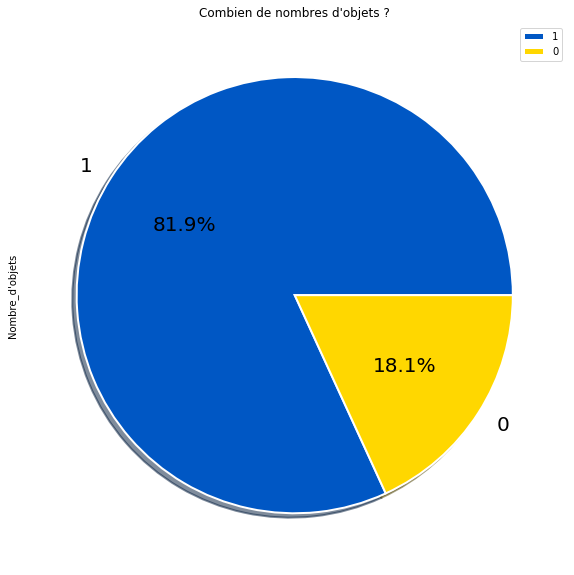

In [206]:
plt.figure(figsize=(8,8))
data["""Nombre_d'objets"""].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.tight_layout()
plt.legend()
plt.title("Combien de nombres d'objets ?")
plt.show()

Analyse exploratoire du `nombre d'objets`, et du `type de document`.

In [207]:
pnd.crosstab(data["""Nombre_d'objets"""],data.document_type)

document_type    Document Cartographique  Document D'archives  \
Nombre_d'objets                                                 
0                                    415                   24   
1                                   2046                  123   

document_type    Document cartographique manuscrit  Document électronique  \
Nombre_d'objets                                                             
0                                               88                      1   
1                                              412                      1   

document_type    Enregistrement Sonore  Ilages animées  Image Animée  \
Nombre_d'objets                                                        
0                                  917               2             1   
1                                22435               0             0   

document_type    Image Fixe  Images Animéees  Images Animées  ...  \
Nombre_d'objets                                               ...   
0                      3436                0            1658  ...   
1                     25267                2            5135  ...   

document_type    Ressource électronique  Sans type  Texte Gravé  \
Nombre_d'objets                                                   
0                                    33          2            0   
1                                    30          3            1   

document_type    Texte Illustré  Texte Imaginal  Texte Imprimé  \
Nombre_d'objets                                                  
0                             0               1          46165   
1                             1               0         136412   

document_type    Texte Manuscrit  Texte Tapuscrit  inconnu  objet  
Nombre_d'objets                                                    
0                             19                1     8244      2  
1                            466               17    80363     44  

[2 rows x 31 columns]

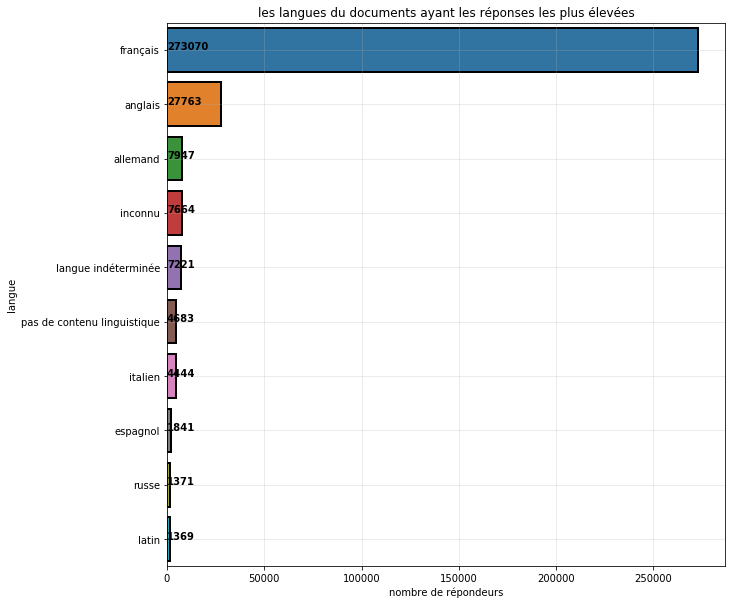

In [208]:
#c'est quoi les langues de document les plus représentee

plt.figure(figsize=(10,10))
Langue_du_document = data["Langue_du_document"].value_counts().reset_index()
ax = sns.barplot("Langue_du_document","index",data=Langue_du_document[:10],linewidth=2,edgecolor="k"*10)
plt.xlabel("nombre de répondeurs")
plt.ylabel("langue")
plt.title("les langues du documents ayant les réponses les plus élevées")
plt.grid(True,alpha=.3)

for i,j in enumerate(Langue_du_document["Langue_du_document"][:10]):
    ax.text(.7,i,j,weight = "bold")
    

`Francais`, `Anglais`, `Allemand` ont le plus grand nombre de répondants.

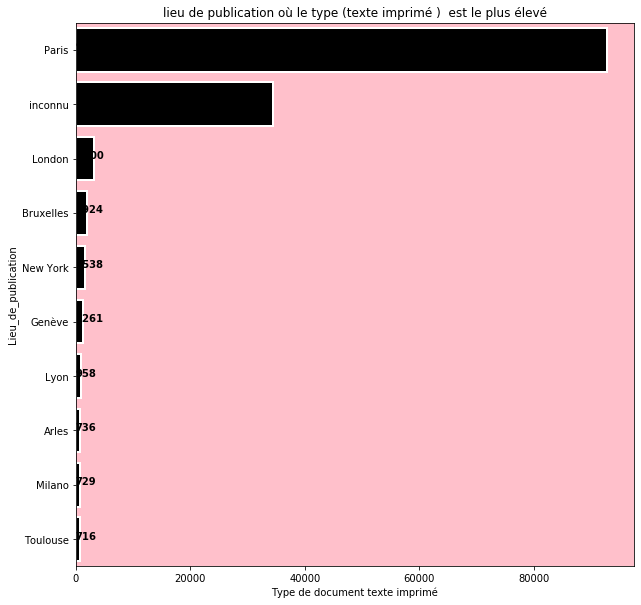

In [209]:
typ = pnd.crosstab(data["Lieu_de_publication"],data["document_type"]).stack().reset_index()
typ = typ[typ["document_type"].str.contains(pat = "Texte Imprimé")]
typ = typ.groupby("Lieu_de_publication")[0].sum().reset_index().sort_values(by=0,ascending =False)

fig = plt.figure(figsize=(10,10))

ax = sns.barplot(0,"Lieu_de_publication",data=typ[:10],color="k",linewidth=2,edgecolor=["white"]*20)

for i,j in enumerate(typ[0][:10].values):
    ax.text(.7,i,j,weight= "bold")
ax.set_title("lieu de publication où le type (texte imprimé )  est le plus élevé")
ax.set_facecolor("pink")
ax.set_xlabel("Type de document texte imprimé")
plt.show()

`Paris` et `London` 

### La localisation la plus utilisée régulièrement

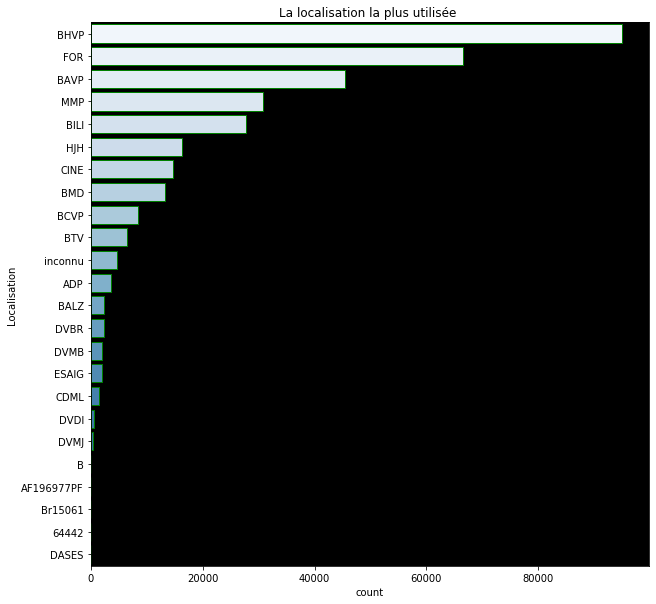

In [210]:
ide = data["Localisation"].str.split(";",expand=True).stack().reset_index()
ide = ide[0].value_counts().reset_index()

plt.figure(figsize=(10,10))
ax = sns.barplot(0,"index",data=ide,linewidth=1,
                 edgecolor=["green"]*ide["index"].nunique(),palette="Blues")
ax.set_facecolor("k")
plt.xlabel("count")
plt.ylabel("Localisation")
plt.title("La localisation la plus utilisée ")
plt.show()

## 3- Analyse en CUBE :

[Le lien :](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/notebooks/seance5_cube_multidimensionnel_enonce.html)

Le `cube` est un outil d’analyse multidimensionnelle,

Les données sont classées par dimension,

On considere le cube comme une base de données car il stocke les informations comme le ferait une base de données, mais sa structure est différente.

In [65]:
! free -h

              total       utilisé      libre     partagé tamp/cache   disponible
Mem:           7,7G        3,3G        3,2G        458M        1,2G        3,7G
Partition d'échange:        2,0G        1,3G        694M


In [66]:
!pip install pyensae

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pyensae
from pyquickhelper.helpgen import NbImage


In [6]:
data.columns

Index(['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
       'Nombre_d'objets', 'Langue_du_document', 'Titre', 'Lieu_de_publication',
       'Localisation', 'document_type', 'Catégorie_documentaire', 'Code-barre',
       'Titre.1', 'N_Editeur', 'Auteur'],
      dtype='object')

In [7]:
data2 = data[['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
       """Nombre_d'objets""", 'Langue_du_document', 'Lieu_de_publication',
       'Localisation', 'document_type', 'Catégorie_documentaire', 'N_Editeur', 'Auteur']].dropna().reset_index(drop=True)
data.columns, data2.columns

(Index(['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
        'Nombre_d'objets', 'Langue_du_document', 'Titre', 'Lieu_de_publication',
        'Localisation', 'document_type', 'Catégorie_documentaire', 'Code-barre',
        'Titre.1', 'N_Editeur', 'Auteur'],
       dtype='object'),
 Index(['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
        'Nombre_d'objets', 'Langue_du_document', 'Lieu_de_publication',
        'Localisation', 'document_type', 'Catégorie_documentaire', 'N_Editeur',
        'Auteur'],
       dtype='object'))

In [8]:
data2.head()

identifiant_unique                             Lien_permament-portail  \
0             2103341  http://bibliotheques-specialisees.paris.fr/ark...   
1             1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2             1140153  http://bibliotheques-specialisees.paris.fr/ark...   
3             1140153  http://bibliotheques-specialisees.paris.fr/ark...   
4             1797721  http://bibliotheques-specialisees.paris.fr/ark...   

   Année_de_publication  Nombre_d'objets Langue_du_document  \
0                  1964                1           français   
1                  2010                1           français   
2                  2010                1           français   
3                  2010                1           français   
4                  1957                1           français   

  Lieu_de_publication Localisation  document_type Catégorie_documentaire  \
0               Paris        ESAIG  Texte Imprimé                inconnu   
1               Berne         BAVP  Texte Imprimé                     LI   
2              Berlin         BAVP  Texte Imprimé                     LI   
3           Bruxelles         BAVP  Texte Imprimé                     LI   
4             inconnu         BHVP     Image Fixe                     PH   

         N_Editeur                Auteur  
0  Deberny-Peignot               inconnu  
1           P Lang  Olivier de Lapparent  
2           P Lang  Olivier de Lapparent  
3           P Lang  Olivier de Lapparent  
4  éditeur inconnu               inconnu

##### Dans la construction de notre cube d'analyse : je vous propose de faire une analyse en cube des années qui sont entre 2000 et 2020 :

In [9]:
data['Année_de_publication'].astype(int)

0         1964
1         2010
2         2010
3         2010
4         1957
          ... 
343913    2003
343914    1920
343915    1937
343916    2016
343917    2016
Name: Année_de_publication, Length: 343918, dtype: int64

In [10]:
data2.dtypes

identifiant_unique         int64
Lien_permament-portail    object
Année_de_publication       int64
Nombre_d'objets            int64
Langue_du_document        object
Lieu_de_publication       object
Localisation              object
document_type             object
Catégorie_documentaire    object
N_Editeur                 object
Auteur                    object
dtype: object

In [11]:
data2['Année_de_publication']=data2['Année_de_publication'].astype(int)

In [12]:
data2=data2.loc[(data2['Année_de_publication'] >= 2000) & (data2['Année_de_publication'] <= 2020)]

In [13]:
data2.head()

identifiant_unique                             Lien_permament-portail  \
1              1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2              1140153  http://bibliotheques-specialisees.paris.fr/ark...   
3              1140153  http://bibliotheques-specialisees.paris.fr/ark...   
9              1140977  http://bibliotheques-specialisees.paris.fr/ark...   
10             1140977  http://bibliotheques-specialisees.paris.fr/ark...   

    Année_de_publication  Nombre_d'objets Langue_du_document  \
1                   2010                1           français   
2                   2010                1           français   
3                   2010                1           français   
9                   2009                0           français   
10                  2009                0           français   

   Lieu_de_publication Localisation  document_type Catégorie_documentaire  \
1                Berne         BAVP  Texte Imprimé                     LI   
2               Berlin         BAVP  Texte Imprimé                     LI   
3            Bruxelles         BAVP  Texte Imprimé                     LI   
9             Grenoble         BAVP  Texte Imprimé                     LI   
10            Grenoble         CDML  Texte Imprimé                     LI   

                                  N_Editeur                Auteur  
1                                    P Lang  Olivier de Lapparent  
2                                    P Lang  Olivier de Lapparent  
3                                    P Lang  Olivier de Lapparent  
9   Observatoire des politiques culturelles               inconnu  
10  Observatoire des politiques culturelles               inconnu

In [14]:
DATA=data2

In [70]:
DATA

identifiant_unique                             Lien_permament-portail  \
1                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
2                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
3                  1140153  http://bibliotheques-specialisees.paris.fr/ark...   
9                  1140977  http://bibliotheques-specialisees.paris.fr/ark...   
10                 1140977  http://bibliotheques-specialisees.paris.fr/ark...   
...                    ...                                                ...   
343863             2063953  http://bibliotheques-specialisees.paris.fr/ark...   
343864             2063953  http://bibliotheques-specialisees.paris.fr/ark...   
343865              611524  https://bibliotheques-specialisees.paris.fr/ar...   
343868             2066058  http://bibliotheques-specialisees.paris.fr/ark...   
343869             2066058  http://bibliotheques-specialisees.paris.fr/ark...   

        Année_de_publication  Nombre_d'objets Langue_du_document  \
1                       2010                1           français   
2                       2010                1           français   
3                       2010                1           français   
9                       2009                0           français   
10                      2009                0           français   
...                      ...              ...                ...   
343863                  2016                1           français   
343864                  2016                1           allemand   
343865                  2003                1            inconnu   
343868                  2016                0           français   
343869                  2016                0           français   

       Lieu_de_publication Localisation   document_type  \
1                    Berne         BAVP   Texte Imprimé   
2                   Berlin         BAVP   Texte Imprimé   
3                Bruxelles         BAVP   Texte Imprimé   
9                 Grenoble         BAVP   Texte Imprimé   
10                Grenoble         CDML   Texte Imprimé   
...                    ...          ...             ...   
343863           Stuttgart          FOR   Texte Imprimé   
343864           Stuttgart          FOR   Texte Imprimé   
343865               Paris          MMP  Images Animées   
343868               Paris         BAVP   Texte Imprimé   
343869               Paris          BMD   Texte Imprimé   

       Catégorie_documentaire                                N_Editeur  \
1                          LI                                   P Lang   
2                          LI                                   P Lang   
3                          LI                                   P Lang   
9                          LI  Observatoire des politiques culturelles   
10                         LI  Observatoire des politiques culturelles   
...                       ...                                      ...   
343863                     CE                Arnoldsche Art Publishers   
343864                     CE                Arnoldsche Art Publishers   
343865                     DV         Idéale Audience International éd   
343868                     LI                                      PUF   
343869                     LI                                      PUF   

                      Auteur  Valeur_randm  
1       Olivier de Lapparent         27281  
2       Olivier de Lapparent          4892  
3       Olivier de Lapparent         17112  
9                    inconnu         40486  
10                   inconnu          9166  
...                      ...           ...  
343863               inconnu         19439  
343864               inconnu         54655  
343865               inconnu         38252  
343868   Florence Maillochon         20211  
343869   Florence Maillochon         12375  

[71912 rows x 12 columns]

In [71]:
DATA.to_csv("frame2.csv", header=True,encoding='utf-8', index=False)
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71912 entries, 1 to 343869
Data columns (total 12 columns):
identifiant_unique        71912 non-null int64
Lien_permament-portail    71912 non-null object
Année_de_publication      71912 non-null int64
Nombre_d'objets           71912 non-null int64
Langue_du_document        71912 non-null object
Lieu_de_publication       71912 non-null object
Localisation              71912 non-null object
document_type             71912 non-null object
Catégorie_documentaire    71912 non-null object
N_Editeur                 71912 non-null object
Auteur                    71912 non-null object
Valeur_randm              71912 non-null int64
dtypes: int64(4), object(8)
memory usage: 7.1+ MB


In [223]:
#définir la colonne "identifiant_unique" comme l'index de la Dataframe
#DATA = data2.set_index('identifiant_unique')
#print('Dataframe Modifié :')

#DATA

Dataframe Modifié :


Lien_permament-portail  \
identifiant_unique                                                      
1140153             http://bibliotheques-specialisees.paris.fr/ark...   
1140153             http://bibliotheques-specialisees.paris.fr/ark...   
1140153             http://bibliotheques-specialisees.paris.fr/ark...   
1140977             http://bibliotheques-specialisees.paris.fr/ark...   
1140977             http://bibliotheques-specialisees.paris.fr/ark...   
...                                                               ...   
2063953             http://bibliotheques-specialisees.paris.fr/ark...   
2063953             http://bibliotheques-specialisees.paris.fr/ark...   
611524              https://bibliotheques-specialisees.paris.fr/ar...   
2066058             http://bibliotheques-specialisees.paris.fr/ark...   
2066058             http://bibliotheques-specialisees.paris.fr/ark...   

                    Année_de_publication  Nombre_d'objets Langue_du_document  \
identifiant_unique                                                             
1140153                             2010                1           français   
1140153                             2010                1           français   
1140153                             2010                1           français   
1140977                             2009                0           français   
1140977                             2009                0           français   
...                                  ...              ...                ...   
2063953                             2016                1           français   
2063953                             2016                1           allemand   
611524                              2003                1            inconnu   
2066058                             2016                0           français   
2066058                             2016                0           français   

                   Lieu_de_publication Localisation   document_type  \
identifiant_unique                                                    
1140153                          Berne         BAVP   Texte Imprimé   
1140153                         Berlin         BAVP   Texte Imprimé   
1140153                      Bruxelles         BAVP   Texte Imprimé   
1140977                       Grenoble         BAVP   Texte Imprimé   
1140977                       Grenoble         CDML   Texte Imprimé   
...                                ...          ...             ...   
2063953                      Stuttgart          FOR   Texte Imprimé   
2063953                      Stuttgart          FOR   Texte Imprimé   
611524                           Paris          MMP  Images Animées   
2066058                          Paris         BAVP   Texte Imprimé   
2066058                          Paris          BMD   Texte Imprimé   

                   Catégorie_documentaire  \
identifiant_unique                          
1140153                                LI   
1140153                                LI   
1140153                                LI   
1140977                                LI   
1140977                                LI   
...                                   ...   
2063953                                CE   
2063953                                CE   
611524                                 DV   
2066058                                LI   
2066058                                LI   

                                                  N_Editeur  \
identifiant_unique                                            
1140153                                              P Lang   
1140153                                              P Lang   
1140153                                              P Lang   
1140977             Observatoire des politiques culturelles   
1140977             Observatoire des politiques culturelles   
...                                                     ...   
2063953                           Arnoldsc

In [224]:
DATA.index.name

'identifiant_unique'

In [225]:
DATA.index.name = 'ID'

In [226]:
DATA.columns

Index(['Lien_permament-portail', 'Année_de_publication', 'Nombre_d'objets',
       'Langue_du_document', 'Lieu_de_publication', 'Localisation',
       'document_type', 'Catégorie_documentaire', 'N_Editeur', 'Auteur'],
      dtype='object')

In [227]:
DATA

Lien_permament-portail  \
ID                                                           
1140153  http://bibliotheques-specialisees.paris.fr/ark...   
1140153  http://bibliotheques-specialisees.paris.fr/ark...   
1140153  http://bibliotheques-specialisees.paris.fr/ark...   
1140977  http://bibliotheques-specialisees.paris.fr/ark...   
1140977  http://bibliotheques-specialisees.paris.fr/ark...   
...                                                    ...   
2063953  http://bibliotheques-specialisees.paris.fr/ark...   
2063953  http://bibliotheques-specialisees.paris.fr/ark...   
611524   https://bibliotheques-specialisees.paris.fr/ar...   
2066058  http://bibliotheques-specialisees.paris.fr/ark...   
2066058  http://bibliotheques-specialisees.paris.fr/ark...   

         Année_de_publication  Nombre_d'objets Langue_du_document  \
ID                                                                  
1140153                  2010                1           français   
1140153                  2010                1           français   
1140153                  2010                1           français   
1140977                  2009                0           français   
1140977                  2009                0           français   
...                       ...              ...                ...   
2063953                  2016                1           français   
2063953                  2016                1           allemand   
611524                   2003                1            inconnu   
2066058                  2016                0           français   
2066058                  2016                0           français   

        Lieu_de_publication Localisation   document_type  \
ID                                                         
1140153               Berne         BAVP   Texte Imprimé   
1140153              Berlin         BAVP   Texte Imprimé   
1140153           Bruxelles         BAVP   Texte Imprimé   
1140977            Grenoble         BAVP   Texte Imprimé   
1140977            Grenoble         CDML   Texte Imprimé   
...                     ...          ...             ...   
2063953           Stuttgart          FOR   Texte Imprimé   
2063953           Stuttgart          FOR   Texte Imprimé   
611524                Paris          MMP  Images Animées   
2066058               Paris         BAVP   Texte Imprimé   
2066058               Paris          BMD   Texte Imprimé   

        Catégorie_documentaire                                N_Editeur  \
ID                                                                        
1140153                     LI                                   P Lang   
1140153                     LI                                   P Lang   
1140153                     LI                                   P Lang   
1140977                     LI  Observatoire des politiques culturelles   
1140977                     LI  Observatoire des politiques culturelles   
...                        ...                                      ...   
2063953                     CE                Arnoldsche Art Publishers   
2063953                     CE                Arnoldsche Art Publishers   
611524                      DV         Idéale Audience International éd   
2066058                     LI                                      PUF   
2066058                     LI                                      PUF   

                       Auteur  
ID                             
1140153  Olivier de Lapparent  
1140153  Olivier de Lapparent  
1140153  Olivier de Lapparent  
1140977               inconnu  
1140977               inconnu  
...                       ...  
2063953               inconnu  
2063953               inconnu  
611524                inconnu  
2066058   Florence Maillochon  
2066058   Florence Maillochon  

[71912 rows x 10 columns]

le module `Xarray` introduit des étiquettes sous forme de dimensions, de coordonnées et d'attributs au-dessus de tableaux bruts.  [xarray](http://xarray.pydata.org/en/stable/), 


nous avons :

* Les **dimensions** : Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document
* Les **valeurs** : une valeur par le Nombre d'objets

On peut passer d'un [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) à un [DataSet](http://xarray.pydata.org/en/stable/data-structures.html#dataset) de la façon suivante :

Dans notre jeu de données on n'a pas des colonnes de type `int`, on va créé une colonne qui contient des valeurs ;

In [35]:
import numpy as np
DATA['Valeur_randm'] = np.random.randint(1,70000, DATA.shape[0])
DATA['Valeur_randm']

1         27281
2          4892
3         17112
9         40486
10         9166
          ...  
343863    19439
343864    54655
343865    38252
343868    20211
343869    12375
Name: Valeur_randm, Length: 71912, dtype: int64

In [36]:
DATA.columns

Index(['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
       'Nombre_d'objets', 'Langue_du_document', 'Lieu_de_publication',
       'Localisation', 'document_type', 'Catégorie_documentaire', 'N_Editeur',
       'Auteur', 'Valeur_randm'],
      dtype='object')

L'opération complexe consiste à faire passer les valeurs de la colonne *Nombre d'objets* en tant que colonnes. C'est l'objet de la méthode pivot_table.

In [37]:
pivott = DATA.pivot_table(index=["Année_de_publication", "Catégorie_documentaire","document_type","Langue_du_document"],
                columns=["""Nombre_d'objets"""], values="Valeur_randm")
pivott.head(50)

Nombre_d'objets                                                                                                          0  \
Année_de_publication Catégorie_documentaire document_type           Langue_du_document                                       
2000                 AF                     Image Fixe              anglais                                            NaN   
                                                                    danois                                             NaN   
                                                                    français                                  34939.000000   
                                                                    néerlandais                                        NaN   
                     CC                     Texte Imprimé           français                                           NaN   
                     CD                     Enregistrement Sonore   allemand                                           NaN   
                                                                    anglais                                   27917.500000   
                                                                    arabe                                              NaN   
                                                                    austronésiennes                                    NaN   
                                                                    breton                                             NaN   
                                                                    créoles et pidgins                                 NaN   
                                                                    créoles et pidgins basés sur le français           NaN   
                                                                    danois                                             NaN   
                                                                    espagnol                                           NaN   
                                                                    finnois                                            NaN   
                                                                    français                                  25006.625000   
                                                                    inconnu                                   38260.666667   
                                                                    irlandais                                          NaN   
                                                                    italien                                            NaN   
                                                                    kabyle                                             NaN   
                                                                    kurde                                              NaN   
                                                                    langue indéterminée                                NaN   
                                                                    latin                                              NaN   
                                                                    macédonien                                         NaN   
                                                                    malgache                                           NaN   
                                                                    mandingue                                          NaN   
                                                                    multilingue                               27387.000000   
                                                                    occitan                                            NaN   
                                                                    pas de contenu linguistique               25922.250000   
                                                                    portugais                 

In [38]:
pivott.dtypes

Nombre_d'objets
0    float64
1    float64
dtype: object

Les données sont maintenant prêtes à passer sous *xarray* :

In [42]:
!pip install xarray

In [39]:
import xarray
datas = xarray.Dataset.from_dataframe(pivott)
datas

<xarray.Dataset>
Dimensions:                 (Année_de_publication: 19, Catégorie_documentaire: 37, Langue_du_document: 119, document_type: 22)
Coordinates:
  * Année_de_publication    (Année_de_publication) int64 2000 2001 ... 2017 2018
  * Catégorie_documentaire  (Catégorie_documentaire) object 'AF' ... 'inconnu'
  * document_type           (document_type) object 'Document Cartographique' ... 'objet'
  * Langue_du_document      (Langue_du_document) object 'afro-asiatiques' ... 'yoruba'
Data variables:
    0                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan
    1                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan

#### sélection

Il est facile ensuite d'extraire les données de Catégorie_documentaire avec la méthode `sel` :

In [40]:
datas.sel(Catégorie_documentaire=["LI"])

<xarray.Dataset>
Dimensions:                 (Année_de_publication: 19, Catégorie_documentaire: 1, Langue_du_document: 119, document_type: 22)
Coordinates:
  * Année_de_publication    (Année_de_publication) int64 2000 2001 ... 2017 2018
  * Catégorie_documentaire  (Catégorie_documentaire) object 'LI'
  * document_type           (document_type) object 'Document Cartographique' ... 'objet'
  * Langue_du_document      (Langue_du_document) object 'afro-asiatiques' ... 'yoruba'
Data variables:
    0                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan
    1                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan

In [41]:
datas.sel(Catégorie_documentaire=["LI", "PH"])

<xarray.Dataset>
Dimensions:                 (Année_de_publication: 19, Catégorie_documentaire: 2, Langue_du_document: 119, document_type: 22)
Coordinates:
  * Année_de_publication    (Année_de_publication) int64 2000 2001 ... 2017 2018
  * Catégorie_documentaire  (Catégorie_documentaire) object 'LI' 'PH'
  * document_type           (document_type) object 'Document Cartographique' ... 'objet'
  * Langue_du_document      (Langue_du_document) object 'afro-asiatiques' ... 'yoruba'
Data variables:
    0                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan
    1                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan

In [42]:
datas.sel(Langue_du_document=["français"])

<xarray.Dataset>
Dimensions:                 (Année_de_publication: 19, Catégorie_documentaire: 37, Langue_du_document: 1, document_type: 22)
Coordinates:
  * Année_de_publication    (Année_de_publication) int64 2000 2001 ... 2017 2018
  * Catégorie_documentaire  (Catégorie_documentaire) object 'AF' ... 'inconnu'
  * document_type           (document_type) object 'Document Cartographique' ... 'objet'
  * Langue_du_document      (Langue_du_document) object 'français'
Data variables:
    0                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan
    1                       (Année_de_publication, Catégorie_documentaire, document_type, Langue_du_document) float64 nan ... nan

Ou plusieurs dimensions :

In [43]:
datas.sel(Langue_du_document="français", Année_de_publication=2010)

<xarray.Dataset>
Dimensions:                 (Catégorie_documentaire: 37, document_type: 22)
Coordinates:
    Année_de_publication    int64 2010
  * Catégorie_documentaire  (Catégorie_documentaire) object 'AF' ... 'inconnu'
  * document_type           (document_type) object 'Document Cartographique' ... 'objet'
    Langue_du_document      <U8 'français'
Data variables:
    0                       (Catégorie_documentaire, document_type) float64 nan ... nan
    1                       (Catégorie_documentaire, document_type) float64 nan ... nan

Pour accéder à la série 1 pour le nombre d'objects, 

les années 2000 et 2015, la langue du document en français, on fait la différence, puis on la récupère sous forme de DataFrame :

In [44]:
(datas.sel(Langue_du_document="français", Année_de_publication=2015, Catégorie_documentaire="LI")[1] - 
 datas.sel(Langue_du_document="français", Année_de_publication=2000, Catégorie_documentaire="LI")[1]).to_dataframe().head()

Catégorie_documentaire Langue_du_document   1
document_type                                                        
Document Cartographique                     LI           français NaN
Document D'archives                         LI           français NaN
Enregistrement Sonore                       LI           français NaN
Ilages animées                              LI           français NaN
Image Animée                                LI           français NaN

In [45]:
(datas.sel(Langue_du_document="français", Année_de_publication=2015, document_type=["Texte Imprimé","Image Fixe"])[1] - 
 datas.sel(Langue_du_document="anglais", Année_de_publication=2015, document_type=["Texte Imprimé","Image Fixe"])[1]).to_dataframe().head()

Année_de_publication   1
Catégorie_documentaire document_type                          
AF                     Texte Imprimé                  2015 NaN
                       Image Fixe                     2015 NaN
CC                     Texte Imprimé                  2015 NaN
                       Image Fixe                     2015 NaN
CD                     Texte Imprimé                  2015 NaN

# Méthode utilisée dans les TDS

In [242]:
!pip3 install sqlite3

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [90]:
import sqlite3
!rm bu.db
db = sqlite3.connect("bu.db")

In [93]:
DATA.columns

Index(['identifiant_unique', 'Lien_permament-portail', 'Année_de_publication',
       'Nombre_d'objets', 'Langue_du_document', 'Lieu_de_publication',
       'Localisation', 'document_type', 'Catégorie_documentaire', 'N_Editeur',
       'Auteur', 'Valeur_randm'],
      dtype='object')

In [94]:
important_keys = {
"ANNEE_DE_PUBLICATION":'Année_de_publication',
"NOMBRE_OBJT":"""Nombre_d'objets""",
"LANGUE_DE_DOCUMENT":'Langue_du_document',
"LIEU_DE_PUBLICATION":'Lieu_de_publication',
"LOCALISATION":'Localisation',
"TYPE_DOCUMENT":'document_type','Catégorie_documentaire'
"CATEGORIE_DOCUMENT":'Catégorie_documentaire', 
"EDITEUR":'N_Editeur',
"AUTEUR":'Auteur'
}

In [95]:
keys = list(DATA.keys())
important_keys_index = {k:keys.index(v) for k,v in important_keys.items()}
print(important_keys_index)

{'ANNEE_DE_PUBLICATION': 2, 'NOMBRE_OBJT': 3, 'LANGUE_DE_DOCUMENT': 4, 'LIEU_DE_PUBLICATION': 5, 'LOCALISATION': 6, 'TYPE_DOCUMENT': 7, 'Catégorie_documentaireCATEGORIE_DOCUMENT': 8, 'EDITEUR': 9, 'AUTEUR': 10}


### Approche naïve

On a créé une table des faits et de stocker dans une seule table SQLite la table des faits pour exécuter des requêtes dedans 

In [98]:
query = "CREATE TABLE table_des_faits ({})".format(",\n\t".join(important_keys.keys()))
print("Query que nous allons executer:\n", query)
c = db.execute(query, important_keys)

Query que nous allons executer:
 CREATE TABLE table_des_faits (ANNEE_DE_PUBLICATION,
	NOMBRE_OBJT,
	LANGUE_DE_DOCUMENT,
	LIEU_DE_PUBLICATION,
	LOCALISATION,
	TYPE_DOCUMENT,
	Catégorie_documentaireCATEGORIE_DOCUMENT,
	EDITEUR,
	AUTEUR)


OperationalError: table table_des_faits already exists

on liste les variables avec leurs index :

In [99]:
indices = set(important_keys_index.values())
print(indices)

{2, 3, 4, 5, 6, 7, 8, 9, 10}


In [100]:
important_keys_trie = sorted(important_keys, key=lambda e:important_keys_index[e])
print(important_keys_trie)

['ANNEE_DE_PUBLICATION', 'NOMBRE_OBJT', 'LANGUE_DE_DOCUMENT', 'LIEU_DE_PUBLICATION', 'LOCALISATION', 'TYPE_DOCUMENT', 'Catégorie_documentaireCATEGORIE_DOCUMENT', 'EDITEUR', 'AUTEUR']


In [101]:
query = "INSERT INTO table_des_faits ({}) VALUES ({})".format(
    ",".join(important_keys_trie), 
    ",".join(["?" for _ in range(len(important_keys))]))
print(query) #Le nombre de ? est égale au nombre de colonne. 

INSERT INTO table_des_faits (ANNEE_DE_PUBLICATION,NOMBRE_OBJT,LANGUE_DE_DOCUMENT,LIEU_DE_PUBLICATION,LOCALISATION,TYPE_DOCUMENT,Catégorie_documentaireCATEGORIE_DOCUMENT,EDITEUR,AUTEUR) VALUES (?,?,?,?,?,?,?,?,?)


In [102]:
def filtre_ligne(e):
    """
    Fonction qui prend une ligne de text
    et qui retourne un tuple contenant uniquement les colonnes
    importantes
    """
    return tuple(map(lambda e:e[1], filter(lambda e:e[0] in indices, enumerate(e))))
with open("frame2.csv") as fichier_raw:
    fichier_parse = csv.reader(fichier_raw, delimiter=',')
    next(fichier_parse) # on dépile la première ligne
    lignes = map(filtre_ligne, fichier_parse) # l'execution ne se lance pas ici
    
    db.executemany(query, lignes) # déplie l'itérateur et insère les lignes 
    db.commit()

On peut vérifier que le nombre de lignes inséré est le bon. 

In [103]:
!wc -l frame2.csv

71913 frame2.csv


### Tableaux croisés simple



In [104]:
print("Query que nous allons executer:\n", query)

Query que nous allons executer:
 INSERT INTO table_des_faits (ANNEE_DE_PUBLICATION,NOMBRE_OBJT,LANGUE_DE_DOCUMENT,LIEU_DE_PUBLICATION,LOCALISATION,TYPE_DOCUMENT,Catégorie_documentaireCATEGORIE_DOCUMENT,EDITEUR,AUTEUR) VALUES (?,?,?,?,?,?,?,?,?)


In [106]:
Loc_nombre_objet = pnd.read_sql("SELECT LOCALISATION, NOMBRE_OBJT, COUNT(*) as Count FROM table_des_faits GROUP BY LOCALISATION, NOMBRE_OBJT", db)
Loc_nombre_objet.pivot_table("Count", index="LOCALISATION", columns="NOMBRE_OBJT")

NOMBRE_OBJT        0        1
LOCALISATION                 
ADP            581.0    217.0
BALZ           194.0    231.0
BAVP          1691.0   9657.0
BCVP           116.0   1288.0
BHVP          1704.0   1958.0
BILI           489.0  11115.0
BMD            717.0   2370.0
BTV             20.0    348.0
CDML           365.0    588.0
CINE          2517.0   7490.0
DVBR           418.0    573.0
DVDI           256.0    109.0
DVMB           404.0    300.0
DVMJ           156.0     39.0
ESAIG          218.0    101.0
FOR           3938.0  10285.0
HJH            354.0   2159.0
MMP            492.0   6999.0
inconnu       1455.0      NaN

#### La LOCALISATION DES DOCUMENT EN FONCTION DE LEURS ANNEE DE PUBLICATION

In [116]:
%%time Loc_nombre_objet = pnd.read_sql("SELECT LOCALISATION, ANNEE_DE_PUBLICATION, COUNT(*) as Count FROM table_des_faits GROUP BY LOCALISATION, ANNEE_DE_PUBLICATION", db)

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [117]:
pivot = Loc_nombre_objet.pivot_table("Count", index="LOCALISATION", columns="ANNEE_DE_PUBLICATION", aggfunc=sum).fillna(0)
pivot

ANNEE_DE_PUBLICATION   2000   2001   2002   2003   2004   2005   2006   2007  \
LOCALISATION                                                                   
ADP                   106.0   89.0   54.0   54.0   34.0   33.0   45.0   32.0   
BALZ                   25.0   21.0   28.0   31.0   26.0   38.0   31.0   22.0   
BAVP                  679.0  739.0  691.0  839.0  805.0  603.0  641.0  535.0   
BCVP                  138.0  114.0  145.0   96.0  130.0  142.0  109.0   84.0   
BHVP                  378.0  324.0  325.0  305.0  344.0  340.0  375.0  238.0   
BILI                  607.0  604.0  613.0  633.0  687.0  794.0  807.0  718.0   
BMD                   209.0  222.0  210.0  221.0  276.0  195.0  218.0  197.0   
BTV                    50.0   41.0   40.0   45.0   26.0   20.0   21.0   27.0   
CDML                   26.0   32.0   49.0   35.0   44.0   56.0   68.0   65.0   
CINE                  374.0  500.0  466.0  621.0  742.0  813.0  777.0  790.0   
DVBR                   53.0   48.0   57.0   49.0   42.0   54.0   58.0   44.0   
DVDI                   23.0   17.0   33.0   19.0   21.0   17.0   21.0   16.0   
DVMB                   65.0   70.0   59.0   51.0   58.0   72.0   45.0   53.0   
DVMJ                   26.0   23.0   16.0    6.0   13.0    8.0   15.0    6.0   
ESAIG                  36.0   21.0   22.0   16.0   16.0   16.0   65.0   20.0   
FOR                   915.0  826.0  749.0  771.0  908.0  834.0  901.0  945.0   
HJH                   288.0  282.0  248.0  230.0  179.0  156.0  120.0   81.0   
MMP                   510.0  524.0  545.0  545.0  599.0  541.0  582.0  479.0   
inconnu                42.0   58.0   48.0   69.0   61.0   92.0   81.0   91.0   

ANNEE_DE_PUBLICATION   2008   2009   2010   2011   2012   2013   2014   2015  \
LOCALISATION                                                                   
ADP                    40.0   32.0   42.0   32.0   21.0   46.0   22.0   32.0   
BALZ                   28.0   30.0   27.0   39.0   25.0   18.0   19.0    8.0   
BAVP                  612.0  604.0  500.0  565.0  644.0  562.0  641.0  566.0   
BCVP                   70.0   61.0   71.0   45.0   49.0   35.0   33.0   38.0   
BHVP                  261.0  168.0  127.0  107.0  103.0   83.0   63.0   52.0   
BILI                  788.0  742.0  701.0  713.0  684.0  722.0  558.0  386.0   
BMD                   216.0  150.0  126.0  132.0  138.0  142.0  151.0  100.0   
BTV                    33.0   16.0   10.0   13.0   11.0    9.0    3.0    0.0   
CDML                   66.0   66.0   58.0   53.0   47.0   48.0   48.0   59.0   
CINE                  711.0  635.0  519.0  550.0  499.0  448.0  361.0  391.0   
DVBR                   80.0   59.0   60.0   54.0   61.0   64.0   64.0   59.0   
DVDI                   18.0   31.0   17.0   20.0   21.0   21.0   21.0   24.0   
DVMB                   40.0   45.0   19.0   15.0   30.0   20.0   18.0   12.0   
DVMJ                   15.0   13.0   10.0   10.0   12.0   12.0    3.0    2.0   
ESAIG                  32.0   15.0   13.0   11.0   11.0    7.0   10.0    6.0   
FOR                   989.0  971.0  888.0  784.0  826.0  798.0  657.0  519.0   
HJH                    97.0  113.0  124.0  102.0  116.0  100.0   60.0   82.0   
MMP                   568.0  599.0  496.0  570.0  399.0  300.0  150.0   76.0   
inconnu                71.0   65.0   87.0  113.0  236.0  208.0   65.0   44.0   

ANNEE_DE_PUBLICATION   2016   2017   2018  
LOCALISATION                               
ADP                    45.0   38.0    1.0  
BALZ                    7.0    2.0    0.0  
BAVP                  500.0  513.0  109.0  
BCVP                   29.0   14.0    1.0  
BHVP                   33.0   31.0    5.0  
BILI                  430.0  332.0   85.0  
BMD                    84.0   67.0   33.0  
BTV                     2.0    1.0    0.0  
CDML                   57.0   52.0   24.0  
CINE                  376.0  338.0   96.0  
DVBR                   41.0   40.0    4.0  
DVDI                   12.0   13.0    0.0  
DVMB                  

In [118]:
db.execute("CREATE INDEX LOC_ANNEE ON table_des_faits (LOCALISATION, ANNEE_DE_PUBLICATION)")

OperationalError: index LOC_ANNEE already exists

In [119]:
%%time
Loc_nombre_objet = pnd.read_sql("SELECT LANGUE_DE_DOCUMENT, ANNEE_DE_PUBLICATION, COUNT(*) as Count FROM table_des_faits GROUP BY LANGUE_DE_DOCUMENT, ANNEE_DE_PUBLICATION", db)

CPU times: user 75.7 ms, sys: 179 µs, total: 75.8 ms
Wall time: 78.2 ms


In [121]:
ANNEE_obj = pnd.read_sql("SELECT ANNEE_DE_PUBLICATION, NOMBRE_OBJT, COUNT(*) as Count FROM table_des_faits GROUP BY ANNEE_DE_PUBLICATION, NOMBRE_OBJT", db)
pivot = ANNEE_obj.pivot_table("Count", index="ANNEE_DE_PUBLICATION", columns="NOMBRE_OBJT", aggfunc=sum).fillna(0)

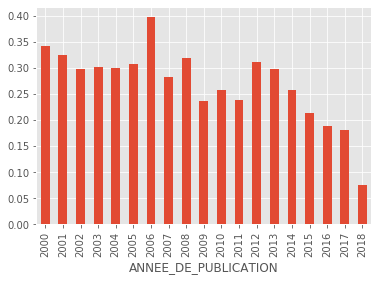

In [124]:
(pivot["0"]/pivot["1"]).plot(kind="bar")

## Modélisation en cube et schéma en étoile

On va identifier les dimensions d'intérêts. On les modélise en associant à chaque dimension une liste de colonnes ordonnée par granularité.

In [125]:
important_keys

{'ANNEE_DE_PUBLICATION': 'Année_de_publication',
 'NOMBRE_OBJT': "Nombre_d'objets",
 'LANGUE_DE_DOCUMENT': 'Langue_du_document',
 'LIEU_DE_PUBLICATION': 'Lieu_de_publication',
 'LOCALISATION': 'Localisation',
 'TYPE_DOCUMENT': 'document_type',
 'Catégorie_documentaireCATEGORIE_DOCUMENT': 'Catégorie_documentaire',
 'EDITEUR': 'N_Editeur',
 'AUTEUR': 'Auteur'}

In [126]:
dimensions = {
    'ANNEE':['ANNEE_DE_PUBLICATION'], 
    'LOCALISATIONN':['LIEU_DE_PUBLICATION', 'LOCALISATION'],
    'INFORMATION':['NOMBRE_OBJT', 'TYPE_DOCUMENT', 'LANGUE_DE_DOCUMENT', 'Catégorie_documentaireCATEGORIE_DOCUMENT', 'EDITEUR', 'AUTEUR'] # ordonné par nombre de valeur !=
}

In [127]:
query = "CREATE TABLE cube (bu, {})".format(", ".join(dimensions))
print(query)
db.execute(query)

CREATE TABLE cube (bu, ANNEE, LOCALISATIONN, INFORMATION)
